In [421]:
import pandas as pd
import collections
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

In [422]:
# The data frame is called house_info
raw_info = pd.read_csv("kc_house_data.csv",error_bad_lines=False)

In [423]:
raw_info

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0         NaN   0.0  ...      7        1180   
1          7242     2.0         0.0   0.0  ...      7        2170   
2         10000     1.0         0.0   0.0  ...      6         770   
3          5000     1.0         0.0   0.0  ...      7        1050   
4          8080     1.0         0.0   0.0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [424]:
house_info = pd.DataFrame({'Bedrooms':raw_info.bedrooms, 'Bathrooms':raw_info.bathrooms, 'Floors':raw_info.floors, 
                           'Year Built':raw_info.yr_built, 'Year Renoveted':raw_info.yr_renovated,
                           'Size of Basement':raw_info.sqft_basement,'Condition':raw_info.condition,
                          'Size of Above':raw_info.sqft_above,'Location':raw_info.zipcode,
                          'Price':raw_info.price, 'Sqft_living':raw_info.sqft_living,'Sqft_lot':raw_info.sqft_lot,
                          'Sqft_basement':raw_info.sqft_basement})

In [425]:
house_info

Bedrooms  Bathrooms  Floors  Year Built  Year Renoveted  \
0             3       1.00     1.0        1955             0.0   
1             3       2.25     2.0        1951          1991.0   
2             2       1.00     1.0        1933             NaN   
3             4       3.00     1.0        1965             0.0   
4             3       2.00     1.0        1987             0.0   
...         ...        ...     ...         ...             ...   
21592         3       2.50     3.0        2009             0.0   
21593         4       2.50     2.0        2014             0.0   
21594         2       0.75     2.0        2009             0.0   
21595         3       2.50     2.0        2004             0.0   
21596         2       0.75     2.0        2008             0.0   

      Size of Basement  Condition  Size of Above  Location     Price  \
0                  0.0          3           1180     98178  221900.0   
1                400.0          3           2170     98125  538000.0   
2                  0.0          3            770     98028  180000.0   
3                910.0          5           1050     98136  604000.0   
4                  0.0          3           1680     98074  510000.0   
...                ...        ...            ...       ...       ...   
21592              0.0          3           1530     98103  360000.0   
21593              0.0          3           2310     98146  400000.0   
21594              0.0          3           1020     98144  402101.0   
21595              0.0          3           1600     98027  400000.0   
21596              0.0          3           1020     98144  325000.0   

       Sqft_living  Sqft_lot Sqft_basement  
0             1180      5650           0.0  
1             2570      7242         400.0  
2              770     10000           0.0  
3             1960      5000         910.0  
4             1680      8080           0.0  
...            ...       ...           ...  
21592         1530      1131           0.0  
21593         2310      5813           0.0  
21594         1020      1350           0.0  
21595         1600      2388           0.0  
21596         1020      1076           0.0  

[21597 rows x 13 columns]

In [426]:
house_info.describe()

Bedrooms     Bathrooms        Floors    Year Built  Year Renoveted  \
count  21597.000000  21597.000000  21597.000000  21597.000000    17755.000000   
mean       3.373200      2.115826      1.494096   1970.999676       83.636778   
std        0.926299      0.768984      0.539683     29.375234      399.946414   
min        1.000000      0.500000      1.000000   1900.000000        0.000000   
25%        3.000000      1.750000      1.000000   1951.000000        0.000000   
50%        3.000000      2.250000      1.500000   1975.000000        0.000000   
75%        4.000000      2.500000      2.000000   1997.000000        0.000000   
max       33.000000      8.000000      3.500000   2015.000000     2015.000000   

          Condition  Size of Above      Location         Price   Sqft_living  \
count  21597.000000   21597.000000  21597.000000  2.159700e+04  21597.000000   
mean       3.409825    1788.596842  98077.951845  5.402966e+05   2080.321850   
std        0.650546     827.759761     53.513072  3.673681e+05    918.106125   
min        1.000000     370.000000  98001.000000  7.800000e+04    370.000000   
25%        3.000000    1190.000000  98033.000000  3.220000e+05   1430.000000   
50%        3.000000    1560.000000  98065.000000  4.500000e+05   1910.000000   
75%        4.000000    2210.000000  98118.000000  6.450000e+05   2550.000000   
max        5.000000    9410.000000  98199.000000  7.700000e+06  13540.000000   

           Sqft_lot  
count  2.159700e+04  
mean   1.509941e+04  
std    4.141264e+04  
min    5.200000e+02  
25%    5.040000e+03  
50%    7.618000e+03  
75%    1.068500e+04  
max    1.651359e+06

In [427]:
def PRICE_BEDROOM(AMOUNT_BEDROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
    
    bedrooms_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedrooms_index.append(i)
    len(bedrooms_index)

    bedrooms_westking = []
    for i in bedrooms_index:
        if locations[i] == zip_loca[0] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[1] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[2] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[3] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[4]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[5] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[6] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[7]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[8] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[9] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[10] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[11] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[12]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[13] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[14] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[15] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[16]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[17] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[18]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[19] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[20]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[21] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[22] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[23] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[24] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[25] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[26] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[27] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[28]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[29] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[30] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[31]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[32] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[33] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[34] : bedrooms_westking.append(i)
        
    price = house_info["Price"].tolist()

    price_westking = []
    for i in bedrooms_westking:price_westking.append(price[i])
    return(price_westking)

no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
price_bedrooms_westking = []
for i in no_of_bedrooms:
    price_bedrooms_westking.append(PRICE_BEDROOM(i))
price_bedrooms_westking= sum(price_bedrooms_westking, [])
len(price_bedrooms_westking)

5816

In [428]:
def AMOUNT_BEDROOMS(AMOUNT_BEDROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    X_value = []
    bedroom_index = []
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
        
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedroom_index.append(i)

    for i in bedroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_BEDROOM)
    
    
    
    return X_value
no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
amount_bedrooms_westking = []
for i in no_of_bedrooms:
    amount_bedrooms_westking.append(AMOUNT_BEDROOMS(i))
amount_bedrooms_westking= sum(amount_bedrooms_westking, [])
len(amount_bedrooms_westking)

5816

In [429]:
regressiondata1 = pd.DataFrame({'Amount_of_Bedrooms':amount_bedrooms_westking,
                                'Price':price_bedrooms_westking})
#regressiondata1 = regressiondata1.drop(3830)
regressiondata1

Amount_of_Bedrooms      Price
0                      3   221900.0
1                      3   510000.0
2                      3   229500.0
3                      3   400000.0
4                      3   667000.0
...                  ...        ...
5811                   8   680000.0
5812                   8  1970000.0
5813                   8  3300000.0
5814                   9   450000.0
5815                  10  1150000.0

[5816 rows x 2 columns]

<ipython-input-430-02389451dce1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',


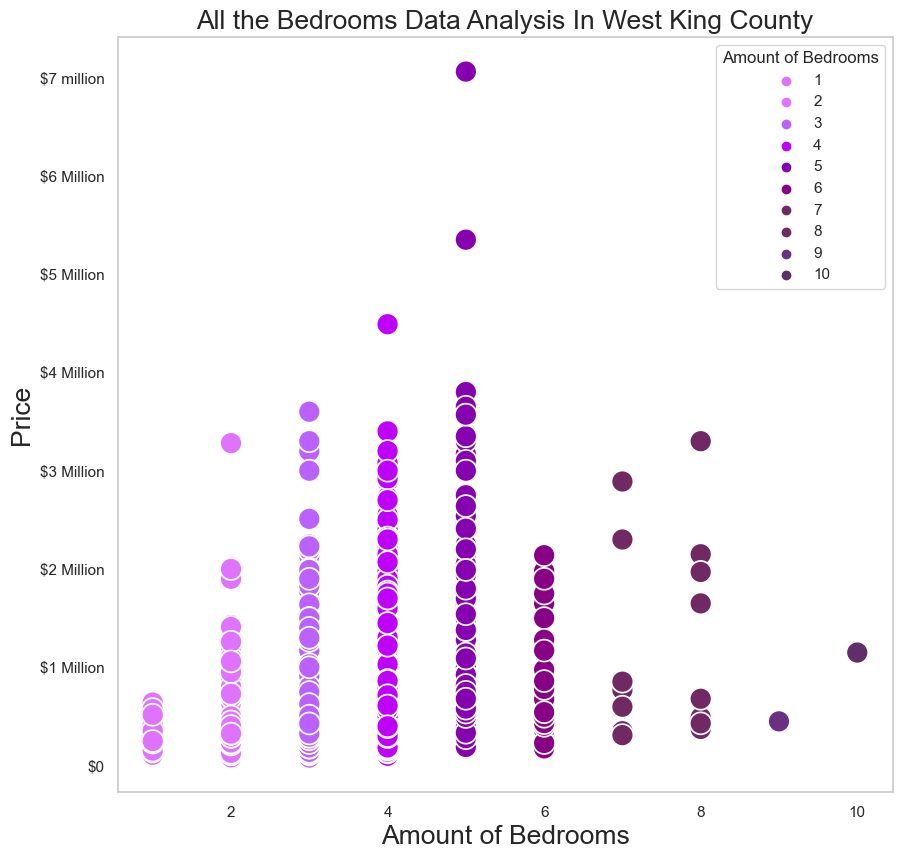

In [430]:
x = regressiondata1['Amount_of_Bedrooms']
y = regressiondata1['Price']
sns.set(style='whitegrid')
flatui = ['#df73ff','#df73ff','#ba61ff','#bf00ff','#8601af','#880085','#702963','#702963',
          '#6c3082','#602f6b']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata1, x=x, y=y,s=250,hue='Amount_of_Bedrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In West King County',size=19)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Bedrooms')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',
                    '$6 Million','$7 million'])
plt.show()

In [431]:
train_df, test_df = train_test_split(regressiondata1, test_size=0.10, shuffle=False)

In [432]:
X_train, y_train = train_df[['Amount_of_Bedrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bedrooms']], test_df[['Price']]

In [433]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [434]:
Quantile_regression = pd.DataFrame({'Amount_of_Bedrooms': X_test.reset_index()['Amount_of_Bedrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [435]:
Quantile_regression[500:]

Amount_of_Bedrooms            0.1            0.5           0.9      Price
500                   6  283998.862974  630994.860369  1.771976e+06   780000.0
501                   6  283998.862974  630994.860369  1.771976e+06   859950.0
502                   6  283998.862974  630994.860369  1.771976e+06  1280000.0
503                   6  283998.862974  630994.860369  1.771976e+06  1170000.0
504                   1  175001.723835  310003.386578  6.000073e+05   245000.0
..                  ...            ...            ...           ...        ...
577                   8  283998.862974  630994.860369  1.771976e+06   680000.0
578                   8  283998.862974  630994.860369  1.771976e+06  1970000.0
579                   8  283998.862974  630994.860369  1.771976e+06  3300000.0
580                   9  283998.862974  630994.860369  1.771976e+06   450000.0
581                  10  283998.862974  630994.860369  1.771976e+06  1150000.0

[82 rows x 5 columns]

In [436]:
melted_data = pd.melt(Quantile_regression, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.drop(range(1746,2328))

In [437]:
melted_data

Amount_of_Bedrooms variable         value
0                      5      0.1  2.839989e+05
1                      5      0.1  2.839989e+05
2                      5      0.1  2.839989e+05
3                      5      0.1  2.839989e+05
4                      5      0.1  2.839989e+05
...                  ...      ...           ...
1741                   8      0.9  1.771976e+06
1742                   8      0.9  1.771976e+06
1743                   8      0.9  1.771976e+06
1744                   9      0.9  1.771976e+06
1745                  10      0.9  1.771976e+06

[1746 rows x 3 columns]

In [438]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Bedrooms':[1,2,3,4,5,6,7,8,9,10],
    '0.1':[175001.723835,175001.723835,175001.723835,283998.862974,
           283998.862974,283998.862974,283998.862974,283998.862974,283998.862974,283998.862974],
'0.5':[310003.386578,310003.386578,310003.386578,630994.860369,630994.860369,630994.860369,
       630994.860369,630994.860369,630994.860369,630994.860369],
'0.9':[6.000073e+05,6.000073e+05,6.000073e+05,1.771976e+06,1.771976e+06,1.771976e+06,1.771976e+06,
      1.771976e+06,1.771976e+06,1.771976e+06]})
Quantileregression_updated


Amount_of_Bedrooms            0.1            0.5        0.9
0                   1  175001.723835  310003.386578   600007.3
1                   2  175001.723835  310003.386578   600007.3
2                   3  175001.723835  310003.386578   600007.3
3                   4  283998.862974  630994.860369  1771976.0
4                   5  283998.862974  630994.860369  1771976.0
5                   6  283998.862974  630994.860369  1771976.0
6                   7  283998.862974  630994.860369  1771976.0
7                   8  283998.862974  630994.860369  1771976.0
8                   9  283998.862974  630994.860369  1771976.0
9                  10  283998.862974  630994.860369  1771976.0

In [439]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data


Amount_of_Bedrooms Percentile         value
0                    1        0.1  1.750017e+05
1                    2        0.1  1.750017e+05
2                    3        0.1  1.750017e+05
3                    4        0.1  2.839989e+05
4                    5        0.1  2.839989e+05
5                    6        0.1  2.839989e+05
6                    7        0.1  2.839989e+05
7                    8        0.1  2.839989e+05
8                    9        0.1  2.839989e+05
9                   10        0.1  2.839989e+05
10                   1        0.5  3.100034e+05
11                   2        0.5  3.100034e+05
12                   3        0.5  3.100034e+05
13                   4        0.5  6.309949e+05
14                   5        0.5  6.309949e+05
15                   6        0.5  6.309949e+05
16                   7        0.5  6.309949e+05
17                   8        0.5  6.309949e+05
18                   9        0.5  6.309949e+05
19                  10        0.5  6.309949e+05
20                   1        0.9  6.000073e+05
21                   2        0.9  6.000073e+05
22                   3        0.9  6.000073e+05
23                   4        0.9  1.771976e+06
24                   5        0.9  1.771976e+06
25                   6        0.9  1.771976e+06
26                   7        0.9  1.771976e+06
27                   8        0.9  1.771976e+06
28                   9        0.9  1.771976e+06
29                  10        0.9  1.771976e+06

<ipython-input-440-02ecfce71903>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$600,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$600,000'),
 Text(0, 1200000.0, '$1 Million'),
 Text(0, 1400000.0, '$1.2 Million'),
 Text(0, 1600000.0, '$1.4 Million'),
 Text(0, 1800000.0, '$1.6 Million'),
 Text(0, 2000000.0, '$1.8 Million')]

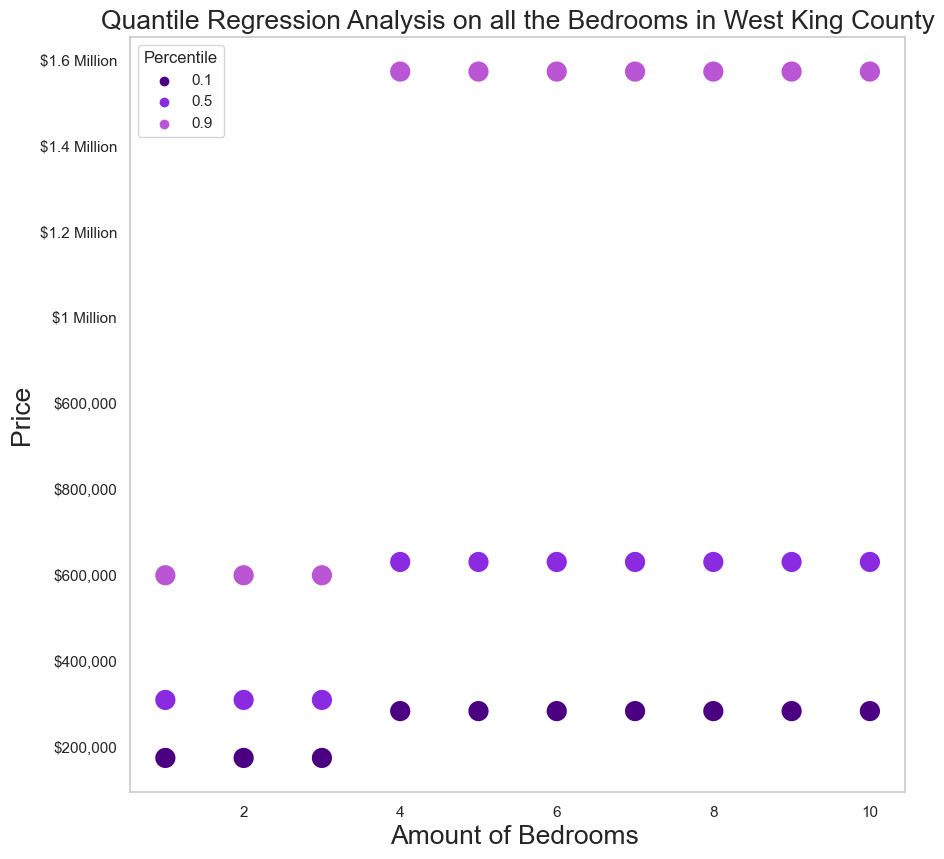

In [440]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax = sns.scatterplot(data=melted_data, x="Amount_of_Bedrooms", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
plt.gcf().set_size_inches((10,10))
ax.set_title('Quantile Regression Analysis on all the Bedrooms in West King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$600,000',
'$1 Million','$1.2 Million','$1.4 Million','$1.6 Million','$1.8 Million'])

<ipython-input-441-6ebcf216455c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$600,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$600,000'),
 Text(0, 1200000.0, '$1 Million'),
 Text(0, 1400000.0, '$1.2 Million'),
 Text(0, 1600000.0, '$1.4 Million'),
 Text(0, 1800000.0, '$1.6 Million'),
 Text(0, 2000000.0, '$1.8 Million')]

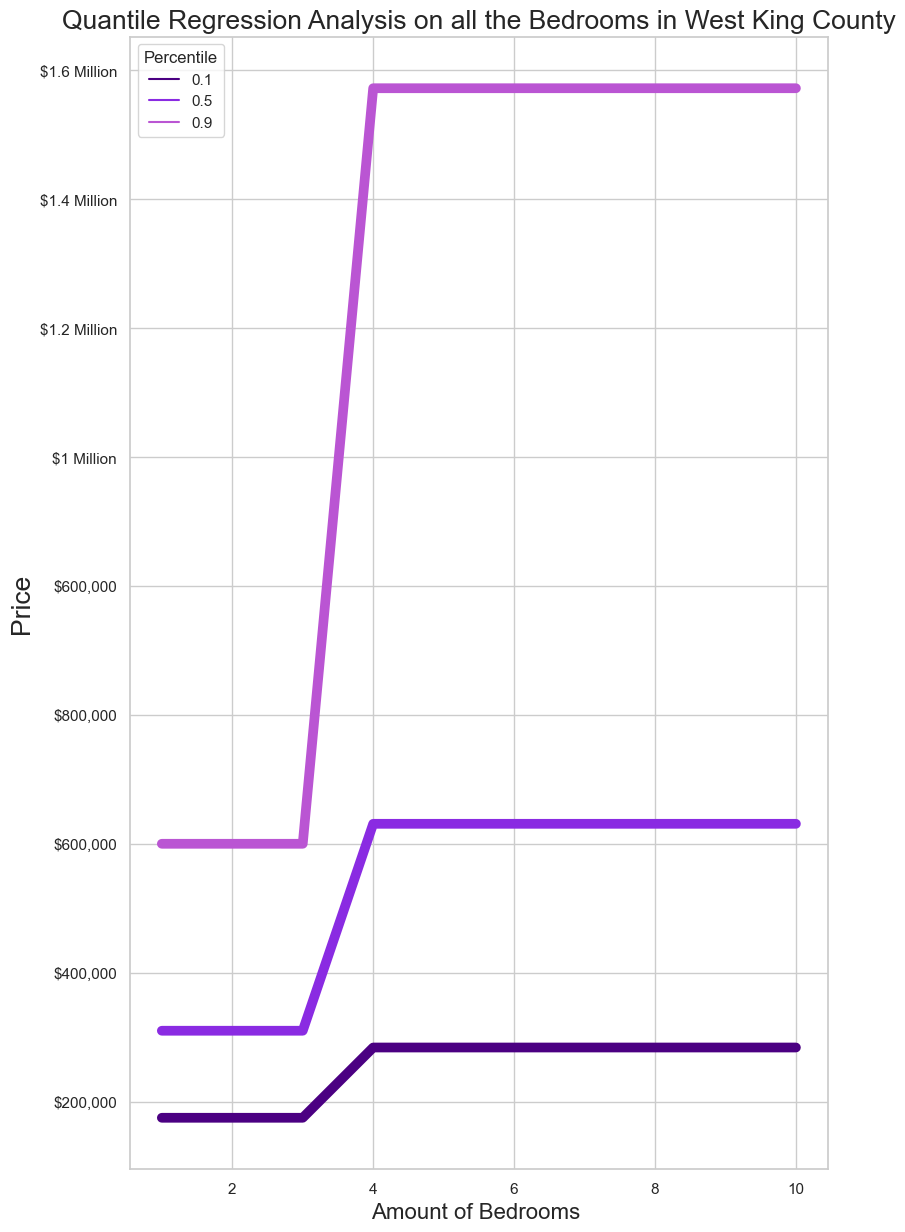

In [441]:
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Bedrooms",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bedrooms in West King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$600,000',
'$1 Million','$1.2 Million','$1.4 Million','$1.6 Million','$1.8 Million'])

In [442]:
(Quantile_regression['Price'] > Quantile_regression['0.1']).value_counts()

True     544
False     38
dtype: int64

In [443]:
i = 0
y= 0
x = []
while i < 544:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 38:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [444]:
(Quantile_regression['Price'] > Quantile_regression['0.5']).value_counts()

False    307
True     275
dtype: int64

In [445]:
i = 0
y= 0
x = []
while i < 307:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 275:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [446]:
(Quantile_regression['Price'] > Quantile_regression['0.9']).value_counts()

False    537
True      45
dtype: int64

In [447]:
i = 0
y= 0
x = []
while i < 537:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 45:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

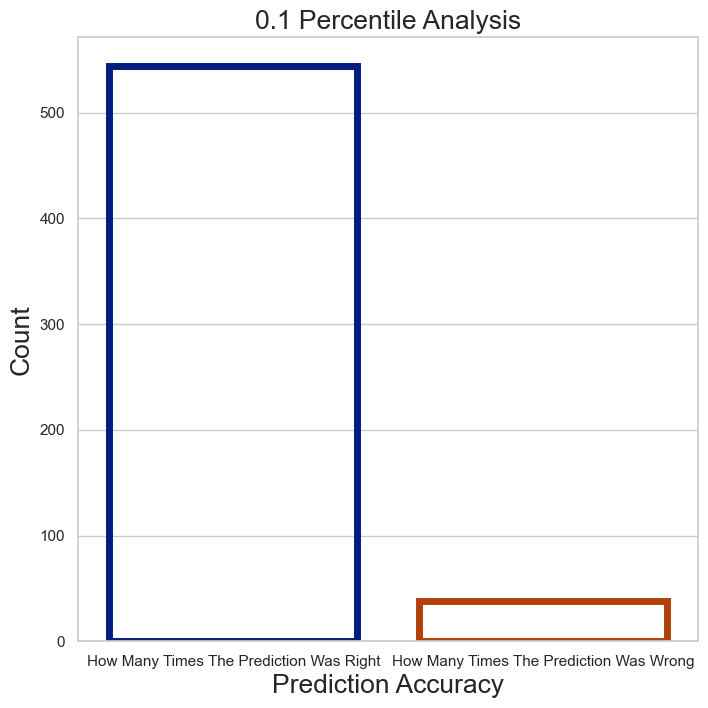

In [448]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

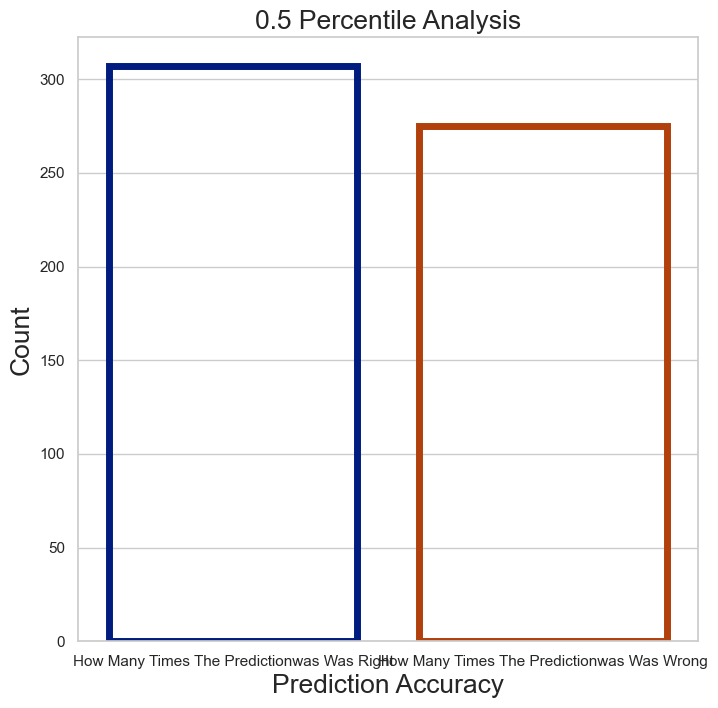

In [449]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

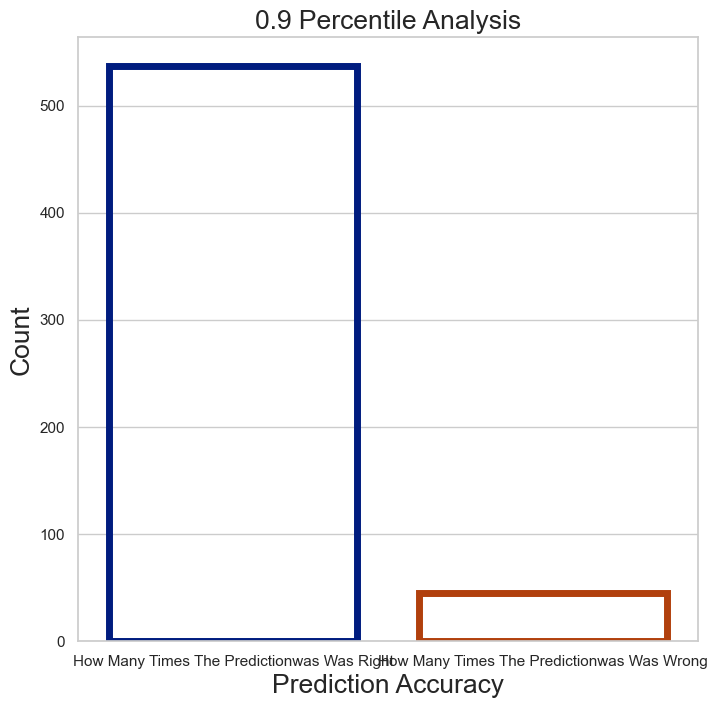

In [450]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [451]:
Predictions = []
for i in regressiondata1.Amount_of_Bedrooms:
    if i == 1:Predictions.append('Between: $175,001 - $600,007')
    if i == 2: Predictions.append('Between: $175,001 - $600,007')
    if i == 3:Predictions.append('Between: $175,001 - $600,007')
    if i == 4:Predictions.append('Between: $283,998 - $1,771,976') 
    if i == 5:Predictions.append('Between: $283,998 - $1,771,976')
    if i == 6:Predictions.append('Between: $283,998 - $1,771,976')
    if i == 7:Predictions.append('Between: $283,998 - $1,771,976')
    if i == 8:Predictions.append('Between: $283,998 - $1,771,976')
    if i == 9:Predictions.append('Between: $283,998 - $1,771,976')
    if i == 10:Predictions.append('Between: $283,998 - $1,771,976')
len(Predictions)

5816

In [452]:
price = []
for i in regressiondata1.Price:
    price.append("${:,.0f}".format(i))

In [453]:
Prediction = pd.DataFrame({'Amount of Bedrooms':regressiondata1.Amount_of_Bedrooms,
                           'Prediction':Predictions,'Actual Price':price})
Prediction

Amount of Bedrooms                      Prediction Actual Price
0                      3    Between: $175,001 - $600,007     $221,900
1                      3    Between: $175,001 - $600,007     $510,000
2                      3    Between: $175,001 - $600,007     $229,500
3                      3    Between: $175,001 - $600,007     $400,000
4                      3    Between: $175,001 - $600,007     $667,000
...                  ...                             ...          ...
5811                   8  Between: $283,998 - $1,771,976     $680,000
5812                   8  Between: $283,998 - $1,771,976   $1,970,000
5813                   8  Between: $283,998 - $1,771,976   $3,300,000
5814                   9  Between: $283,998 - $1,771,976     $450,000
5815                  10  Between: $283,998 - $1,771,976   $1,150,000

[5816 rows x 3 columns]

In [454]:
def AMOUNT_BATHROOMS(AMOUNT_BATHROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bathrooms"].tolist()
    X_value = []
    bathroom_index = []
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
        
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)

    for i in bathroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_BATHROOM)
    
    return X_value
no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
amount_bathrooms_westking = []
for i in no_of_bathrooms:
    amount_bathrooms_westking.append(AMOUNT_BATHROOMS(i))
amount_bathrooms_westking= sum(amount_bathrooms_westking, [])
len(amount_bathrooms_westking)

5816

In [455]:
def PRICE_BATHROOM(AMOUNT_BATHROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bath = house_info["Bathrooms"].tolist()

    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
        
    bathroom_index = []
    for i,x in enumerate(amount_bath):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)
    len(bathroom_index)

    bathroom_westking = []
    for i in bathroom_index:
        if locations[i] == zip_loca[0] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[1] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[2] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[3] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[4]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[5] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[6] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[7]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[8] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[9] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[10] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[11] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[12]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[13] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[14] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[15] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[16]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[17] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[18]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[19] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[20]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[21] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[22] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[23] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[24] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[25] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[26] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[27] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[28]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[29] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[30] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[31]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[32] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[33] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[34] : bathroom_westking.append(i)
    price = house_info["Price"].tolist()

    price_westking = []
    for i in bathroom_westking:price_westking.append(price[i])
    return(price_westking)

no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
price_bathroom_westking = []
for i in no_of_bathrooms:
    price_bathroom_westking.append(PRICE_BATHROOM(i))
price_bathroom_westking = sum(price_bathroom_westking, [])
price_bathroom_westking

[605000.0,
 625000.0,
 345000.0,
 975000.0,
 437500.0,
 1090000.0,
 375000.0,
 430000.0,
 453246.0,
 425000.0,
 560000.0,
 465000.0,
 592500.0,
 445838.0,
 2400000.0,
 455000.0,
 389999.0,
 446500.0,
 834000.0,
 552250.0,
 380000.0,
 673000.0,
 810000.0,
 403950.0,
 437000.0,
 364950.0,
 538000.0,
 380000.0,
 365000.0,
 237000.0,
 722500.0,
 578000.0,
 490000.0,
 437500.0,
 650000.0,
 480000.0,
 346900.0,
 2130000.0,
 280000.0,
 725000.0,
 863000.0,
 619000.0,
 640000.0,
 900000.0,
 290000.0,
 360000.0,
 372500.0,
 595000.0,
 533600.0,
 485000.0,
 559950.0,
 430000.0,
 337000.0,
 507000.0,
 639000.0,
 429900.0,
 269950.0,
 675000.0,
 470000.0,
 347000.0,
 535800.0,
 370500.0,
 467000.0,
 457500.0,
 785000.0,
 1270000.0,
 324000.0,
 915000.0,
 524250.0,
 648000.0,
 515000.0,
 395000.0,
 360000.0,
 550000.0,
 285000.0,
 262000.0,
 515000.0,
 303000.0,
 510000.0,
 359000.0,
 925000.0,
 334950.0,
 460000.0,
 485500.0,
 685100.0,
 484000.0,
 441500.0,
 590000.0,
 403000.0,
 445000.0,
 53000

In [456]:
regressiondata2 = pd.DataFrame({'Amount_of_Bathrooms':amount_bathrooms_westking,
                                'Price':price_bathroom_westking})
k = regressiondata2.Amount_of_Bathrooms.value_counts()
len(k)

24

<ipython-input-457-79455ec7b52f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',


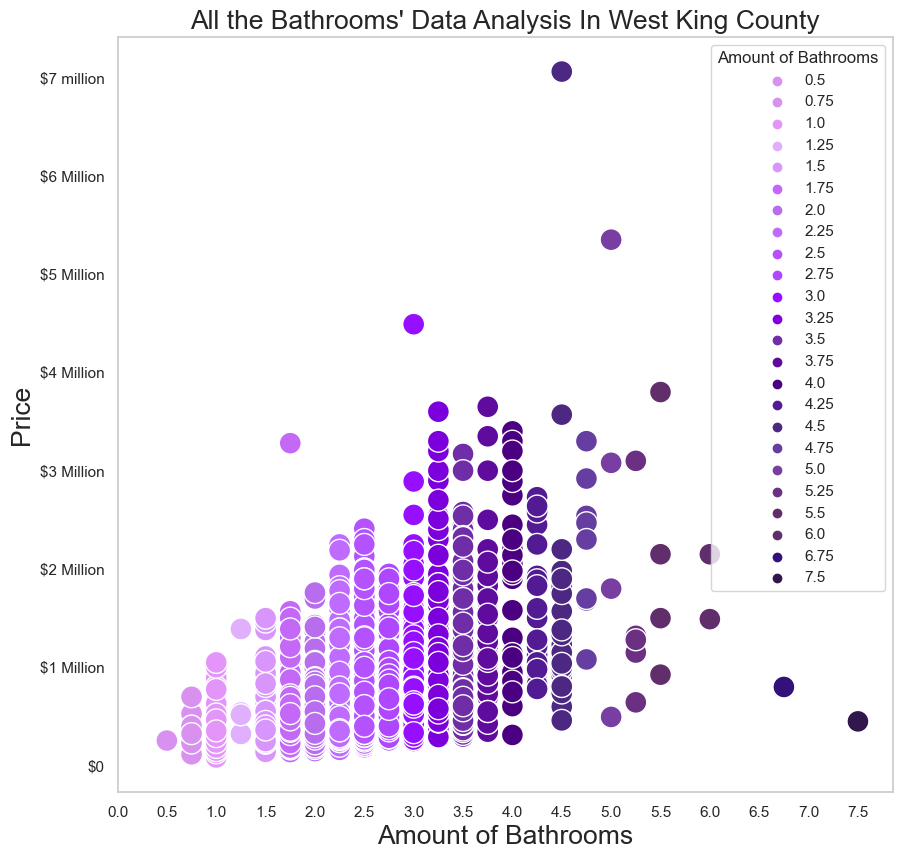

In [457]:
x = regressiondata2['Amount_of_Bathrooms']
y = regressiondata2['Price']
flatui = ['#d891ef','#d891ef','#e395f9','#e0b0ff','#d895fc','#c468f8',
          '#b76dee','#bf6bff', '#b452ff','#af47ff','#970fff','#7c00db',
          '#6f2da8','#5f0b9e','#4b0082','#521b93','#4c2882','#663ea1','#783ea1',
          '#6c3082', '#602f6b','#602f6b','#32127a','#32174d',
          ]

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata2, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Bathrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bathrooms\' Data Analysis In West King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.legend(title='Amount of Bathrooms')
plt.ylabel("Price", size=19)
plt.xticks(np.arange(0,7.75,0.5))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',
                    '$6 Million','$7 million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()

plt.show()

In [458]:
train_df, test_df = train_test_split(regressiondata2, test_size=0.10, shuffle=False)

In [459]:
X_train, y_train = train_df[['Amount_of_Bathrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bathrooms']], test_df[['Price']]

In [460]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [461]:
Quantile_regression1 = pd.DataFrame({'Amount_of_Bathrooms': X_test.reset_index()['Amount_of_Bathrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [462]:
Quantile_regression1

Amount_of_Bathrooms            0.1            0.5           0.9  \
0                   3.00  335522.352605  584970.750840  1.398984e+06   
1                   3.00  335522.352605  584970.750840  1.398984e+06   
2                   3.00  335522.352605  584970.750840  1.398984e+06   
3                   3.00  335522.352605  584970.750840  1.398984e+06   
4                   3.00  335522.352605  584970.750840  1.398984e+06   
..                   ...            ...            ...           ...   
577                 6.00  335522.352605  584970.750840  1.398984e+06   
578                 6.00  335522.352605  584970.750840  1.398984e+06   
579                 0.50  170351.744461  270004.117017  5.000076e+05   
580                 6.75  335522.352605  584970.750840  1.398984e+06   
581                 7.50  335522.352605  584970.750840  1.398984e+06   

         Price  
0     552100.0  
1     785000.0  
2     519995.0  
3     334950.0  
4     649500.0  
..         ...  
577  2150000.0  
578  1490000.0  
579   255000.0  
580   800000.0  
581   450000.0  

[582 rows x 5 columns]

In [463]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Bathrooms':[0.50,0.25,0.75,1.0,1.25,
                                                                  1.5,1.75,2.0,2.5,2.25,2.75,
                                                                  
                                                                  3.0,3.25,3.5,3.75,4.0,
                                                                  4.25,4.5,4.75,5.0,5.25,5.5,5.75,
                                                                  6.0,6.25,6.5,6.75,7,7.5],
    '0.1':[170351.744461,170351.744461,170351.744461,170351.744461,170351.744461,170351.744461,
          170351.744461,170351.744461,170351.744461,170351.744461,170351.744461,
          
           335522.352605,335522.352605,335522.352605,335522.352605,335522.352605,335522.352605,
          335522.352605,335522.352605,335522.352605,335522.352605,335522.352605,335522.352605,
          335522.352605,335522.352605,335522.352605,335522.352605,335522.352605,335522.352605],
                                           
 '0.5':[270004.117017,270004.117017,270004.117017,270004.117017,270004.117017,270004.117017,
       270004.117017,270004.117017,270004.117017,270004.117017,270004.117017,
       
       584970.750840,584970.750840,584970.750840,584970.750840,584970.750840,584970.750840,
        584970.750840,584970.750840,584970.750840,584970.750840,584970.750840,584970.750840,
        584970.750840,584970.750840,584970.750840,584970.750840,584970.750840,584970.750840,],
   '0.9':[5.000076e+05,5.000076e+05,5.000076e+05,5.000076e+05,5.000076e+05,5.000076e+05,
         5.000076e+05,5.000076e+05,5.000076e+05,5.000076e+05,5.000076e+05,
         
        1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,
        1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,
        1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,1.398984e+06,]})
Quantileregression_updated

Amount_of_Bathrooms            0.1            0.5        0.9
0                  0.50  170351.744461  270004.117017   500007.6
1                  0.25  170351.744461  270004.117017   500007.6
2                  0.75  170351.744461  270004.117017   500007.6
3                  1.00  170351.744461  270004.117017   500007.6
4                  1.25  170351.744461  270004.117017   500007.6
5                  1.50  170351.744461  270004.117017   500007.6
6                  1.75  170351.744461  270004.117017   500007.6
7                  2.00  170351.744461  270004.117017   500007.6
8                  2.50  170351.744461  270004.117017   500007.6
9                  2.25  170351.744461  270004.117017   500007.6
10                 2.75  170351.744461  270004.117017   500007.6
11                 3.00  335522.352605  584970.750840  1398984.0
12                 3.25  335522.352605  584970.750840  1398984.0
13                 3.50  335522.352605  584970.750840  1398984.0
14                 3.75  335522.352605  584970.750840  1398984.0
15                 4.00  335522.352605  584970.750840  1398984.0
16                 4.25  335522.352605  584970.750840  1398984.0
17                 4.50  335522.352605  584970.750840  1398984.0
18                 4.75  335522.352605  584970.750840  1398984.0
19                 5.00  335522.352605  584970.750840  1398984.0
20                 5.25  335522.352605  584970.750840  1398984.0
21                 5.50  335522.352605  584970.750840  1398984.0
22                 5.75  335522.352605  584970.750840  1398984.0
23                 6.00  335522.352605  584970.750840  1398984.0
24                 6.25  335522.352605  584970.750840  1398984.0
25                 6.50  335522.352605  584970.750840  1398984.0
26                 6.75  335522.352605  584970.750840  1398984.0
27                 7.00  335522.352605  584970.750840  1398984.0
28                 7.50  335522.352605  584970.750840  1398984.0

In [464]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bathrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

Amount_of_Bathrooms Percentile         value
0                  0.50        0.1  1.703517e+05
1                  0.25        0.1  1.703517e+05
2                  0.75        0.1  1.703517e+05
3                  1.00        0.1  1.703517e+05
4                  1.25        0.1  1.703517e+05
..                  ...        ...           ...
82                 6.25        0.9  1.398984e+06
83                 6.50        0.9  1.398984e+06
84                 6.75        0.9  1.398984e+06
85                 7.00        0.9  1.398984e+06
86                 7.50        0.9  1.398984e+06

[87 rows x 3 columns]

<ipython-input-465-8f13d9deaea5>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',


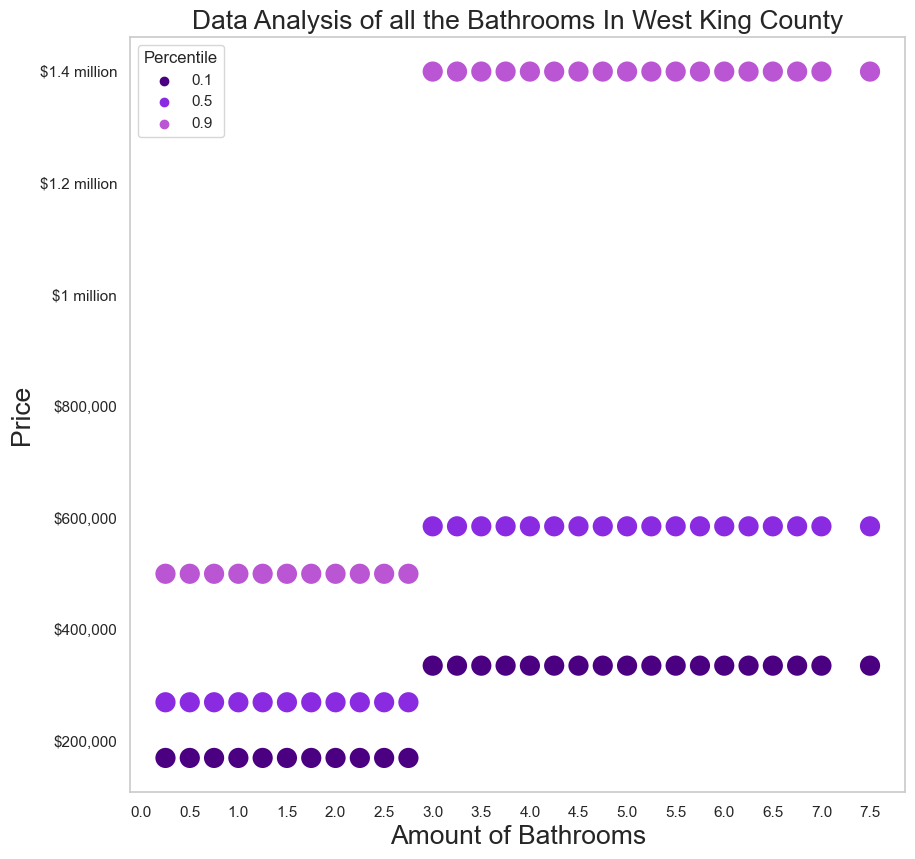

In [465]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Bathrooms",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.xticks(np.arange(0,7.75,0.5))     
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Bathrooms In West King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
        '$1 million','$1.2 million','$1.4 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Bathrooms")
plt.gcf().set_size_inches((10,10))

<ipython-input-466-17fc86af4415>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 million'),
 Text(0, 1200000.0, '$1.2 million'),
 Text(0, 1400000.0, '$1.4 million'),
 Text(0, 1600000.0, '')]

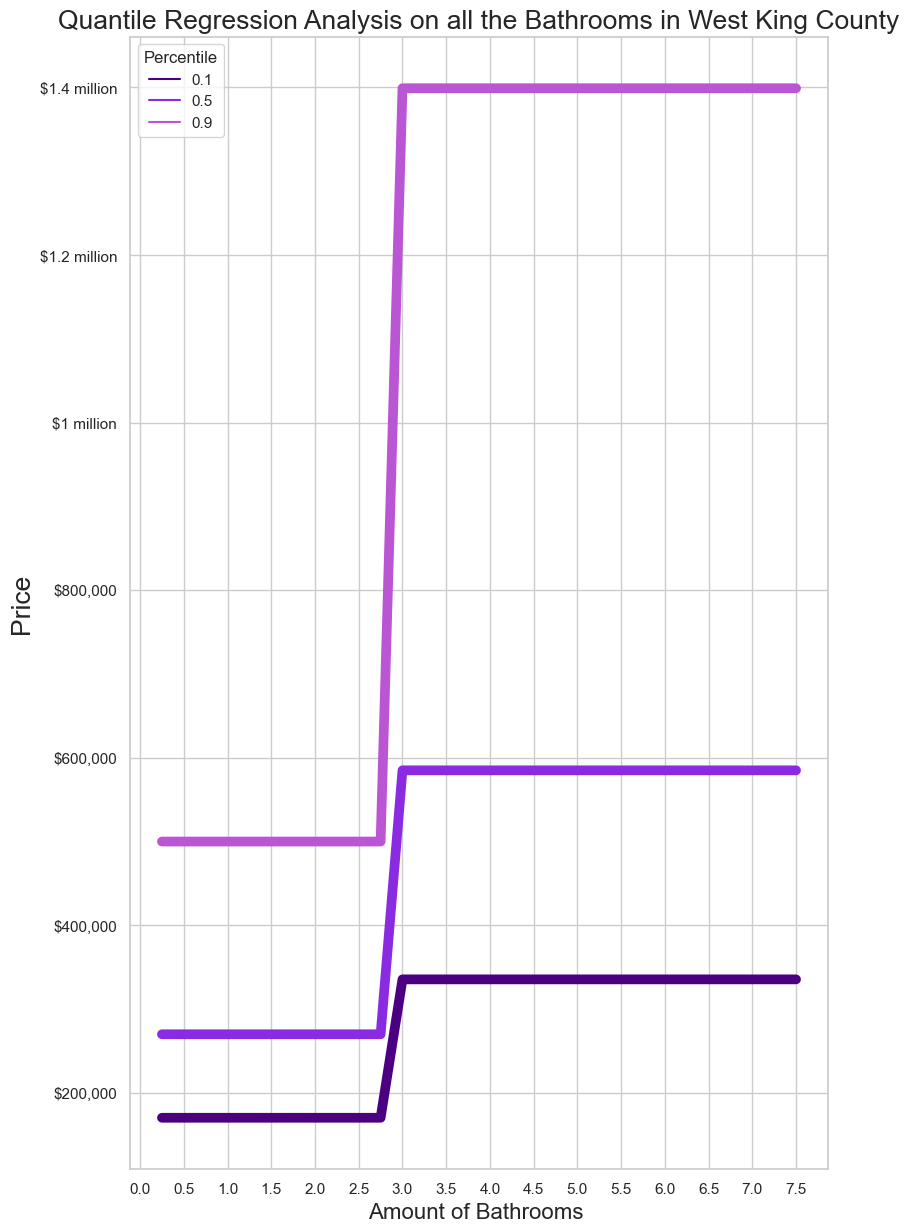

In [466]:
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Bathrooms",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.xticks(np.arange(0,7.75,0.5))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bathrooms in West King County',size=19)
plt.xlabel("Amount of Bathrooms ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
        '$1 million','$1.2 million','$1.4 million'])

In [467]:
(Quantile_regression1['Price'] > Quantile_regression1['0.1']).value_counts()

True     570
False     12
dtype: int64

In [468]:
i = 0
y= 0
x = []
while i < 570:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 12:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

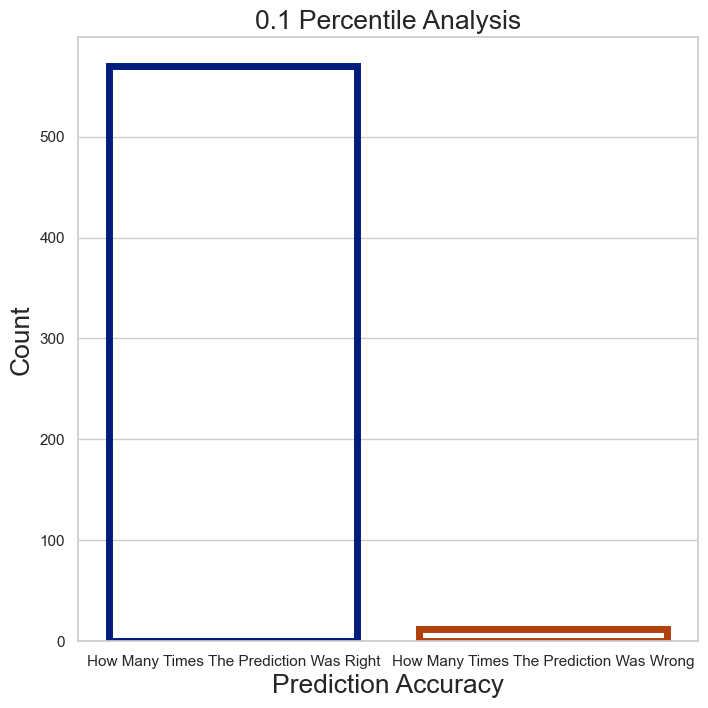

In [469]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [470]:
(Quantile_regression1['Price'] > Quantile_regression1['0.5']).value_counts()

True     474
False    108
dtype: int64

In [471]:
i = 0
y= 0
x = []
while i < 474:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 108:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

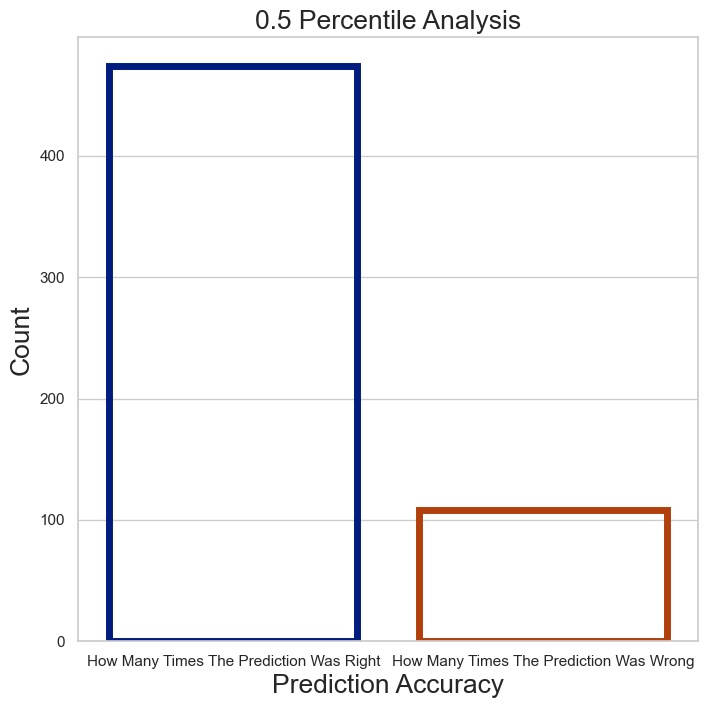

In [472]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [473]:
(Quantile_regression1['Price'] > Quantile_regression1['0.9']).value_counts()

False    426
True     156
dtype: int64

In [474]:
i = 0
y= 0
x = []
while i < 426:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 156:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

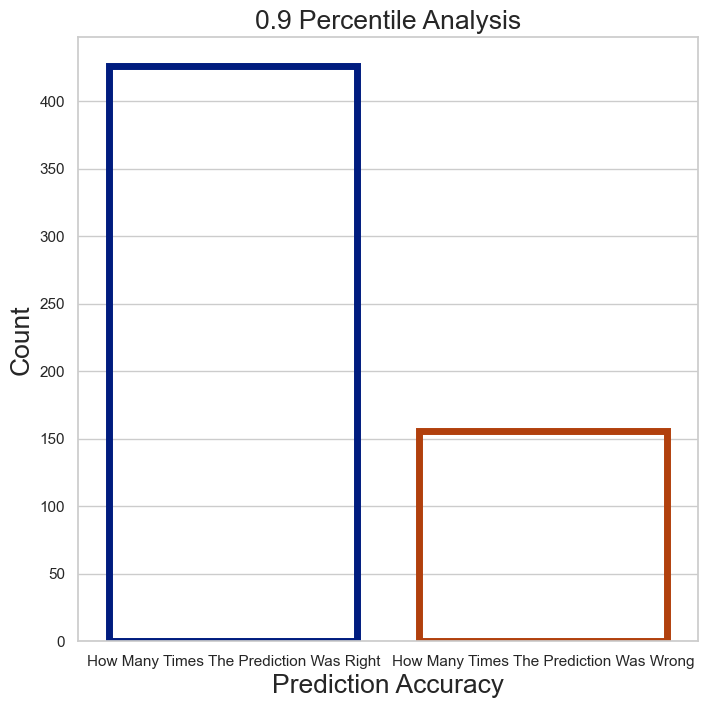

In [475]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [476]:
Predictions1 = []
for i in regressiondata2.Amount_of_Bathrooms:
    if i == 0.5:Predictions1.append('Between: $170,351 - $500,007')
    if i == 0.25:Predictions1.append('Between: $170,351 - $500,007')
    if i == 0.75: Predictions1.append('Between: $170,351 - $500,007')
    if i == 1.0:Predictions1.append('Between: $170,351 - $500,007')
    if i == 1.25:Predictions1.append('Between: $170,351 - $500,007')
    if i == 1.5:Predictions1.append('Between: $170,351 - $500,007') 
    if i == 1.75:Predictions1.append('Between: $170,351 - $500,007')
    if i == 2.0:Predictions1.append('Between: $170,351 - $500,007')
    if i == 2.25:Predictions1.append('Between: $170,351 - $500,007')
    if i == 2.5:Predictions1.append('Between: $170,351 - $500,007') 
    if i == 2.75:Predictions1.append('Between: $170,351 - $500,007')
    if i == 3.0: Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 3.25:Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 3.5:Predictions1.append('Between: $335,522 - $1,398,984') 
    if i == 3.75:Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 4.0:Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 4.25:Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 4.5:Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 4.75: Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 5.0:Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 5.25:Predictions1.append('Between: $335,522 - $1,398,984') 
    if i == 5.5:Predictions1.append('Between: $335,522 - $1,398,984') 
    if i == 5.75:Predictions1.append('Between: $335,522 - $1,398,984') 
    if i == 6.0:Predictions1.append('Between: $335,522 - $1,398,984')
    if i == 6.25:Predictions1.append('Between: $335,522 - $1,398,984') 
    if i == 6.5:Predictions1.append('Between: $335,522 - $1,398,984')  
    if i == 6.75:Predictions1.append('Between: $335,522 - $1,398,984') 
    if i == 7.0:Predictions1.append('Between: $335,522 - $1,398,984') 
    if i == 7.5:Predictions1.append('Between: $335,522 - $1,398,984') 
len(Predictions1)

5816

In [477]:
price = []
for i in regressiondata2.Price:
    price.append("${:,.0f}".format(i))
len(price)

5816

In [478]:
Prediction1 = pd.DataFrame({'Amount of Bathrooms':regressiondata2.Amount_of_Bathrooms,
                           'Prediction':Predictions1,'Actual Price':price})
Prediction1

Amount of Bathrooms                      Prediction Actual Price
0                    2.50    Between: $170,351 - $500,007     $605,000
1                    2.50    Between: $170,351 - $500,007     $625,000
2                    2.50    Between: $170,351 - $500,007     $345,000
3                    2.50    Between: $170,351 - $500,007     $975,000
4                    2.50    Between: $170,351 - $500,007     $437,500
...                   ...                             ...          ...
5811                 6.00  Between: $335,522 - $1,398,984   $2,150,000
5812                 6.00  Between: $335,522 - $1,398,984   $1,490,000
5813                 0.50    Between: $170,351 - $500,007     $255,000
5814                 6.75  Between: $335,522 - $1,398,984     $800,000
5815                 7.50  Between: $335,522 - $1,398,984     $450,000

[5816 rows x 3 columns]

In [479]:
def PRICE_FLOORS(AMOUNT_FLOORS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_floors = house_info['Floors'].tolist()

    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
    len(floors_index)
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    floors_westking = []
    for i in floors_index:
        if locations[i] == zip_loca[0] : floors_westking.append(i)
        elif locations[i] == zip_loca[1] : floors_westking.append(i)
        elif locations[i] == zip_loca[2] : floors_westking.append(i)
        elif locations[i] == zip_loca[3] : floors_westking.append(i)
        elif locations[i] == zip_loca[4]: floors_westking.append(i)
        elif locations[i] == zip_loca[5] : floors_westking.append(i)
        elif locations[i] == zip_loca[6] : floors_westking.append(i)
        elif locations[i] == zip_loca[7]: floors_westking.append(i)
        elif locations[i] == zip_loca[8] : floors_westking.append(i)
        elif locations[i] == zip_loca[9] : floors_westking.append(i)
        elif locations[i] == zip_loca[10] : floors_westking.append(i)
        elif locations[i] == zip_loca[11] : floors_westking.append(i)
        elif locations[i] == zip_loca[12]: floors_westking.append(i)
        elif locations[i] == zip_loca[13] : floors_westking.append(i)
        elif locations[i] == zip_loca[14] : floors_westking.append(i)
        elif locations[i] == zip_loca[15] : floors_westking.append(i)
        elif locations[i] == zip_loca[16]: floors_westking.append(i)
        elif locations[i] == zip_loca[17] : floors_westking.append(i)
        elif locations[i] == zip_loca[18]: floors_westking.append(i)
        elif locations[i] == zip_loca[19] : floors_westking.append(i)
        elif locations[i] == zip_loca[20]: floors_westking.append(i)
        elif locations[i] == zip_loca[21] : floors_westking.append(i)
        elif locations[i] == zip_loca[22] : floors_westking.append(i)
        elif locations[i] == zip_loca[23] : floors_westking.append(i)
        elif locations[i] == zip_loca[24] : floors_westking.append(i)
        elif locations[i] == zip_loca[25] : floors_westking.append(i)
        elif locations[i] == zip_loca[26] : floors_westking.append(i)
        elif locations[i] == zip_loca[27] : floors_westking.append(i)
        elif locations[i] == zip_loca[28]: floors_westking.append(i)
        elif locations[i] == zip_loca[29] : floors_westking.append(i)
        elif locations[i] == zip_loca[30] : floors_westking.append(i)
        elif locations[i] == zip_loca[31]: floors_westking.append(i)
        elif locations[i] == zip_loca[32] : floors_westking.append(i)
        elif locations[i] == zip_loca[33] : floors_westking.append(i)
        elif locations[i] == zip_loca[34] : floors_westking.append(i)

    price = house_info["Price"].tolist()

    price_westking = []
    for i in floors_westking:price_westking.append(price[i])
    return(price_westking)

no_of_floors = house_info["Floors"].value_counts().index.tolist()
price_floors_westking= []
for i in no_of_floors:
    price_floors_westking.append(PRICE_FLOORS(i))
price_floors_westking = sum(price_floors_westking, [])
len(price_floors_westking)

5816

In [480]:
def AMOUNT_FLOORS(AMOUNT_FLOORS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_floors = house_info["Floors"].tolist()
    X_value = []
    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    for i in floors_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_FLOORS)
    return X_value
no_of_floors = house_info["Floors"].value_counts().index.tolist()
amount_floors_westking = []
for i in no_of_floors:
    amount_floors_westking.append(AMOUNT_FLOORS(i))
amount_floors_westking= sum(amount_floors_westking, [])
len(amount_floors_westking)

5816

In [481]:
regressiondata3 = pd.DataFrame({'Amount_of_Floors':amount_floors_westking,
                                'Price':price_floors_westking})
#regressiondata3.Amount_of_Floors.value_counts()
regressiondata3

Amount_of_Floors      Price
0                  1.0   221900.0
1                  1.0   510000.0
2                  1.0   229500.0
3                  1.0   400000.0
4                  1.0   322500.0
...                ...        ...
5811               2.5   526000.0
5812               2.5   414000.0
5813               2.5   424950.0
5814               2.5   424950.0
5815               3.5  3300000.0

[5816 rows x 2 columns]

<ipython-input-482-09b3ed0ba9ed>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million',


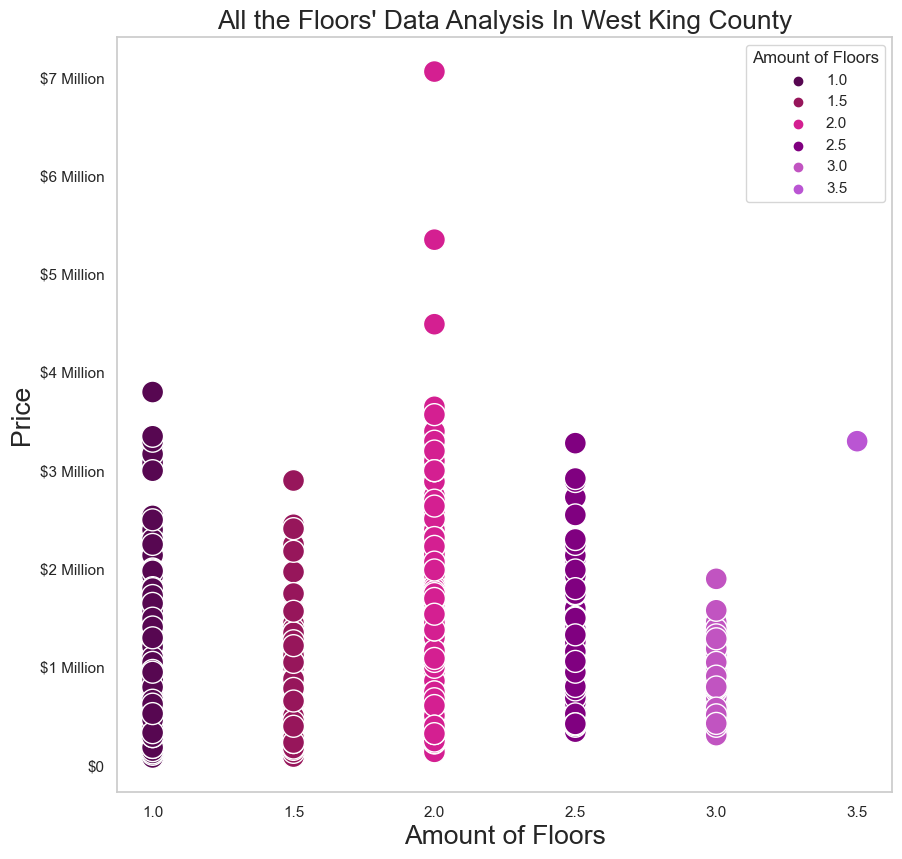

In [482]:
x = regressiondata3['Amount_of_Floors']
y = regressiondata3['Price']
flatui = ['#570751','#97165B','#D41F91','#800080','#c154c1','#ba55d3']
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata3, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Floors', palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Floors\' Data Analysis In West King County',size=19)
plt.xlabel("Amount of Floors", size=19)
plt.legend(title='Amount of Floors')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million',
                    '$4 Million','$5 Million','$6 Million','$7 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [483]:
train_df, test_df = train_test_split(regressiondata3, test_size=0.10, shuffle=False)

In [484]:
X_train, y_train = train_df[['Amount_of_Floors']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Floors']], test_df[['Price']]

In [485]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [486]:
Quantile_regression2 = pd.DataFrame({'Amount_of_Floors': X_test.reset_index()['Amount_of_Floors'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [487]:
Quantile_regression2

Amount_of_Floors            0.1            0.5           0.9      Price
0                 1.5  253969.644272  534997.476667  1.929972e+06   290000.0
1                 1.5  253969.644272  534997.476667  1.929972e+06   451000.0
2                 1.5  253969.644272  534997.476667  1.929972e+06   915000.0
3                 1.5  253969.644272  534997.476667  1.929972e+06   260000.0
4                 1.5  253969.644272  534997.476667  1.929972e+06   399000.0
..                ...            ...            ...           ...        ...
577               2.5  344997.211053  549897.080902  1.089995e+06   526000.0
578               2.5  344997.211053  549897.080902  1.089995e+06   414000.0
579               2.5  344997.211053  549897.080902  1.089995e+06   424950.0
580               2.5  344997.211053  549897.080902  1.089995e+06   424950.0
581               3.5  344997.211053  549897.080902  1.089995e+06  3300000.0

[582 rows x 5 columns]

In [488]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Floors':[1.0,1.5,2.0,2.5,3.0,3.5],
    '0.1':[253969.644272,253969.644272,253969.644272,344997.211053,344997.211053,344997.211053],
'0.5':[534997.476667,534997.476667,534997.476667,549897.080902,549897.080902,549897.080902],
'0.9':[1.929972e+06,1.929972e+06,1.929972e+06,1.089995e+06,1.089995e+06,1.089995e+06]})
Quantileregression_updated

Amount_of_Floors            0.1            0.5        0.9
0               1.0  253969.644272  534997.476667  1929972.0
1               1.5  253969.644272  534997.476667  1929972.0
2               2.0  253969.644272  534997.476667  1929972.0
3               2.5  344997.211053  549897.080902  1089995.0
4               3.0  344997.211053  549897.080902  1089995.0
5               3.5  344997.211053  549897.080902  1089995.0

In [489]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Floors'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

Amount_of_Floors Percentile         value
0                1.0        0.1  2.539696e+05
1                1.5        0.1  2.539696e+05
2                2.0        0.1  2.539696e+05
3                2.5        0.1  3.449972e+05
4                3.0        0.1  3.449972e+05
5                3.5        0.1  3.449972e+05
6                1.0        0.5  5.349975e+05
7                1.5        0.5  5.349975e+05
8                2.0        0.5  5.349975e+05
9                2.5        0.5  5.498971e+05
10               3.0        0.5  5.498971e+05
11               3.5        0.5  5.498971e+05
12               1.0        0.9  1.929972e+06
13               1.5        0.9  1.929972e+06
14               2.0        0.9  1.929972e+06
15               2.5        0.9  1.089995e+06
16               3.0        0.9  1.089995e+06
17               3.5        0.9  1.089995e+06

<ipython-input-490-13edf5668e16>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',


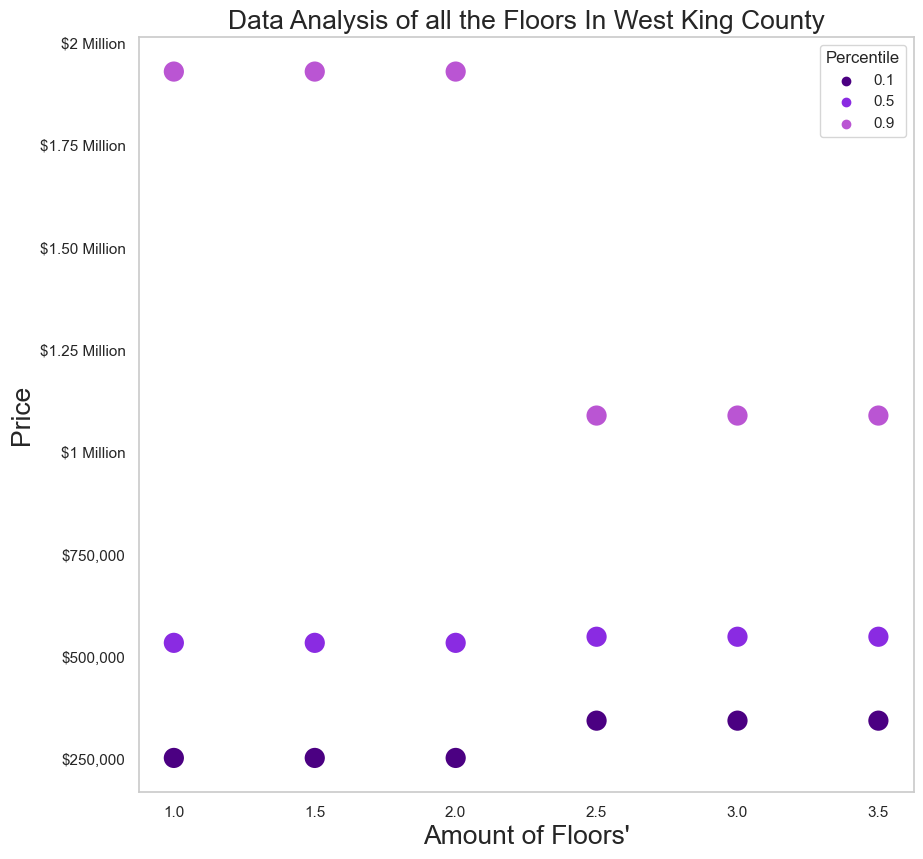

In [490]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Floors",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Floors In West King County',size=19)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',
                    '$1.25 Million','$1.50 Million','$1.75 Million','$2 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Floors'")
plt.gcf().set_size_inches((10,10))

<ipython-input-491-c458cf74f881>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',


[Text(0, 0.0, '0'),
 Text(0, 250000.0, '$250,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 750000.0, '$750,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1250000.0, '$1.25 Million'),
 Text(0, 1500000.0, '$1.50 Million'),
 Text(0, 1750000.0, '$1.75 Million'),
 Text(0, 2000000.0, '$2 Million'),
 Text(0, 2250000.0, '')]

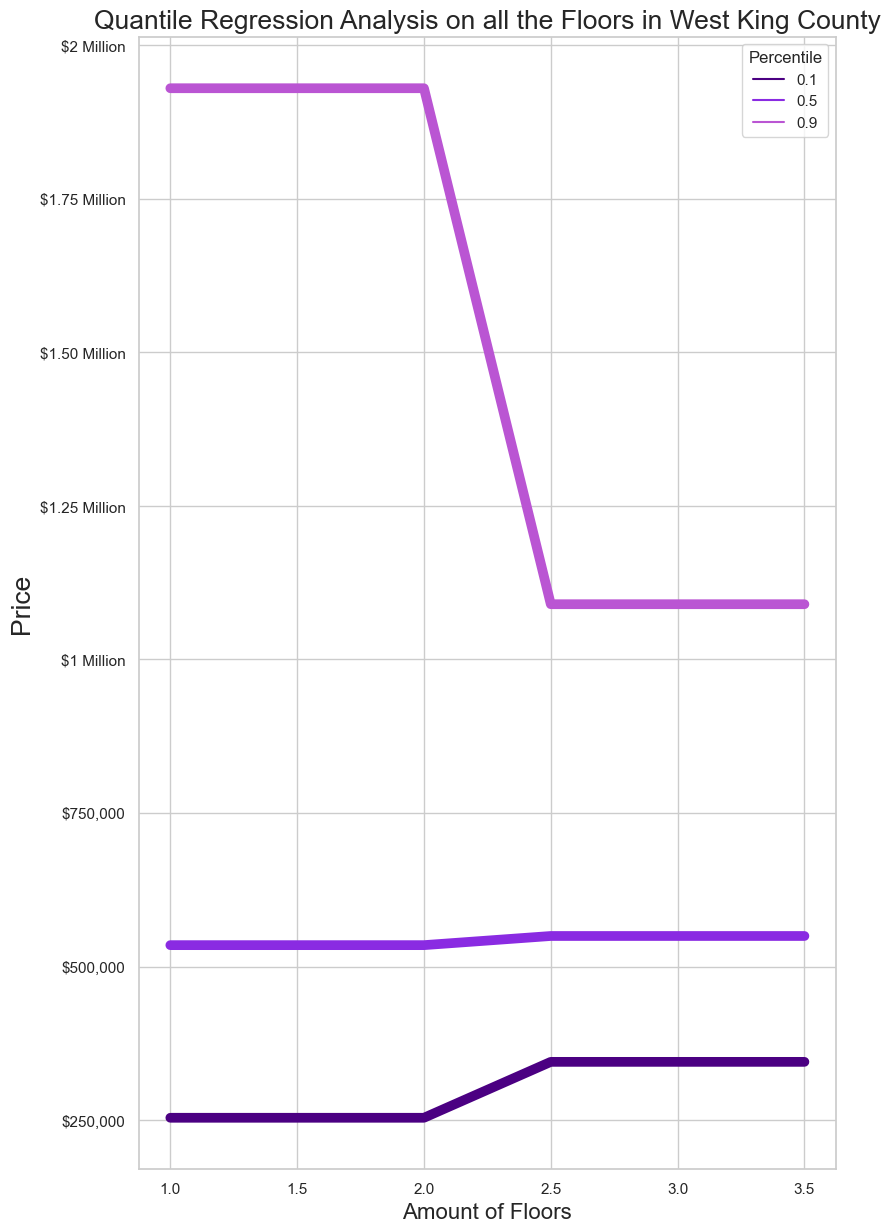

In [491]:
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Floors",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Floors in West King County',size=19)
plt.xlabel("Amount of Floors", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',
                    '$1.25 Million','$1.50 Million','$1.75 Million','$2 Million'])

In [492]:
(Quantile_regression2['Price'] > Quantile_regression2['0.1']).value_counts()

True     518
False     64
dtype: int64

In [493]:
i = 0
y= 0
x = []
while i < 518:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 518:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [494]:
(Quantile_regression2['Price'] > Quantile_regression2['0.5']).value_counts()

False    296
True     286
dtype: int64

In [495]:
i = 0
y= 0
x = []
while i < 296:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 286:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [496]:
(Quantile_regression2['Price'] > Quantile_regression2['0.9']).value_counts()

False    539
True      43
dtype: int64

In [497]:
i = 0
y= 0
x = []
while i < 539:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 43:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

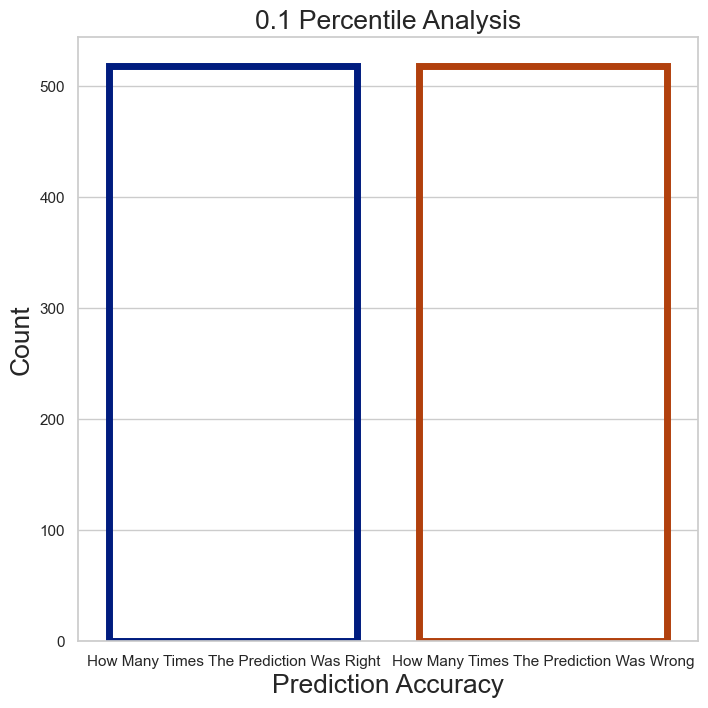

In [498]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

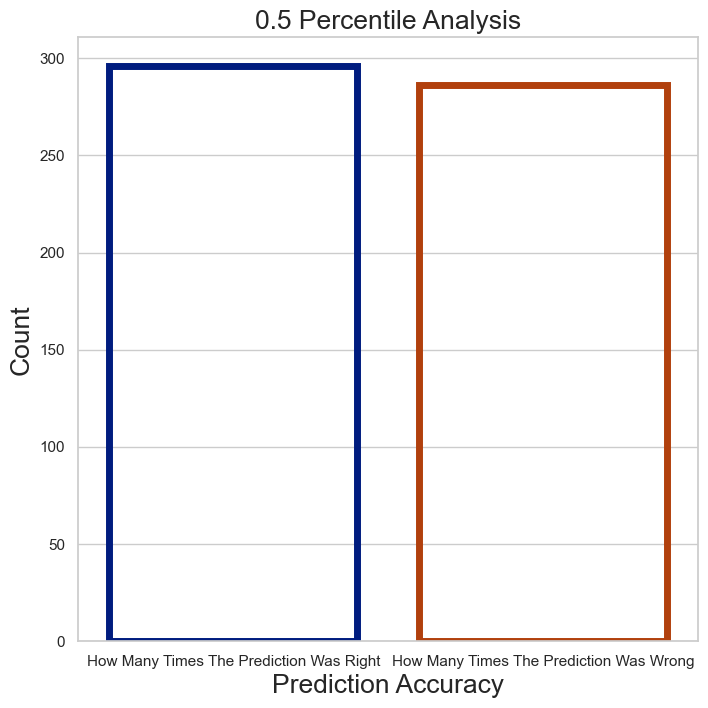

In [499]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

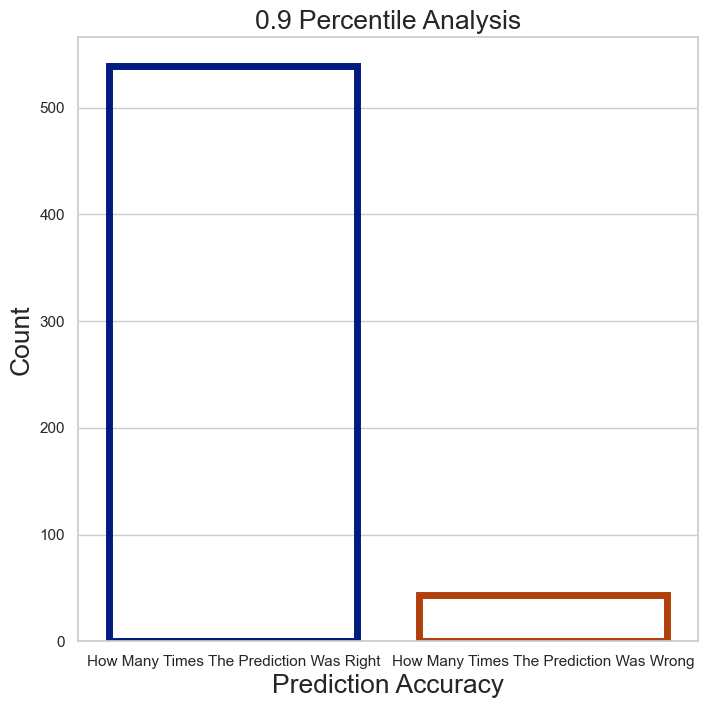

In [500]:
 sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [501]:
Predictions2 = []
for i in regressiondata3.Amount_of_Floors:
    if i == 1.0:Predictions2.append('Between: $253,969 - $1,929,972') 
    if i == 1.5:Predictions2.append('Between: $253,969 - $1,929,972') 
    if i == 2.0:Predictions2.append('Between: $253,969 - $1,929,972')
        
    if i == 2.5:Predictions2.append('Between: $344,997 - $1,089,995') 
    if i == 3.0: Predictions2.append('Between: $344,997  - $1,089,995')
    if i == 3.5: Predictions2.append('Between: $344,997  - $1,089,995')
len(Predictions2)

5816

In [502]:
price = []
for i in regressiondata3.Price:
    price.append("${:,.0f}".format(i))

In [503]:
Prediction2 = pd.DataFrame({'Amount of Floors':regressiondata3.Amount_of_Floors,
                           'Prediction':Predictions2,'Actual Price':price})
Prediction2

Amount of Floors                       Prediction Actual Price
0                  1.0   Between: $253,969 - $1,929,972     $221,900
1                  1.0   Between: $253,969 - $1,929,972     $510,000
2                  1.0   Between: $253,969 - $1,929,972     $229,500
3                  1.0   Between: $253,969 - $1,929,972     $400,000
4                  1.0   Between: $253,969 - $1,929,972     $322,500
...                ...                              ...          ...
5811               2.5   Between: $344,997 - $1,089,995     $526,000
5812               2.5   Between: $344,997 - $1,089,995     $414,000
5813               2.5   Between: $344,997 - $1,089,995     $424,950
5814               2.5   Between: $344,997 - $1,089,995     $424,950
5815               3.5  Between: $344,997  - $1,089,995   $3,300,000

[5816 rows x 3 columns]

In [504]:
def PRICE_YEARS_BUILT(YEAR_BUILT):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year_built = house_info['Year Built'].tolist()

    years_built_index = []
    for i,x in enumerate(year_built):
        if x == YEAR_BUILT:years_built_index.append(i)
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    years_built_westking = []
    for i in years_built_index:
        if locations[i] == zip_loca[0] : years_built_westking.append(i)
        elif locations[i] == zip_loca[1] : years_built_westking.append(i)
        elif locations[i] == zip_loca[2] : years_built_westking.append(i)
        elif locations[i] == zip_loca[3] : years_built_westking.append(i)
        elif locations[i] == zip_loca[4]: years_built_westking.append(i)
        elif locations[i] == zip_loca[5] : years_built_westking.append(i)
        elif locations[i] == zip_loca[6] : years_built_westking.append(i)
        elif locations[i] == zip_loca[7]: years_built_westking.append(i)
        elif locations[i] == zip_loca[8] : years_built_westking.append(i)
        elif locations[i] == zip_loca[9] : years_built_westking.append(i)
        elif locations[i] == zip_loca[10] : years_built_westking.append(i)
        elif locations[i] == zip_loca[11] : years_built_westking.append(i)
        elif locations[i] == zip_loca[12]: years_built_westking.append(i)
        elif locations[i] == zip_loca[13] : years_built_westking.append(i)
        elif locations[i] == zip_loca[14] : years_built_westking.append(i)
        elif locations[i] == zip_loca[15] : years_built_westking.append(i)
        elif locations[i] == zip_loca[16]: years_built_westking.append(i)
        elif locations[i] == zip_loca[17] : years_built_westking.append(i)
        elif locations[i] == zip_loca[18]: years_built_westking.append(i)
        elif locations[i] == zip_loca[19] : years_built_westking.append(i)
        elif locations[i] == zip_loca[20]: years_built_westking.append(i)
        elif locations[i] == zip_loca[21] : years_built_westking.append(i)
        elif locations[i] == zip_loca[22] : years_built_westking.append(i)
        elif locations[i] == zip_loca[23] : years_built_westking.append(i)
        elif locations[i] == zip_loca[24] : years_built_westking.append(i)
        elif locations[i] == zip_loca[25] : years_built_westking.append(i)
        elif locations[i] == zip_loca[26] : years_built_westking.append(i)
        elif locations[i] == zip_loca[27] : years_built_westking.append(i)
        elif locations[i] == zip_loca[28]: years_built_westking.append(i)
        elif locations[i] == zip_loca[29] : years_built_westking.append(i)
        elif locations[i] == zip_loca[30] : years_built_westking.append(i)
        elif locations[i] == zip_loca[31]: years_built_westking.append(i)
        elif locations[i] == zip_loca[32] : years_built_westking.append(i)
        elif locations[i] == zip_loca[33] : years_built_westking.append(i)
        elif locations[i] == zip_loca[34] : years_built_westking.append(i)


    price = house_info["Price"].tolist()

    price_westking = []
    for i in years_built_westking:price_westking.append(price[i])
    return(price_westking)

no_of_Year = house_info["Year Built"].value_counts().index.tolist()
price_Year_westking = []
for i in no_of_Year:
    price_Year_westking.append(PRICE_YEARS_BUILT(i))
price_Year_westking = sum(price_Year_westking, [])
len(price_Year_westking)

5816

In [505]:
def AMOUNT_YEARS_BUILT(AMOUNT_YEARS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    years_built = house_info["Year Built"].tolist()
    X_value = []
    years_index = []
    for i,x in enumerate(years_built):
        if x == AMOUNT_YEARS:years_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    for i in years_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_YEARS)
        

    return X_value
no_of_years = house_info["Year Built"].value_counts().index.tolist()
amount_years_westking = []
for i in no_of_years:
    amount_years_westking.append(AMOUNT_YEARS_BUILT(i))
amount_years_westking= sum(amount_years_westking, [])
len(amount_years_westking)

5816

In [506]:
regressiondata4 = pd.DataFrame({'Year_Built':amount_years_westking,
                                'Price':price_Year_westking})
regressiondata4

Year_Built     Price
0           2014  453246.0
1           2014  559950.0
2           2014  499950.0
3           2014  866500.0
4           2014  372977.0
...          ...       ...
5811        1934  272000.0
5812        1934  420000.0
5813        1934  230000.0
5814        1934  275000.0
5815        1934  529000.0

[5816 rows x 2 columns]

In [507]:
year = regressiondata4['Year_Built'].value_counts()
year

2014    159
2007    139
2005    138
2006    134
2004    132
       ... 
1936     10
1933      8
1932      8
1935      7
1934      7
Name: Year_Built, Length: 116, dtype: int64

In [508]:
reg1,year1 = [],[]
for i,x in enumerate(amount_years_westking):
    if x == 1900:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1901:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1902:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1903:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1904:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1905:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1906:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1907:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1908:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1909:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1910:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1911:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1912:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1913:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1914:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1915:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1916:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1917:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1918:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1919:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1920:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1921:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1922:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1923:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1924:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1925:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1926:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1927:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1928:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1929:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1930:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1931:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1932:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1933:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if i == 1934:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1935:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1936:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1937:
        reg1.append(price_Year_westking[i])
        year1.append(x)
reg1.remove(1030000.0)
year1.remove(1989) 

In [509]:
regressiondata44 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
#for i,x in enumerate(regressiondata44.Year_Built):print(i,x,regressiondata44.Price[i])
x= regressiondata44.Year_Built.value_counts()
len(x)

37

In [510]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_westking):
    if x == 1938:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1939:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1940:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1941:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1942:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1943:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1944:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1945:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1946:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1947:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1948:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1949:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1950:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1951:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1952:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1953:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1954:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1955:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1956:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1957:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1958:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1959:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1960:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1961:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1962:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1963:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1964:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1965:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1966:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1967:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1968:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1969:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1970:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1971:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if i == 1972:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1973:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1974:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1975:
        reg1.append(price_Year_westking[i])
        year1.append(x)

In [511]:
regressiondata45 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata45

Year_Built     Price
0           1968  951000.0
1           1968  320000.0
2           1968  389999.0
3           1968  269900.0
4           1968  426700.0
...          ...       ...
2173        1938  200000.0
2174        1938  210000.0
2175        1938  212500.0
2176        1938  825000.0
2177        1938  879950.0

[2178 rows x 2 columns]

In [512]:
x= regressiondata45.Year_Built.value_counts()
len(x)

37

In [513]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_westking):
    if x == 1976:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1977:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1978:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1979:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1980:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1981:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1982:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1983:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1984:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1985:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1986:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1987:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1988:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1989:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1990:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1991:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1992:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1993:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1994:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1995:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1996:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1997:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1998:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 1999:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2001:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2002:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2003:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2004:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2005:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2006:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2007:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2008:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2009:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2010:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if i == 2011:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2012:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2013:
        reg1.append(price_Year_westking[i])
        year1.append(x)
    if x == 2014:
        reg1.append(price_Year_westking[i])
        year1.append(x)
reg1.remove(245000.0)
year1.remove(1955) 

In [514]:
regressiondata46 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata46
x= regressiondata46.Year_Built.value_counts()
len(x)
#for i,x in enumerate(regressiondata46.Year_Built):print(i,x,reg1[i])

37

In [515]:
flatui2 = ['#9304FF','#9512F9','#9C23F9','#A433FA','#B25FF1','#A23FED',
          '#9843D9','#8119D1','#7E11D2','#790CCC','#7C09D3','#7508C9',
          
         '#7F26B4','#7929A9','#8743AF','#CDA7E3','#D5CADC','#E6E0E9',
         '#F0EBF3','#E6E0E9','#D5CADC','#DAC8E6','#D7BAEA','#612589',
          
          '#570C87','#5D1A88','#611194','#56197D','#5C297D','#5B3574',
          '#60337D','#562676','#6E3792','#693C86','#6B2F92','#61198F','#260340']#37

In [516]:
flatui1 = ['#5E00FB','#701DFB','#823BF8','#5E0FE1','#5404DB','#9356F8',
          '#631BDB','#622ABE','#531BB1','#4C09BC','#5318B5','#450CA5','#6A33C5',
          
          '#60299F','#511297','#9B75DA','#CDBFE6','#D5C7EE','#E6DFF2',
          '#F0EEF3','#E6DFF2','#D5C7EE','#CDBFE6','#573392','#5122A0',
          
          '#5513A0','#582294','#48098F','#41276B','#391A6D','#340E74',
          '#54159B','#31185A','#32106A','#32067B','#300E68','#2B056C']#37

In [517]:
flatui3 = ['#DB00FF','#D913F9','#DD28FB','#E13CFD','#E15FF7','#D665E9',
          '#BC45D0','#AC2EC1','#A91AC0','#AA0DC4','#A407BE','#A117B7',
          
         '#8629A0', '#9122B0','#8E3B9B','#CDB3D2','#D5BED8','#E6DEE7',
          '#F0E9F1','#E6DEE7','#D5BED8','#CDB3D2','#C189CA','#701080',
          
          '#8B3D97','#850D99','#7A1F89','#771088','#711E7F','#7C0A8F','#6B0E7B',
          '#6D0B93','#5B2A64','#4F2056','#4E1657','#450C4F','#470152',]#37

<ipython-input-518-1e12734c6257>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million','$3 Million'])
<ipython-input-518-1e12734c6257>:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)
<ipython-input-518-1e12734c6257>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million','$6 Million','$7 Million'])
<ipython-input-518-1e12734c6257>:36: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)
<ipython-input-518-1e12734c6257>:53: UserWarn

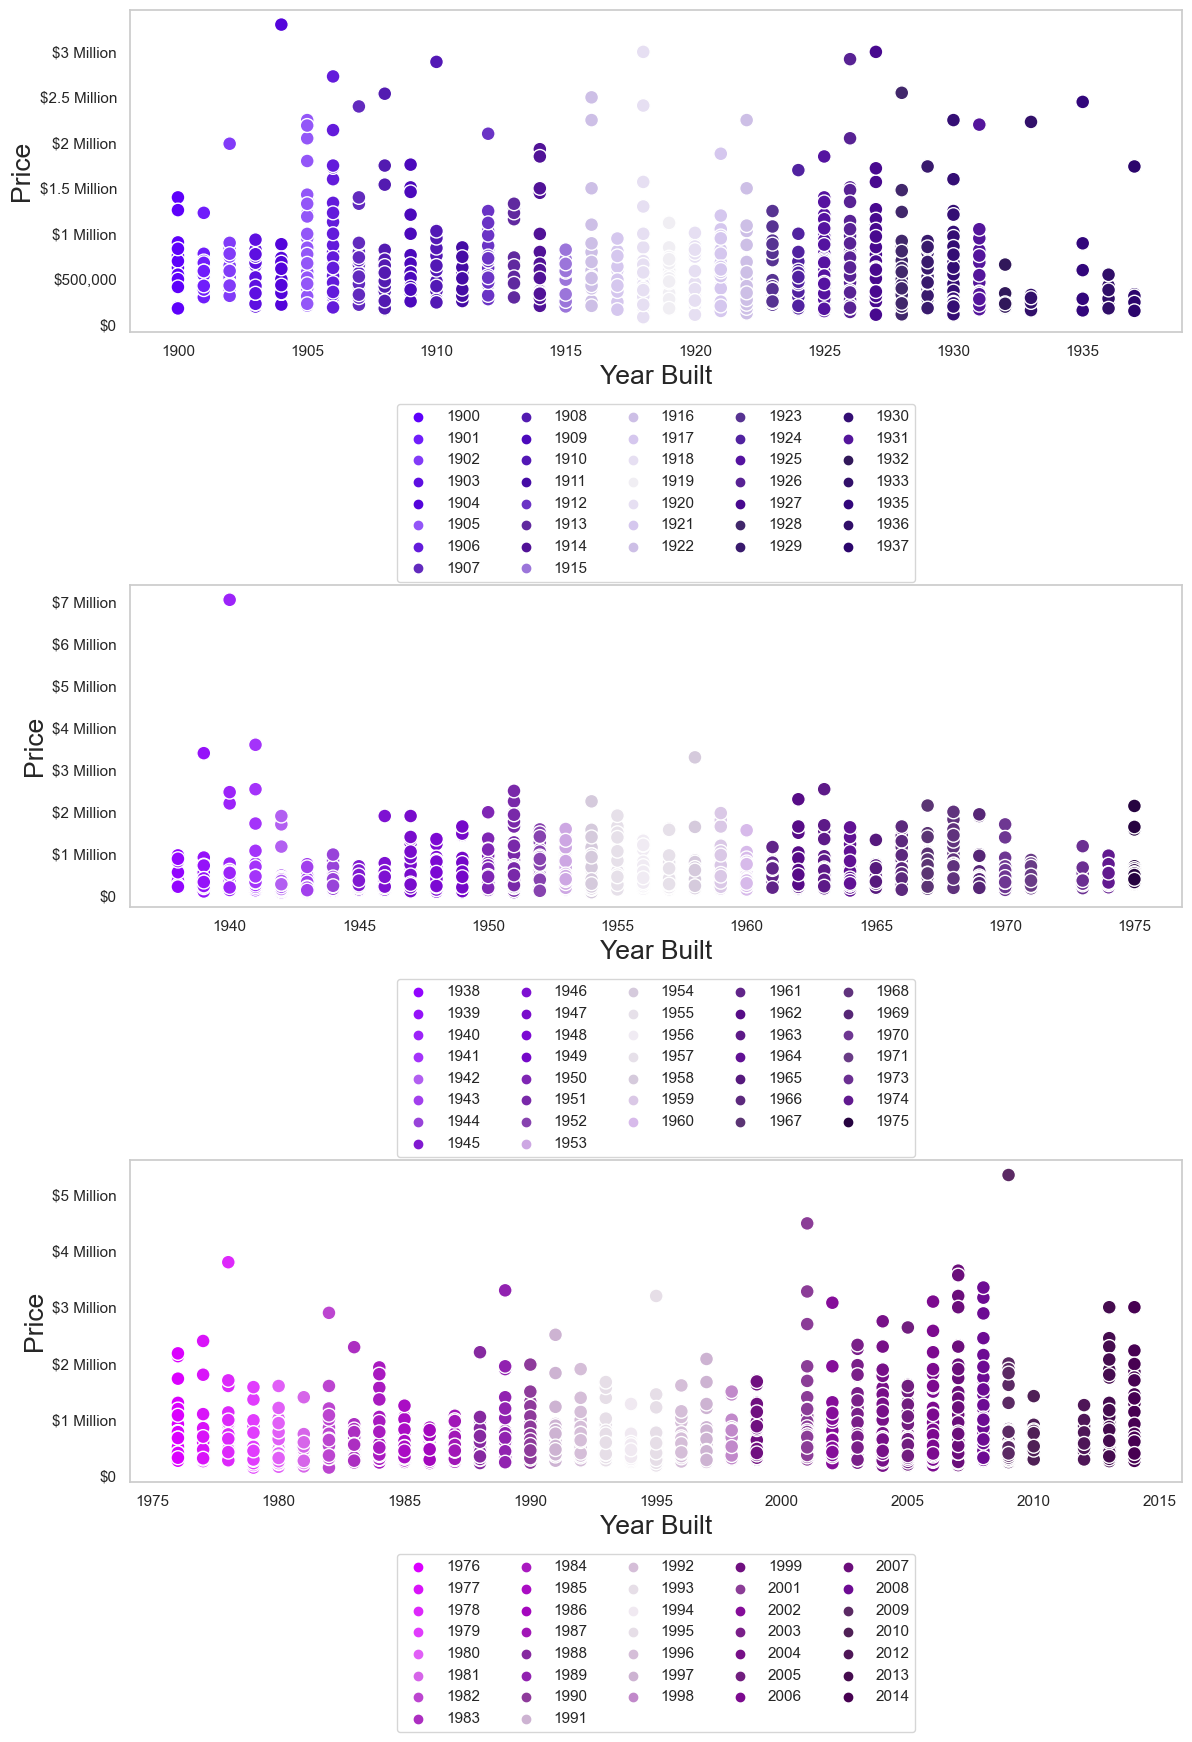

In [518]:
plt.subplot(3,1,1) #35 years in tottal
x = regressiondata44['Year_Built']
y = regressiondata44['Price']
data=regressiondata44
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata44, x=x, y=y,s=100, linewidth = 1, hue='Year_Built',
                    palette=flatui1)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In North King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million','$3 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks()

plt.subplot(3,1,2)
x = regressiondata45['Year_Built']
y = regressiondata45['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata45, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui2)
plt.grid(linestyle='-', linewidth=0.2)

plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million','$6 Million','$7 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks(1930,1995)
#plt.xticks(np.arange(1930,1995)) 

plt.subplot(3,1,3)
sns.set(style="whitegrid")
x = regressiondata46['Year_Built']
y = regressiondata46['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata46, x=x, y=y,s=100, linewidth = 1, hue='Year_Built',
                    palette=flatui3)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
#plt.tight_layout(1)
plt.show()


In [519]:
train_df, test_df = train_test_split(regressiondata4, test_size=0.90, shuffle=False)

In [520]:
X_train, y_train = train_df[['Year_Built']], train_df[['Price']]
X_test, y_test = test_df[['Year_Built']], test_df[['Price']]

In [521]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [522]:
Quantile_regression3 = pd.DataFrame({'Year_Built': X_test.reset_index()['Year_Built'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [523]:
Quantile_regression3[500:]

Year_Built           0.1            0.5           0.9      Price
500         2008  351199.89302  530000.044889  1.117997e+06   720000.0
501         2008  351199.89302  530000.044889  1.117997e+06  1450000.0
502         2008  351199.89302  530000.044889  1.117997e+06   780000.0
503         2008  351199.89302  530000.044889  1.117997e+06   465000.0
504         2008  351199.89302  530000.044889  1.117997e+06  1260000.0
...          ...           ...            ...           ...        ...
5230        1934  340000.18593  499000.868292  9.750004e+05   272000.0
5231        1934  340000.18593  499000.868292  9.750004e+05   420000.0
5232        1934  340000.18593  499000.868292  9.750004e+05   230000.0
5233        1934  340000.18593  499000.868292  9.750004e+05   275000.0
5234        1934  340000.18593  499000.868292  9.750004e+05   529000.0

[4735 rows x 5 columns]

In [524]:
melted_data = pd.melt(Quantile_regression3, id_vars=['Year_Built'])
melted_data = melted_data.dropna()
#melted_data = melted_data.drop(range(1746,2328))#0.1
melted_data = melted_data.drop(range(15705,20940))#0.9
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

Year_Built Percentile         value
0            2003        0.1  340000.18593
1            2003        0.1  340000.18593
2            2003        0.1  340000.18593
3            2003        0.1  340000.18593
4            2003        0.1  340000.18593
...           ...        ...           ...
15700        1934        0.9  975000.43512
15701        1934        0.9  975000.43512
15702        1934        0.9  975000.43512
15703        1934        0.9  975000.43512
15704        1934        0.9  975000.43512

[15705 rows x 3 columns]

In [525]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1900,1901,1902,1903,1904,1905,1906,1907,1908,
                                                         1909,
                                                        1910,1911,1912,1913,1914,1915,1916,1917,1918,
                                                        1919,
                                                        1920,1921,1922,1923,1924,1925,1926,1927,1928,
                                                         1929,
                                                        1930,1931,1932,1933,1934,1935,1935,1936,1937],
'0.1':[340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593],
'0.5':[499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292], 
'0.9':[975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512 ]})
Quantileregression_updated

Year_Built           0.1            0.5           0.9
0         1900  340000.18593  499000.868292  975000.43512
1         1901  340000.18593  499000.868292  975000.43512
2         1902  340000.18593  499000.868292  975000.43512
3         1903  340000.18593  499000.868292  975000.43512
4         1904  340000.18593  499000.868292  975000.43512
5         1905  340000.18593  499000.868292  975000.43512
6         1906  340000.18593  499000.868292  975000.43512
7         1907  340000.18593  499000.868292  975000.43512
8         1908  340000.18593  499000.868292  975000.43512
9         1909  340000.18593  499000.868292  975000.43512
10        1910  340000.18593  499000.868292  975000.43512
11        1911  340000.18593  499000.868292  975000.43512
12        1912  340000.18593  499000.868292  975000.43512
13        1913  340000.18593  499000.868292  975000.43512
14        1914  340000.18593  499000.868292  975000.43512
15        1915  340000.18593  499000.868292  975000.43512
16        1916  340000.18593  499000.868292  975000.43512
17        1917  340000.18593  499000.868292  975000.43512
18        1918  340000.18593  499000.868292  975000.43512
19        1919  340000.18593  499000.868292  975000.43512
20        1920  340000.18593  499000.868292  975000.43512
21        1921  340000.18593  499000.868292  975000.43512
22        1922  340000.18593  499000.868292  975000.43512
23        1923  340000.18593  499000.868292  975000.43512
24        1924  340000.18593  499000.868292  975000.43512
25        1925  340000.18593  499000.868292  975000.43512
26        1926  340000.18593  499000.868292  975000.43512
27        1927  340000.18593  499000.868292  975000.43512
28        1928  340000.18593  499000.868292  975000.43512
29        1929  340000.18593  499000.868292  975000.43512
30        1930  340000.18593  499000.868292  975000.43512
31        1931  340000.18593  499000.868292  975000.43512
32        1932  340000.18593  499000.868292  975000.43512
33        1933  340000.18593  499000.868292  975000.43512
34        1934  340000.18593  499000.868292  975000.43512
35        1935  340000.18593  499000.868292  975000.43512
36        1935  340000.18593  499000.868292  975000.43512
37        1936  340000.18593  499000.868292  975000.43512
38        1937  340000.18593  499000.868292  975000.43512

In [526]:
melted_data1 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data1 = melted_data1.rename(columns={'variable': 'Percentile'})
melted_data1

Year_Built Percentile         value
0          1900        0.1  340000.18593
1          1901        0.1  340000.18593
2          1902        0.1  340000.18593
3          1903        0.1  340000.18593
4          1904        0.1  340000.18593
..          ...        ...           ...
112        1934        0.9  975000.43512
113        1935        0.9  975000.43512
114        1935        0.9  975000.43512
115        1936        0.9  975000.43512
116        1937        0.9  975000.43512

[117 rows x 3 columns]

In [527]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1938,1939,1940,1941,1942,1943,1944,1945,
                                                        1946,1947,1948,1949,1950,1951,1952,1953,
                                                        1954,1955,1956,1957,1958,1959,1960,1961,
                                                        1962,1963,1964,1965,1966,1967,1968,1969,
                                                        1970,1971,1972,1973,1974,1975],
'0.1':[340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593],
'0.5':[499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292], 
'0.9':[975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512]})
Quantileregression_updated

Year_Built           0.1            0.5           0.9
0         1938  340000.18593  499000.868292  975000.43512
1         1939  340000.18593  499000.868292  975000.43512
2         1940  340000.18593  499000.868292  975000.43512
3         1941  340000.18593  499000.868292  975000.43512
4         1942  340000.18593  499000.868292  975000.43512
5         1943  340000.18593  499000.868292  975000.43512
6         1944  340000.18593  499000.868292  975000.43512
7         1945  340000.18593  499000.868292  975000.43512
8         1946  340000.18593  499000.868292  975000.43512
9         1947  340000.18593  499000.868292  975000.43512
10        1948  340000.18593  499000.868292  975000.43512
11        1949  340000.18593  499000.868292  975000.43512
12        1950  340000.18593  499000.868292  975000.43512
13        1951  340000.18593  499000.868292  975000.43512
14        1952  340000.18593  499000.868292  975000.43512
15        1953  340000.18593  499000.868292  975000.43512
16        1954  340000.18593  499000.868292  975000.43512
17        1955  340000.18593  499000.868292  975000.43512
18        1956  340000.18593  499000.868292  975000.43512
19        1957  340000.18593  499000.868292  975000.43512
20        1958  340000.18593  499000.868292  975000.43512
21        1959  340000.18593  499000.868292  975000.43512
22        1960  340000.18593  499000.868292  975000.43512
23        1961  340000.18593  499000.868292  975000.43512
24        1962  340000.18593  499000.868292  975000.43512
25        1963  340000.18593  499000.868292  975000.43512
26        1964  340000.18593  499000.868292  975000.43512
27        1965  340000.18593  499000.868292  975000.43512
28        1966  340000.18593  499000.868292  975000.43512
29        1967  340000.18593  499000.868292  975000.43512
30        1968  340000.18593  499000.868292  975000.43512
31        1969  340000.18593  499000.868292  975000.43512
32        1970  340000.18593  499000.868292  975000.43512
33        1971  340000.18593  499000.868292  975000.43512
34        1972  340000.18593  499000.868292  975000.43512
35        1973  340000.18593  499000.868292  975000.43512
36        1974  340000.18593  499000.868292  975000.43512
37        1975  340000.18593  499000.868292  975000.43512

In [528]:
melted_data2 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data2 = melted_data2.rename(columns={'variable': 'Percentile'})
melted_data2

Year_Built Percentile         value
0          1938        0.1  340000.18593
1          1939        0.1  340000.18593
2          1940        0.1  340000.18593
3          1941        0.1  340000.18593
4          1942        0.1  340000.18593
..          ...        ...           ...
109        1971        0.9  975000.43512
110        1972        0.9  975000.43512
111        1973        0.9  975000.43512
112        1974        0.9  975000.43512
113        1975        0.9  975000.43512

[114 rows x 3 columns]

In [529]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1976,1977,1978,1979,1980,1981,1982,1983,
                                                         1984,1985,1986,1987,1988,1989,1990,1991,
                                                         1992,1993,1994,1995,1996,1997,1998,1999,
                                                         2000,2001,2002,2003,2004,
                                                         
                                                         2005,2006,2007,
                                                         2008,2009,2010,2011,2012,2013,2014,2015],
                                           
'0.1':[340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
       340000.18593,340000.18593,340000.18593,340000.18593,340000.18593,
                                           
      351199.89302,351199.89302,351199.89302,351199.89302,351199.89302,351199.89302,
      351199.89302,351199.89302,351199.89302,351199.89302,351199.89302],
                                           
'0.5':[499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      499000.868292,499000.868292,499000.868292,499000.868292,499000.868292,
      
      530000.044889,530000.044889,530000.044889,530000.044889,530000.044889,530000.044889,
       530000.044889,530000.044889,530000.044889,530000.044889,530000.044889],

'0.9':[975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      975000.43512,975000.43512,975000.43512,975000.43512,975000.43512,
      
      1.117997e+06,1.117997e+06,1.117997e+06,1.117997e+06,1.117997e+06,1.117997e+06,
      1.117997e+06,1.117997e+06,1.117997e+06,1.117997e+06,1.117997e+06]})
Quantileregression_updated

Year_Built           0.1            0.5           0.9
0         1976  340000.18593  499000.868292  9.750004e+05
1         1977  340000.18593  499000.868292  9.750004e+05
2         1978  340000.18593  499000.868292  9.750004e+05
3         1979  340000.18593  499000.868292  9.750004e+05
4         1980  340000.18593  499000.868292  9.750004e+05
5         1981  340000.18593  499000.868292  9.750004e+05
6         1982  340000.18593  499000.868292  9.750004e+05
7         1983  340000.18593  499000.868292  9.750004e+05
8         1984  340000.18593  499000.868292  9.750004e+05
9         1985  340000.18593  499000.868292  9.750004e+05
10        1986  340000.18593  499000.868292  9.750004e+05
11        1987  340000.18593  499000.868292  9.750004e+05
12        1988  340000.18593  499000.868292  9.750004e+05
13        1989  340000.18593  499000.868292  9.750004e+05
14        1990  340000.18593  499000.868292  9.750004e+05
15        1991  340000.18593  499000.868292  9.750004e+05
16        1992  340000.18593  499000.868292  9.750004e+05
17        1993  340000.18593  499000.868292  9.750004e+05
18        1994  340000.18593  499000.868292  9.750004e+05
19        1995  340000.18593  499000.868292  9.750004e+05
20        1996  340000.18593  499000.868292  9.750004e+05
21        1997  340000.18593  499000.868292  9.750004e+05
22        1998  340000.18593  499000.868292  9.750004e+05
23        1999  340000.18593  499000.868292  9.750004e+05
24        2000  340000.18593  499000.868292  9.750004e+05
25        2001  340000.18593  499000.868292  9.750004e+05
26        2002  340000.18593  499000.868292  9.750004e+05
27        2003  340000.18593  499000.868292  9.750004e+05
28        2004  340000.18593  499000.868292  9.750004e+05
29        2005  351199.89302  530000.044889  1.117997e+06
30        2006  351199.89302  530000.044889  1.117997e+06
31        2007  351199.89302  530000.044889  1.117997e+06
32        2008  351199.89302  530000.044889  1.117997e+06
33        2009  351199.89302  530000.044889  1.117997e+06
34        2010  351199.89302  530000.044889  1.117997e+06
35        2011  351199.89302  530000.044889  1.117997e+06
36        2012  351199.89302  530000.044889  1.117997e+06
37        2013  351199.89302  530000.044889  1.117997e+06
38        2014  351199.89302  530000.044889  1.117997e+06
39        2015  351199.89302  530000.044889  1.117997e+06

In [530]:
melted_data3 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data3 = melted_data3.rename(columns={'variable': 'Percentile'})
melted_data3

Year_Built Percentile         value
0          1976        0.1  3.400002e+05
1          1977        0.1  3.400002e+05
2          1978        0.1  3.400002e+05
3          1979        0.1  3.400002e+05
4          1980        0.1  3.400002e+05
..          ...        ...           ...
115        2011        0.9  1.117997e+06
116        2012        0.9  1.117997e+06
117        2013        0.9  1.117997e+06
118        2014        0.9  1.117997e+06
119        2015        0.9  1.117997e+06

[120 rows x 3 columns]

<ipython-input-531-99296a600f4c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
<ipython-input-531-99296a600f4c>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
<ipython-input-531-99296a600f4c>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000',


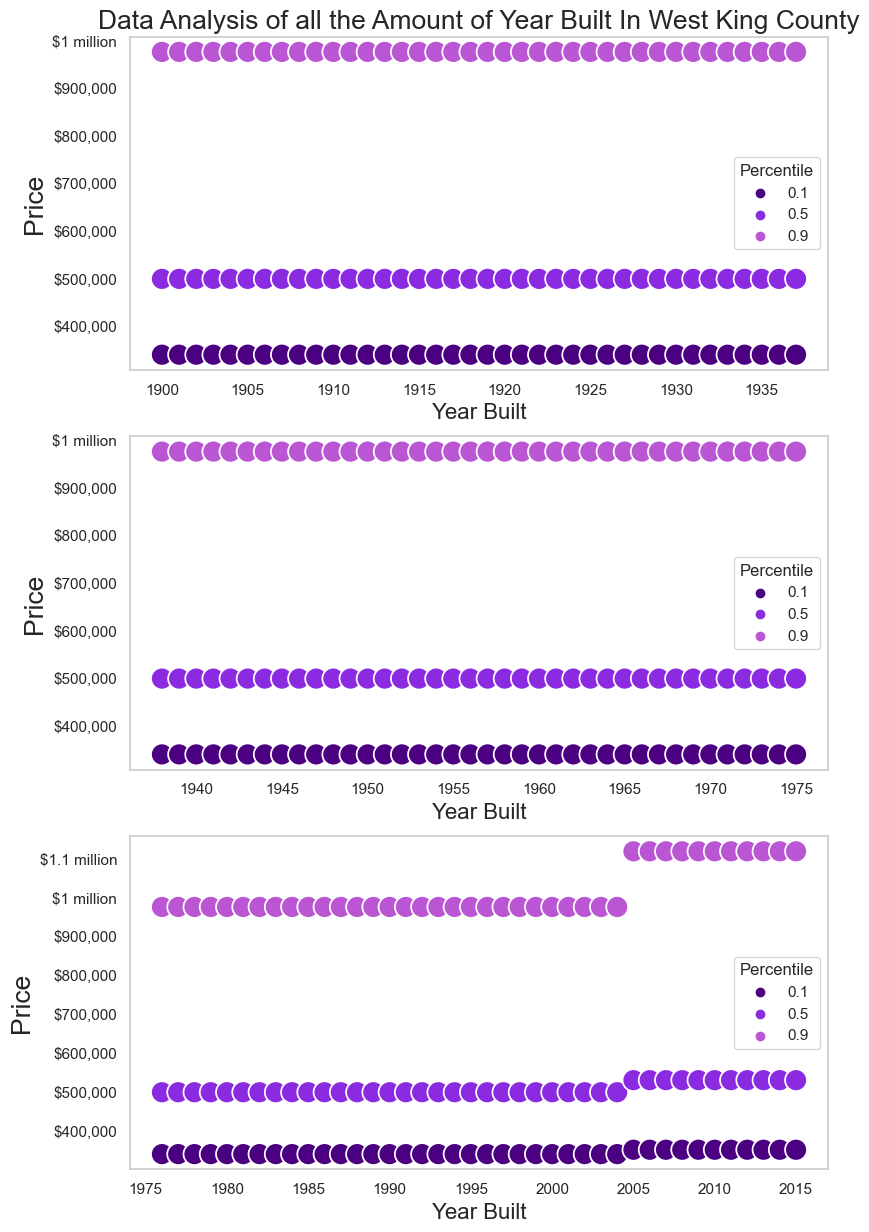

In [531]:
plt.subplot(3,1,1)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data1, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Amount of Year Built In West King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000', 
                    '$700,000','$800,000', '$900,000','$1 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)


plt.subplot(3,1,2)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data2, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('Data Analysis of all the Amount of Year Built In South King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
                    '$700,000','$800,000', '$900,000','$1 million'])
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)


plt.subplot(3,1,3)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data3, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('Data Analysis of all the Amount of Year Built In South King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
                    '$700,000','$800,000', '$900,000','$1 million','$1.1 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)

<ipython-input-532-371bab5c474f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
<ipython-input-532-371bab5c474f>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
<ipython-input-532-371bab5c474f>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000',


[Text(0, 300000.0, '0'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '$1 million'),
 Text(0, 1100000.0, '$1.1 million'),
 Text(0, 1200000.0, '')]

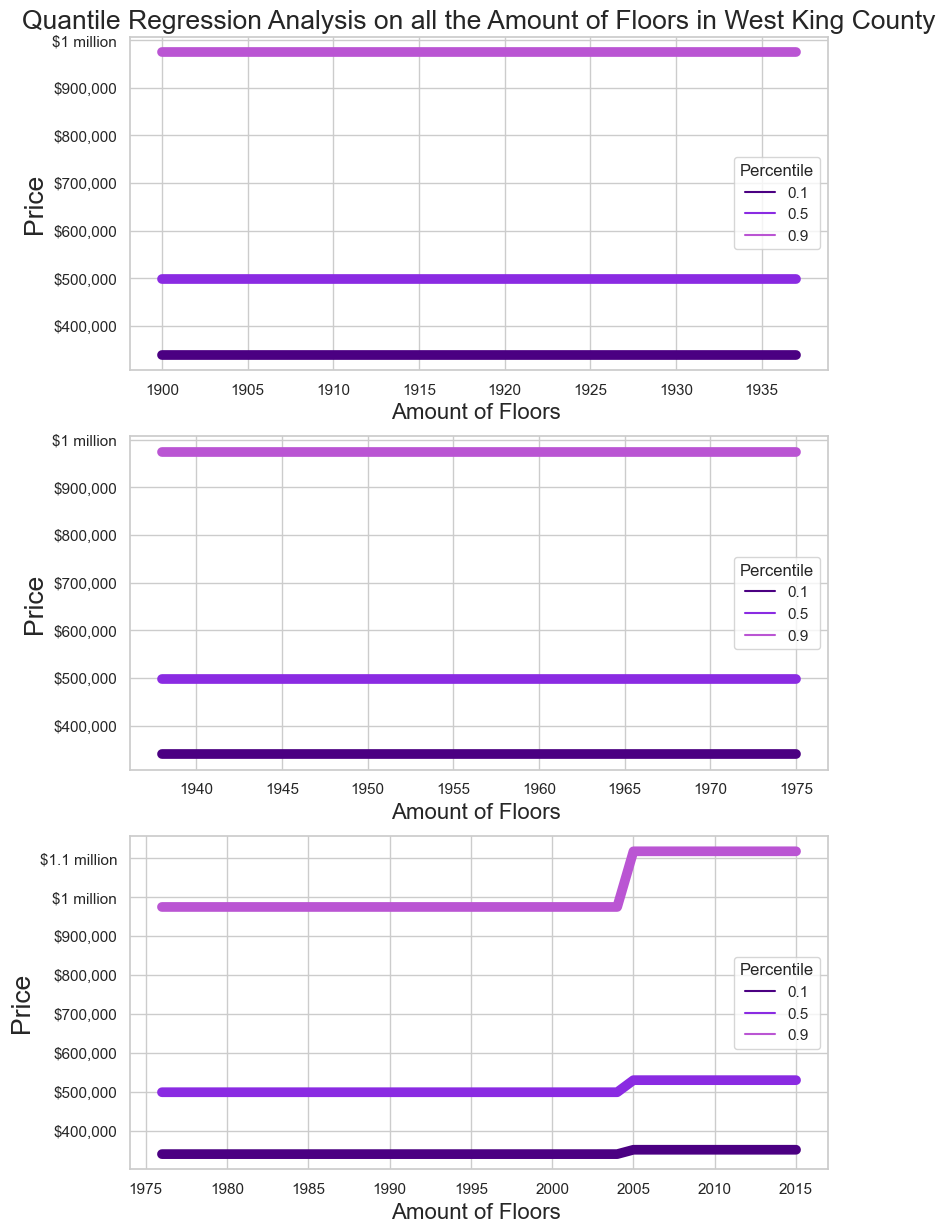

In [532]:
plt.subplot(3,1,1)
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data1, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15) 
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Amount of Floors in West King County',size=19)
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000', 
                    '$700,000','$800,000', '$900,000','$1 million'])


plt.subplot(3,1,2)
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot(  data=melted_data2, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)  
plt.legend(title='Percentile')
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
                    '$700,000','$800,000', '$900,000','$1 million'])



plt.subplot(3,1,3)
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data3, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
                    '$700,000','$800,000', '$900,000','$1 million','$1.1 million'])

In [533]:
(Quantile_regression3['Price'] > Quantile_regression3['0.1']).value_counts()

True     3536
False    1699
dtype: int64

In [534]:
i = 0
y= 0
x = []
while i < 3536:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1699:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [535]:
(Quantile_regression3['Price'] > Quantile_regression3['0.5']).value_counts()

False    3152
True     2083
dtype: int64

In [536]:
i = 0
y= 0
x = []
while i < 3152:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 2083:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [537]:
(Quantile_regression3['Price'] > Quantile_regression3['0.9']).value_counts()

False    4784
True      451
dtype: int64

In [538]:
i = 0
y= 0
x = []
while i < 4784:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 451:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

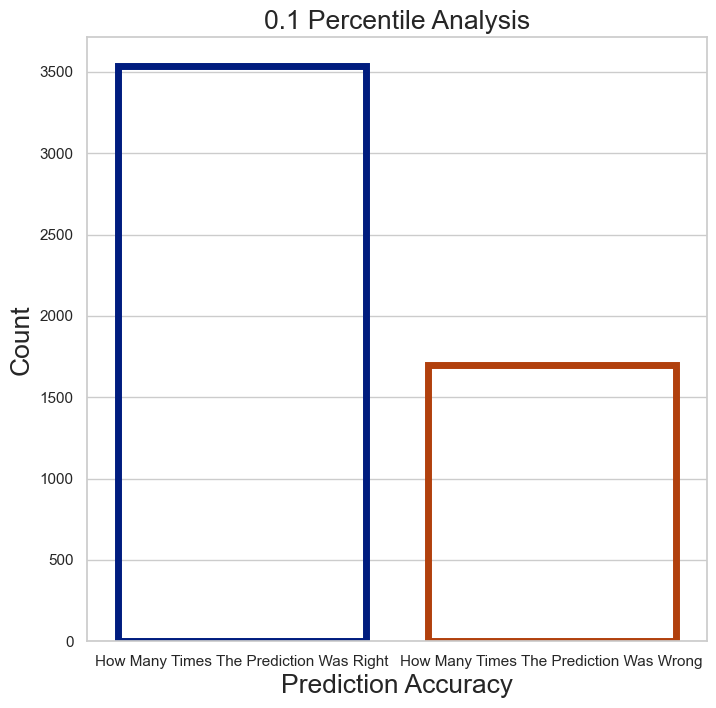

In [539]:
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

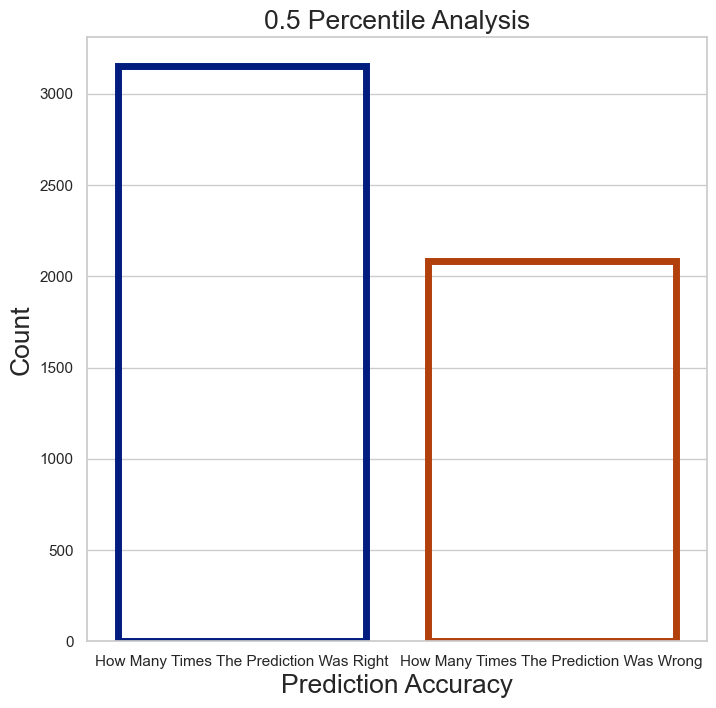

In [540]:
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

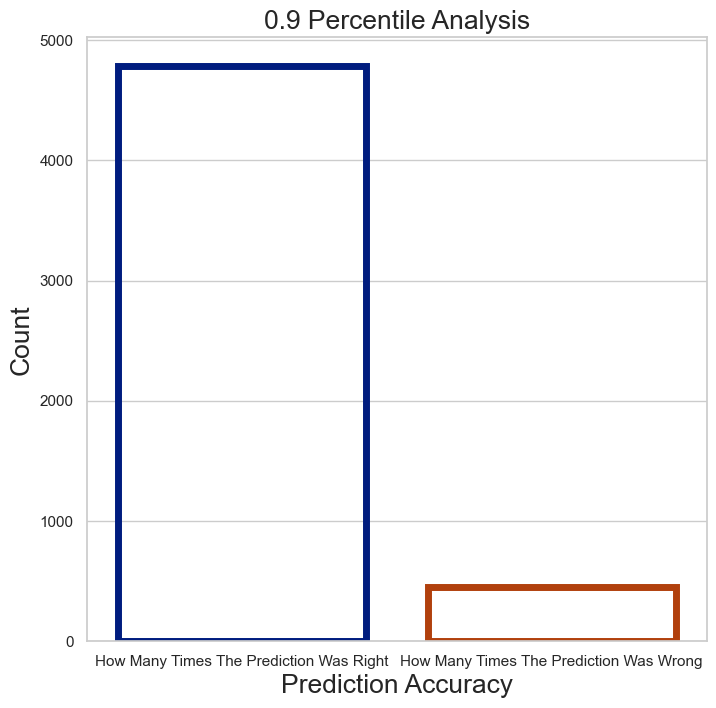

In [541]:
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [542]:
Predictions3 = []
for i in regressiondata4.Year_Built:
    if i == 1900:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1901:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1902:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1903:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1904:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1905:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1906:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1907:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1908:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1909:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1910:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1911:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1912:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1913:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1914:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1915:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1916:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1917:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1918:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1919:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1920:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1921:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1922:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1923:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1924:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1925:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1926:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1927:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1928:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1929:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1930:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1931:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1932:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1933:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1934:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1935:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1936:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1937:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1938:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1939:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1940:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1941:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1942:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1943:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1944:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1945:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1946:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1947:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1948:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1949:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1950:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1951:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1952:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1953:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1954:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1955:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1956:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1957:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1958:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1959:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1960:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1961:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1962:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1963:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1964:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1965:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1966:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1967:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1968:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1969:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1970:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1971:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1972:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1973:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1974:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1975:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1976:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1977:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1978:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1979:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1980:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1981:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1982:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1983:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1984:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1985:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1986:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1987:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1988:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1989:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1990:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1991:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1992:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1993:Predictions3.append('Between: $340,000 - $975,000')
    if i == 1994:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1995:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1996:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1997:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1998:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 1999:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 2000:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 2001:Predictions3.append('Between: $340,000 - $975,000')
    if i == 2002:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 2003:Predictions3.append('Between: $340,000 - $975,000') 
    if i == 2004:Predictions3.append('Between: $340,000 - $975,000')
    if i == 2005:Predictions3.append('Between: $351,199- $1,117,997')
    if i == 2006:Predictions3.append('Between: $351,199- $1,117,997') 
    if i == 2007:Predictions3.append('Between: $351,199- $1,117,997')
    if i == 2008:Predictions3.append('Between: $351,199- $1,117,997') 
    if i == 2009:Predictions3.append('Between: $351,199- $1,117,997') 
    if i == 2010:Predictions3.append('Between: $351,199- $1,117,997') 
    if i == 2011:Predictions3.append('Between: $351,199- $1,117,997')
    if i == 2012:Predictions3.append('Between: $351,199- $1,117,997') 
    if i == 2013:Predictions3.append('Between: $351,199- $1,117,997') 
    if i == 2014:Predictions3.append('Between: $351,199- $1,117,997') 
    if i == 2015:Predictions3.append('Between: $351,199- $1,117,997')
len(Predictions3)

5816

In [543]:
price = []
for i in regressiondata4.Price:
    price.append("${:,.0f}".format(i))

In [544]:
Prediction3 = pd.DataFrame({'Year Built':regressiondata4.Year_Built,
                           'Prediction':Predictions3,'Actual Price':price})
Prediction3

Year Built                     Prediction Actual Price
0           2014  Between: $351,199- $1,117,997     $453,246
1           2014  Between: $351,199- $1,117,997     $559,950
2           2014  Between: $351,199- $1,117,997     $499,950
3           2014  Between: $351,199- $1,117,997     $866,500
4           2014  Between: $351,199- $1,117,997     $372,977
...          ...                            ...          ...
5811        1934   Between: $340,000 - $975,000     $272,000
5812        1934   Between: $340,000 - $975,000     $420,000
5813        1934   Between: $340,000 - $975,000     $230,000
5814        1934   Between: $340,000 - $975,000     $275,000
5815        1934   Between: $340,000 - $975,000     $529,000

[5816 rows x 3 columns]

In [545]:
def YEAR_RENOVATED(YEAR):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year = house_info['Year Renoveted'].tolist()

    year_index = []
    for i,x in enumerate(year):
        if x == YEAR:year_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    year_westking = []
    for i in year_index:
        if locations[i] == zip_loca[0] : year_westking.append(i)
        elif locations[i] == zip_loca[1] : year_westking.append(i)
        elif locations[i] == zip_loca[2] : year_westking.append(i)
        elif locations[i] == zip_loca[3] : year_westking.append(i)
        elif locations[i] == zip_loca[4]: year_westking.append(i)
        elif locations[i] == zip_loca[5] : year_westking.append(i)
        elif locations[i] == zip_loca[6] : year_westking.append(i)
        elif locations[i] == zip_loca[7]: year_westking.append(i)
        elif locations[i] == zip_loca[8] : year_westking.append(i)
        elif locations[i] == zip_loca[9] : year_westking.append(i)
        elif locations[i] == zip_loca[10] : year_westking.append(i)
        elif locations[i] == zip_loca[11] : year_westking.append(i)
        elif locations[i] == zip_loca[12]: year_westking.append(i)
        elif locations[i] == zip_loca[13] : year_westking.append(i)
        elif locations[i] == zip_loca[14] : year_westking.append(i)
        elif locations[i] == zip_loca[15] : year_westking.append(i)
        elif locations[i] == zip_loca[16]: year_westking.append(i)
        elif locations[i] == zip_loca[17] : year_westking.append(i)
        elif locations[i] == zip_loca[18]: year_westking.append(i)
        elif locations[i] == zip_loca[19] : year_westking.append(i)
        elif locations[i] == zip_loca[20]: year_westking.append(i)
        elif locations[i] == zip_loca[21] : year_westking.append(i)
        elif locations[i] == zip_loca[22] : year_westking.append(i)
        elif locations[i] == zip_loca[23] : year_westking.append(i)
        elif locations[i] == zip_loca[24] : year_westking.append(i)
        elif locations[i] == zip_loca[25] : year_westking.append(i)
        elif locations[i] == zip_loca[26] : year_westking.append(i)
        elif locations[i] == zip_loca[27] : year_westking.append(i)
        elif locations[i] == zip_loca[28]: year_westking.append(i)
        elif locations[i] == zip_loca[29] : year_westking.append(i)
        elif locations[i] == zip_loca[30] : year_westking.append(i)
        elif locations[i] == zip_loca[31]: year_westking.append(i)
        elif locations[i] == zip_loca[32] : year_westking.append(i)
        elif locations[i] == zip_loca[33] : year_westking.append(i)
        elif locations[i] == zip_loca[34] : year_westking.append(i)

    price = house_info["Price"].tolist()

    price_westking = []
    for i in year_westking:price_westking.append(price[i])
    return(price_westking)

year_renovated = house_info["Year Renoveted"].value_counts().index.tolist()
yearrenov_Price_westking = []
for i in year_renovated:
    yearrenov_Price_westking.append(YEAR_RENOVATED(i))
yearrenov_Price_westking = sum(yearrenov_Price_westking, [])
len(yearrenov_Price_westking)

4796

In [546]:
def AMOUNT_YEAR_RENOVATED(AMOUNT_YEAR):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year_renovated = house_info["Year Renoveted"].tolist()
    X_value = []
    year_index = []
    for i,x in enumerate(year_renovated):
        if x == AMOUNT_YEAR:year_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    for i in year_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_YEAR)
        
    return X_value
year = house_info["Year Renoveted"].value_counts().index.tolist()
year_westking = []
for i in year:
    year_westking.append(AMOUNT_YEAR_RENOVATED(i))
year_westking= sum(year_westking, [])
len(year_westking)

4796

In [547]:
regressiondata5 = pd.DataFrame({'Year_Renoveted':year_westking,
                                'Price':yearrenov_Price_westking})
regressiondata5[4574:]
re5 = regressiondata5[4574:]
re5
x = re5.Year_Renoveted.value_counts()
len(x)

50

In [548]:
flatui = ['#f7ddf2','#fae4f6','#fbdcf5','#fee7f9','#ffe6fa',
          '#eecde8','#f4d7ef','#f4d0ee','#f6c9ee','#f9c0ee',
          
          '#fdc7f3','#fcc1f2','#f9c6f0','#f6d0ef','#eabee2',
          '#fda2ed','#f8a0e8','#efa9e3','#e7a0da','#fc77e4',
          
          '#f68fe4','#ef92de','#e998da','#fb5ade','#f36fdb',
          '#f057d4','#e65ccd','#db64c6','#d066bd','#fb20d3',
          
          '#f123cb','#ee2acb','#e72dc5','#f104c6','#ef10c6',
          '#e906bf','#d011ad','#d220b1','#d229b3','#bb44a5',
          
          '#99037d','#a10b85','#780c65','#660c55','#641756',
          '#5a2650','#502248','#3e0534','#520243','#400335',
         ]
len(flatui)#50

50

<ipython-input-549-ae25a411df69>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',


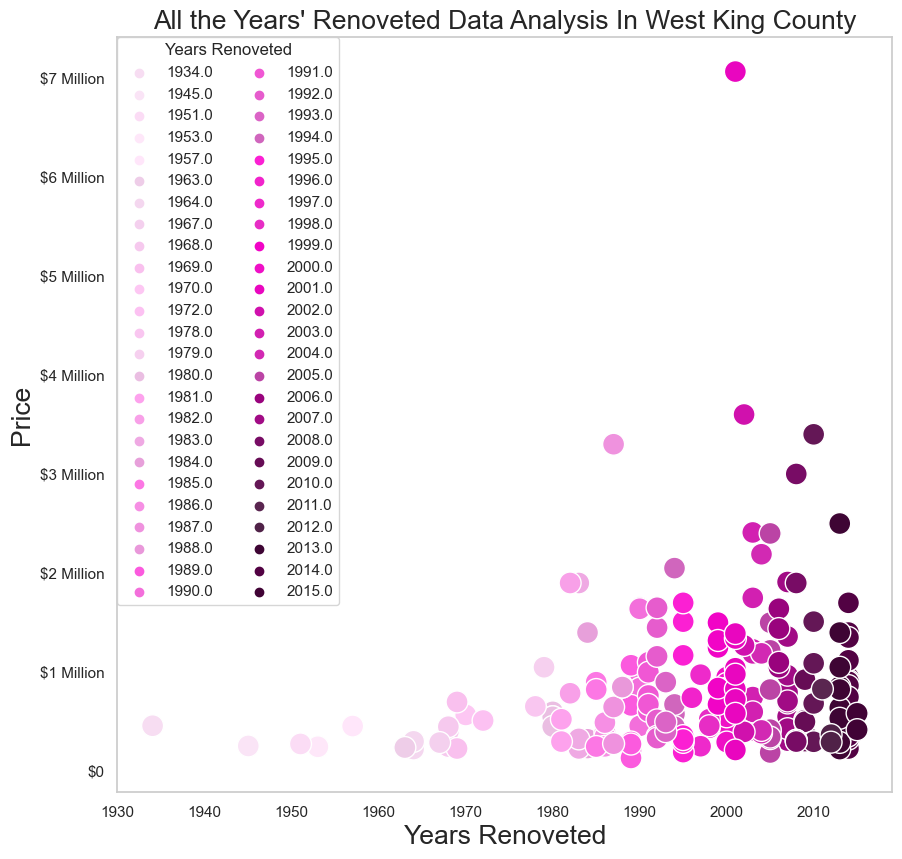

In [549]:
x = regressiondata5[4574:]['Year_Renoveted']
y = regressiondata5[4574:]['Price']
#plt.xticks(np.arange(1900,2000))
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=re5, x=x, y=y,s=250, linewidth = 1,
                    hue='Year_Renoveted',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In West King County',size=19)
plt.xlabel("Years Renoveted", size=19)
plt.legend(title='Years Renoveted')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',
                         '$5 Million','$6 Million','$7 Million'])
plt.gcf().set_size_inches((10,10))
plt.legend( loc='upper left', borderaxespad=0,title="Years Renoveted",
          frameon=True, ncol=2)
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [550]:
train_df, test_df = train_test_split(regressiondata5, test_size=0.10, shuffle=False)

In [551]:
X_train, y_train = train_df[['Year_Renoveted']], train_df[['Price']]
X_test, y_test = test_df[['Year_Renoveted']], test_df[['Price']]

In [552]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [553]:
Quantile_regression4 = pd.DataFrame({'Year_Renoveted': X_test.reset_index()['Year_Renoveted'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [554]:
Quantile_regression4 = Quantile_regression4.drop(range(0,277))
Quantile_regression4

Year_Renoveted       0.1       0.5          0.9      Price
277          2014.0  238950.0  439000.0  887549.9375   324950.0
278          2014.0  238950.0  439000.0  887549.9375   920000.0
279          2014.0  238950.0  439000.0  887549.9375  1400000.0
280          2014.0  238950.0  439000.0  887549.9375   575000.0
281          2014.0  238950.0  439000.0  887549.9375   550000.0
..              ...       ...       ...          ...        ...
475          1957.0  238950.0  439000.0  887549.9375   456700.0
476          1967.0  238950.0  439000.0  887549.9375   290000.0
477          1953.0  238950.0  439000.0  887549.9375   247500.0
478          1951.0  238950.0  439000.0  887549.9375   276000.0
479          1934.0  238950.0  439000.0  887549.9375   459950.0

[203 rows x 5 columns]

In [555]:
melted_data5 = pd.melt(Quantile_regression4, id_vars=['Year_Renoveted'])
melted_data5 = melted_data5.drop(range(609,812))
melted_data5 = melted_data5.rename(columns={'variable': 'Percentile'})
melted_data5

Year_Renoveted Percentile        value
0            2014.0        0.1  238950.0000
1            2014.0        0.1  238950.0000
2            2014.0        0.1  238950.0000
3            2014.0        0.1  238950.0000
4            2014.0        0.1  238950.0000
..              ...        ...          ...
604          1957.0        0.9  887549.9375
605          1967.0        0.9  887549.9375
606          1953.0        0.9  887549.9375
607          1951.0        0.9  887549.9375
608          1934.0        0.9  887549.9375

[609 rows x 3 columns]

<ipython-input-556-602639058687>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000'])


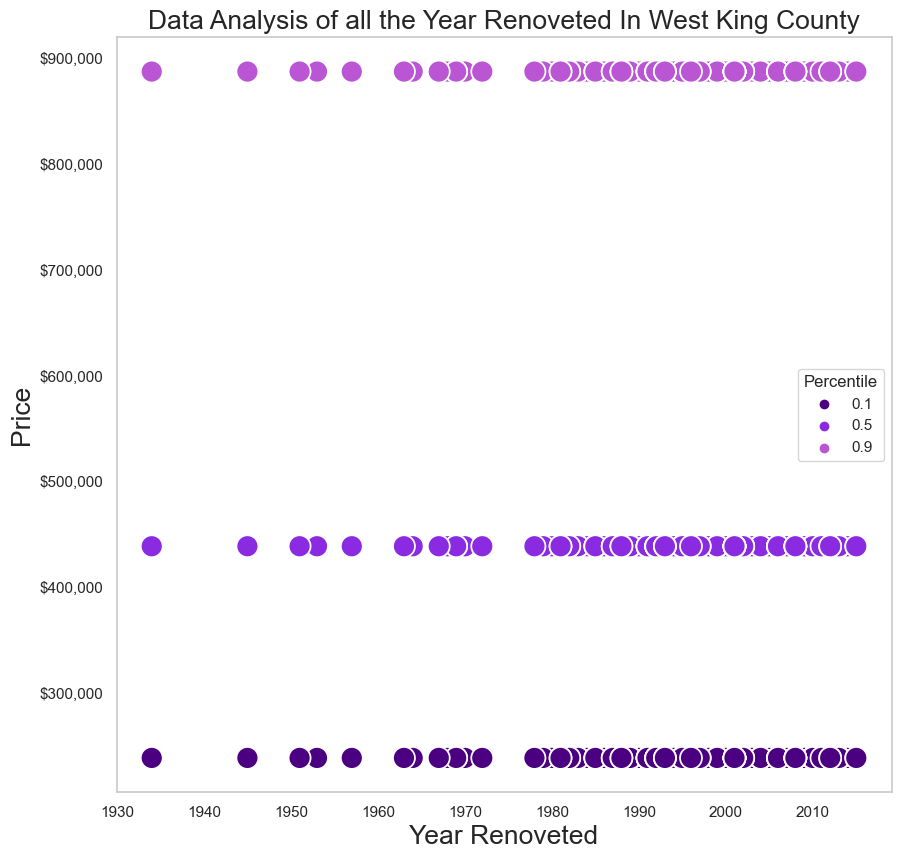

In [556]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data5, x="Year_Renoveted",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Year Renoveted In West King County',size=19)
plt.xlabel("Year Renoveted'", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Renoveted")
plt.gcf().set_size_inches((10,10))

<ipython-input-557-8e28bbab9491>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000'])


[Text(0, 200000.0, '0'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '')]

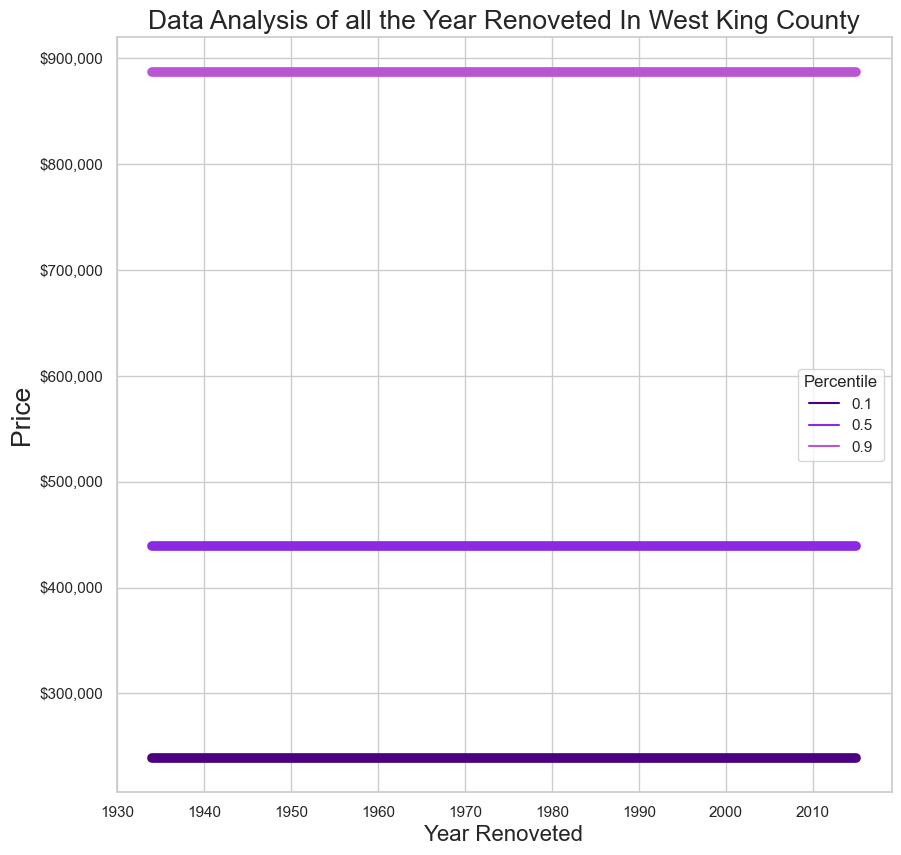

In [557]:
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data5, x="Year_Renoveted",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
ax.set_title('Data Analysis of all the Year Renoveted In West King County',size=19)
plt.legend(title='Percentile')
plt.xlabel("Year Renoveted", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000'])

In [558]:
(Quantile_regression4['Price'] > Quantile_regression4['0.1']).value_counts()

True     192
False     11
dtype: int64

In [559]:
i = 0
y= 0
x = []
while i < 192:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 11:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [560]:
(Quantile_regression4['Price'] > Quantile_regression4['0.5']).value_counts()

True     138
False     65
dtype: int64

In [561]:
i = 0
y= 0
x = []
while i < 138:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 65:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [562]:
(Quantile_regression4['Price'] > Quantile_regression4['0.9']).value_counts()

False    140
True      63
dtype: int64

In [563]:
i = 0
y= 0
x = []
while i < 140:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 63:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

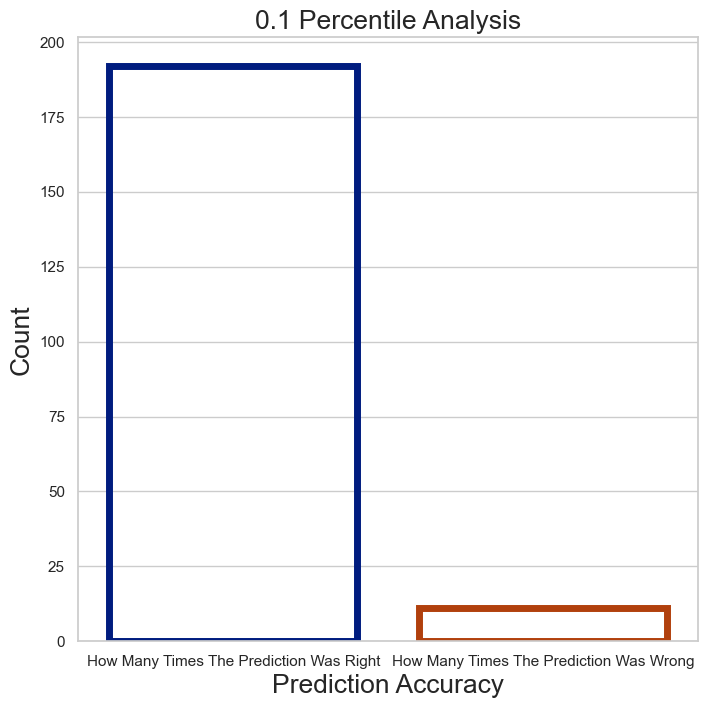

In [564]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

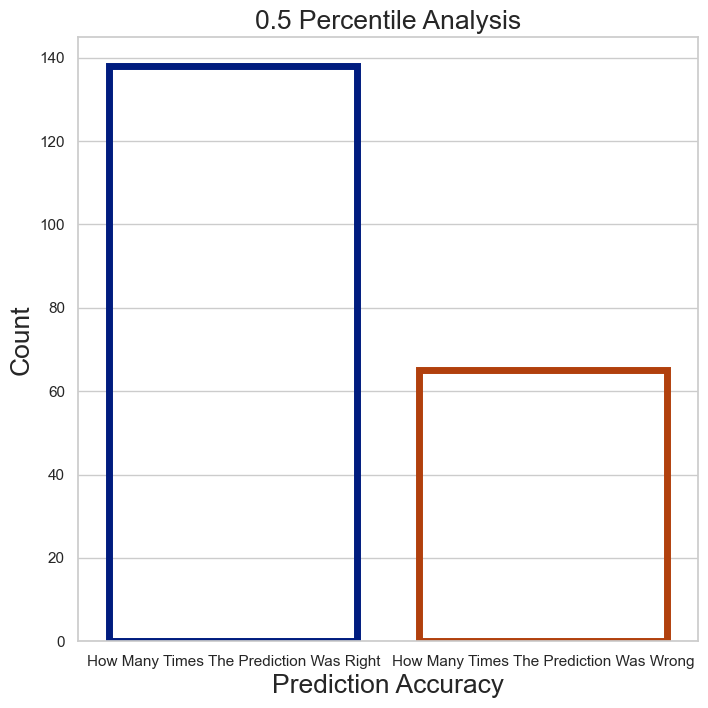

In [565]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

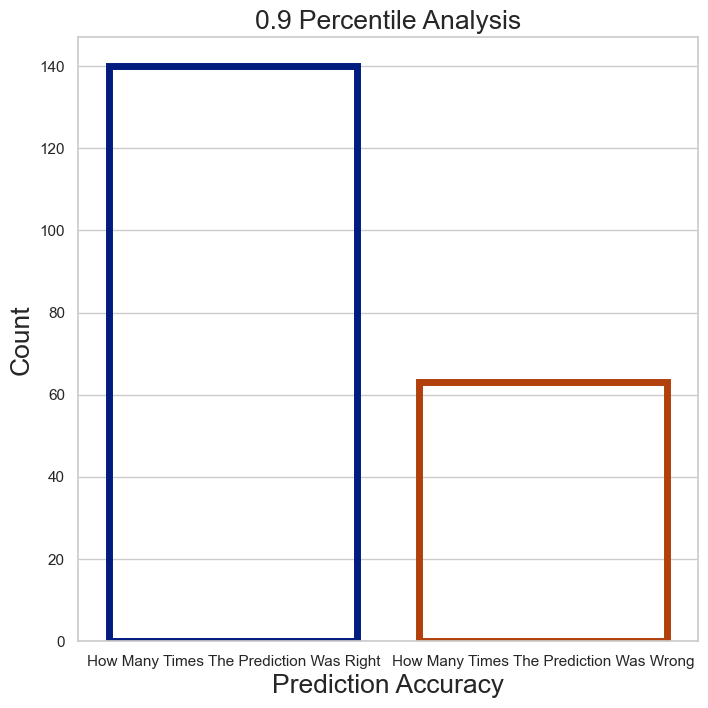

In [566]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [567]:
Predictions3 = []
for i in regressiondata5.Year_Renoveted:
    if i == 0:  Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1934:Predictions3.append('Between: $238,950 - $887,549')
    if i == 1945:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1950:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1951:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1952:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1953:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1954:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1955:Predictions3.append('Between: $238,950 - $887,549')
    if i == 1956:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1957:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1958:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1959:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1960:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1961:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1962:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1963:Predictions3.append('Between: $238,950 - $887,549')
    if i == 1964:Predictions3.append('Between: $238,950 - $887,549')
    if i == 1965:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1966:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1967:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1968:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1969:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1970:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1971:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1972:Predictions3.append('Between: $238,950 - $887,549')
    if i == 1973:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1974:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1975:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1976:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1977:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1978:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1979:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1980:Predictions3.append('Between: $238,950 - $887,549')
    if i == 1981:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1982:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1983:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1984:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1985:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1986:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1987:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1988:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1989:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1990:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1991:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1992:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1993:Predictions3.append('Between: $238,950 - $887,549')
    if i == 1994:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1995:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1996:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1997:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1998:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 1999:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2000:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2001:Predictions3.append('Between: $238,950 - $887,549')
    if i == 2002:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2003:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2004:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2005:Predictions3.append('Between: $238,950 - $887,549')
    if i == 2006:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2007:Predictions3.append('Between: $238,950 - $887,549')
    if i == 2008:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2009:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2010:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2011:Predictions3.append('Between: $238,950 - $887,549')
    if i == 2012:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2013:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2014:Predictions3.append('Between: $238,950 - $887,549') 
    if i == 2015:Predictions3.append('Between: $238,950 - $887,549')
len(Predictions3)
#len(regressiondata5.Year_Renoveted)

4796

In [568]:
price = []
for i in regressiondata5.Price:
    price.append("${:,.0f}".format(i))

In [569]:
Prediction4 = pd.DataFrame({'Year Renoveted':regressiondata5.Year_Renoveted,
                           'Prediction':Predictions3,'Actual Price':price})
Prediction4

Year Renoveted                    Prediction Actual Price
0                0.0  Between: $238,950 - $887,549     $221,900
1                0.0  Between: $238,950 - $887,549     $510,000
2                0.0  Between: $238,950 - $887,549     $229,500
3                0.0  Between: $238,950 - $887,549     $400,000
4                0.0  Between: $238,950 - $887,549     $650,000
...              ...                           ...          ...
4791          1957.0  Between: $238,950 - $887,549     $456,700
4792          1967.0  Between: $238,950 - $887,549     $290,000
4793          1953.0  Between: $238,950 - $887,549     $247,500
4794          1951.0  Between: $238,950 - $887,549     $276,000
4795          1934.0  Between: $238,950 - $887,549     $459,950

[4796 rows x 3 columns]

In [570]:
def CONDITION(LEVEL_CONDITION):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    condition_level = house_info['Condition'].tolist()

    condition_index = []
    for i,x in enumerate(condition_level):
        if x == LEVEL_CONDITION:condition_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    level_westking = []
    for i  in condition_index:
        if locations[i] == zip_loca[0] : level_westking.append(i)
        elif locations[i] == zip_loca[1] : level_westking.append(i)
        elif locations[i] == zip_loca[2] : level_westking.append(i)
        elif locations[i] == zip_loca[3] : level_westking.append(i)
        elif locations[i] == zip_loca[4]: level_westking.append(i)
        elif locations[i] == zip_loca[5] : level_westking.append(i)
        elif locations[i] == zip_loca[6] : level_westking.append(i)
        elif locations[i] == zip_loca[7]: level_westking.append(i)
        elif locations[i] == zip_loca[8] : level_westking.append(i)
        elif locations[i] == zip_loca[9] : level_westking.append(i)
        elif locations[i] == zip_loca[10] : level_westking.append(i)
        elif locations[i] == zip_loca[11] : level_westking.append(i)
        elif locations[i] == zip_loca[12]: level_westking.append(i)
        elif locations[i] == zip_loca[13] : level_westking.append(i)
        elif locations[i] == zip_loca[14] : level_westking.append(i)
        elif locations[i] == zip_loca[15] : level_westking.append(i)
        elif locations[i] == zip_loca[16]: level_westking.append(i)
        elif locations[i] == zip_loca[17] : level_westking.append(i)
        elif locations[i] == zip_loca[18]: level_westking.append(i)
        elif locations[i] == zip_loca[19] : level_westking.append(i)
        elif locations[i] == zip_loca[20]: level_westking.append(i)
        elif locations[i] == zip_loca[21] : level_westking.append(i)
        elif locations[i] == zip_loca[22] : level_westking.append(i)
        elif locations[i] == zip_loca[23] : level_westking.append(i)
        elif locations[i] == zip_loca[24] : level_westking.append(i)
        elif locations[i] == zip_loca[25] : level_westking.append(i)
        elif locations[i] == zip_loca[26] : level_westking.append(i)
        elif locations[i] == zip_loca[27] : level_westking.append(i)
        elif locations[i] == zip_loca[28]: level_westking.append(i)
        elif locations[i] == zip_loca[29] : level_westking.append(i)
        elif locations[i] == zip_loca[30] : level_westking.append(i)
        elif locations[i] == zip_loca[31]: level_westking.append(i)
        elif locations[i] == zip_loca[32] : level_westking.append(i)
        elif locations[i] == zip_loca[33] : level_westking.append(i)
        elif locations[i] == zip_loca[34] : level_westking.append(i)
    
    price = house_info["Price"].tolist()

    price_westking = []
    for i in level_westking:price_westking.append(price[i])
    return(price_westking)

condition_level = house_info["Condition"].value_counts().index.tolist()
level_westking = []
for i in condition_level:
    level_westking.append(CONDITION(i))
level_westking= sum(level_westking, [])
len(level_westking)

5816

In [571]:
def AMOUNT_LEVEL(AMOUNT_LEVEL):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    condtions = house_info["Condition"].tolist()
    X_value = []
    level_index = []
    for i,x in enumerate(condtions):
        if x == AMOUNT_LEVEL:level_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    for i in level_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_LEVEL)
    return X_value
level = house_info["Condition"].value_counts().index.tolist()
condtition_level_westking = []
for i in level:
    condtition_level_westking.append(AMOUNT_LEVEL(i))
condtition_level_westking= sum(condtition_level_westking, [])
len(condtition_level_westking)

5816

In [572]:
regressiondata6 = pd.DataFrame({'Condition_Level':condtition_level_westking,
                                'Price':level_westking})
regressiondata6

Condition_Level      Price
0                   3   221900.0
1                   3   510000.0
2                   3   229500.0
3                   3   650000.0
4                   3   322500.0
...               ...        ...
5811                1   235000.0
5812                1    81000.0
5813                1   427000.0
5814                1   575000.0
5815                1  1500000.0

[5816 rows x 2 columns]

<ipython-input-573-09d3a70c4d1b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',


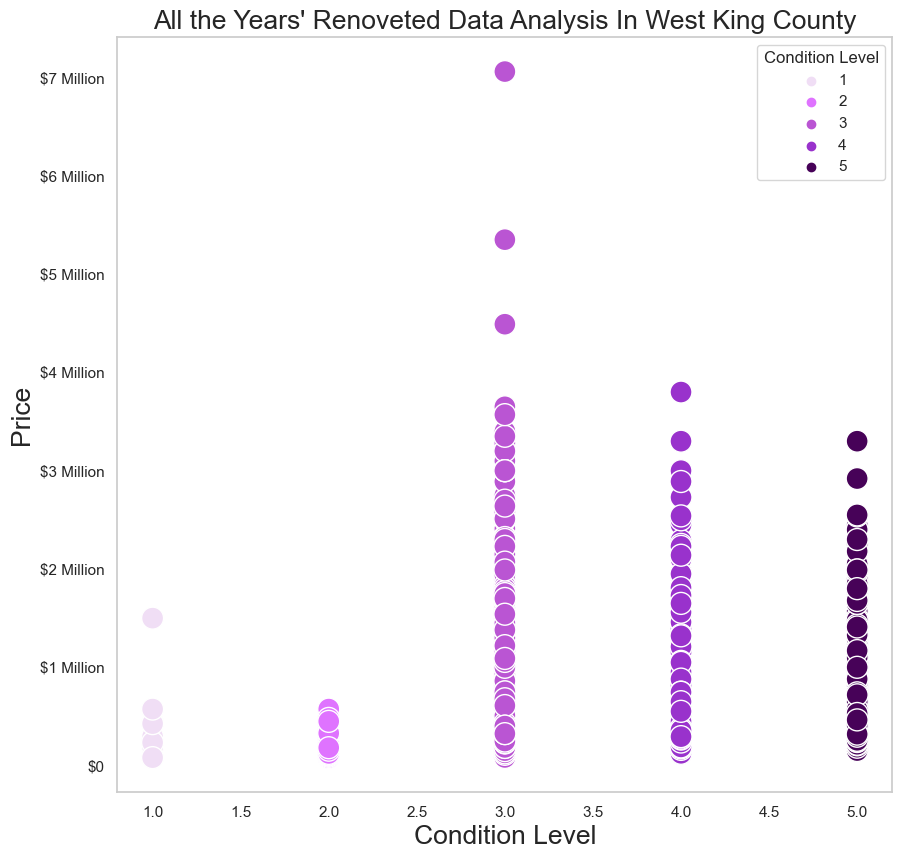

In [573]:
flatui = ['#F0DEF5','#df73ff','#ba55d3','#9932cc','#470258']

x = regressiondata6['Condition_Level']
y = regressiondata6['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata6, x=x, y=y,s=250, linewidth = 1,
                    hue='Condition_Level',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In West King County',size=19)
plt.xlabel("Condition Level", size=19)
plt.legend(title='Condition Level')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',
                         '$5 Million','$6 Million','$7 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [574]:
train_df, test_df = train_test_split(regressiondata6, test_size=0.10, shuffle=False)

In [575]:
X_train, y_train = train_df[['Condition_Level']], train_df[['Price']]
X_test, y_test = test_df[['Condition_Level']], test_df[['Price']]

In [576]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [577]:
Quantile_regression5 = pd.DataFrame({'Condition_Level': X_test.reset_index()['Condition_Level'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})
Quantile_regression5

Condition_Level            0.1            0.5            0.9      Price
0                  4  247899.939416  419000.823403  944149.199855   180000.0
1                  4  247899.939416  419000.823403  944149.199855   813000.0
2                  4  247899.939416  419000.823403  944149.199855  1050000.0
3                  4  247899.939416  419000.823403  944149.199855   325000.0
4                  4  247899.939416  419000.823403  944149.199855   675000.0
..               ...            ...            ...            ...        ...
577                1  244000.018592  459997.234452  915000.132807   235000.0
578                1  244000.018592  459997.234452  915000.132807    81000.0
579                1  244000.018592  459997.234452  915000.132807   427000.0
580                1  244000.018592  459997.234452  915000.132807   575000.0
581                1  244000.018592  459997.234452  915000.132807  1500000.0

[582 rows x 5 columns]

In [578]:
row_df = pd.DataFrame({'Condition_Level':[3],'0.1':[244000.018592],'0.5':[459997.234452],
                       '0.9':[915000.132807]
                       ,'Price':[0]})
Quantile_regression5 = pd.concat([row_df, Quantile_regression5], ignore_index=True)
Quantile_regression5

Condition_Level            0.1            0.5            0.9      Price
0                  3  244000.018592  459997.234452  915000.132807        0.0
1                  4  247899.939416  419000.823403  944149.199855   180000.0
2                  4  247899.939416  419000.823403  944149.199855   813000.0
3                  4  247899.939416  419000.823403  944149.199855  1050000.0
4                  4  247899.939416  419000.823403  944149.199855   325000.0
..               ...            ...            ...            ...        ...
578                1  244000.018592  459997.234452  915000.132807   235000.0
579                1  244000.018592  459997.234452  915000.132807    81000.0
580                1  244000.018592  459997.234452  915000.132807   427000.0
581                1  244000.018592  459997.234452  915000.132807   575000.0
582                1  244000.018592  459997.234452  915000.132807  1500000.0

[583 rows x 5 columns]

In [579]:
melted_data6 = pd.melt(Quantile_regression5, id_vars=['Condition_Level'])
melted_data6 = melted_data6.drop(range(1749,2332))
melted_data6 = melted_data6.rename(columns={'variable': 'Percentile'})
melted_data6

Condition_Level Percentile          value
0                   3        0.1  244000.018592
1                   4        0.1  247899.939416
2                   4        0.1  247899.939416
3                   4        0.1  247899.939416
4                   4        0.1  247899.939416
...               ...        ...            ...
1744                1        0.9  915000.132807
1745                1        0.9  915000.132807
1746                1        0.9  915000.132807
1747                1        0.9  915000.132807
1748                1        0.9  915000.132807

[1749 rows x 3 columns]

<ipython-input-580-927022b9b05d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000',


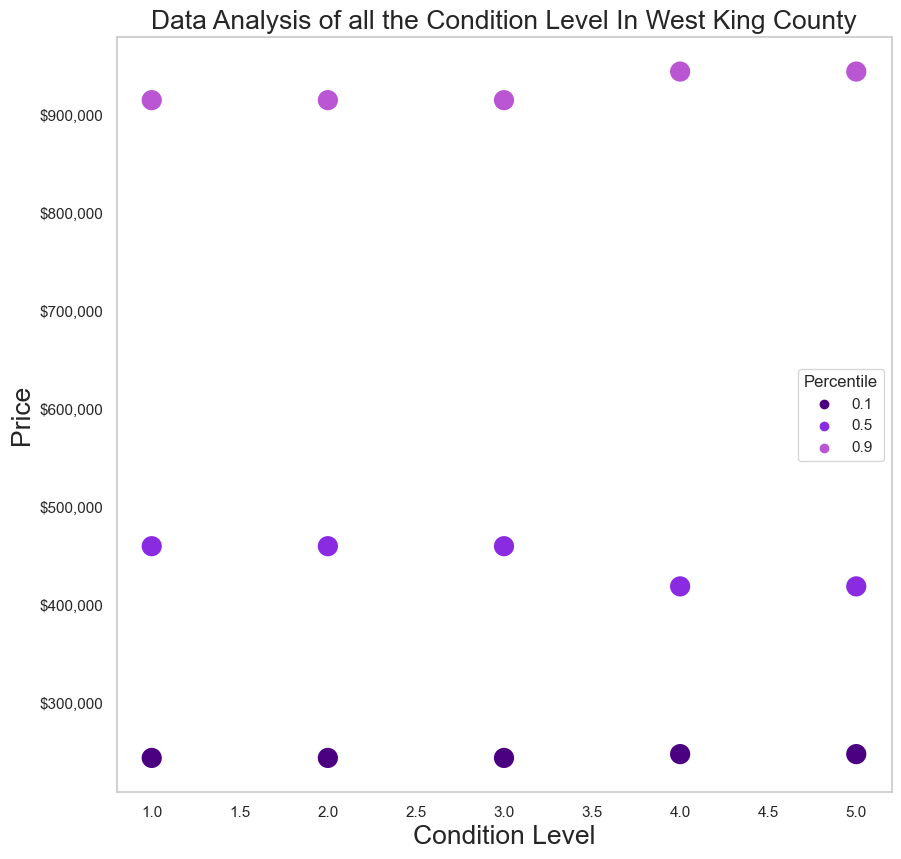

In [580]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data6, x="Condition_Level",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Condition Level In West King County',size=19)
plt.xlabel("Condition Level", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000',
                    '$900,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Condition Level")
plt.gcf().set_size_inches((10,10))

<ipython-input-581-71cd77e1c102>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000',


[Text(0, 200000.0, '0'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '')]

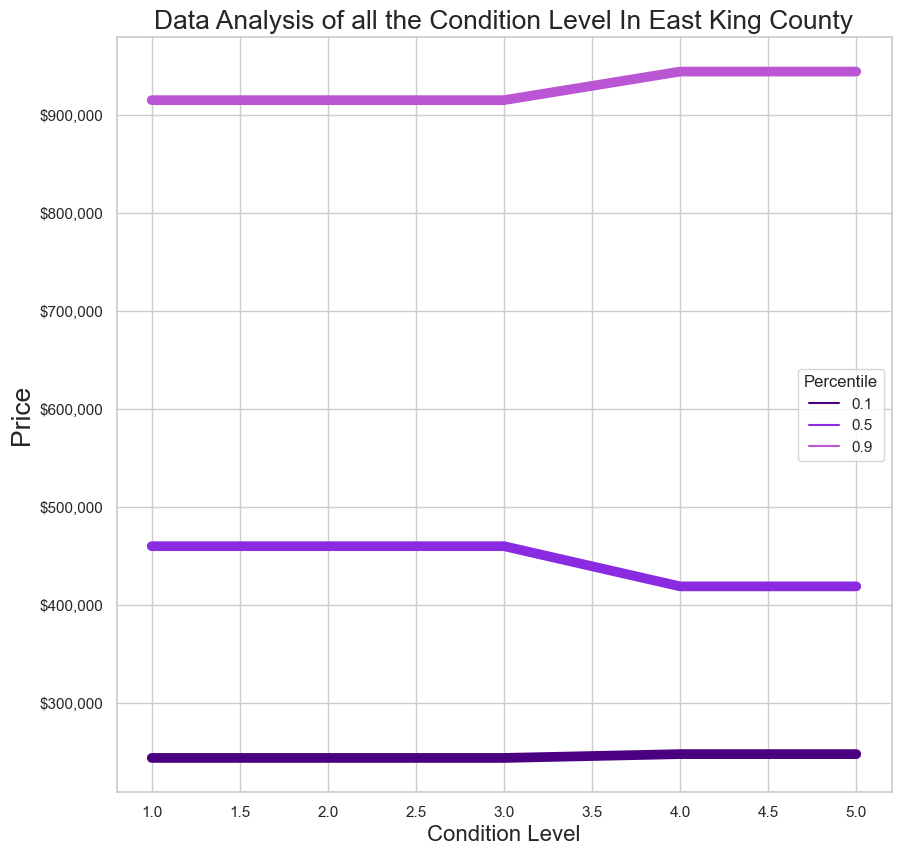

In [581]:
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data6, x="Condition_Level",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
ax.set_title('Data Analysis of all the Condition Level In East King County',size=19)
plt.legend(title='Percentile')
plt.xlabel("Condition Level", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000',
                    '$900,000'])

In [582]:
(Quantile_regression5['Price'] > Quantile_regression5['0.1']).value_counts()

True     503
False     80
dtype: int64

In [583]:
i = 0
y= 0
x = []
while i < 503:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 80:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [584]:
(Quantile_regression5['Price'] > Quantile_regression5['0.5']).value_counts()

False    304
True     279
dtype: int64

In [585]:
i = 0
y= 0
x = []
while i < 304:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 279:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [586]:
(Quantile_regression5['Price'] > Quantile_regression5['0.9']).value_counts()

False    515
True      68
dtype: int64

In [587]:
i = 0
y= 0
x = []
while i < 515:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 68:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

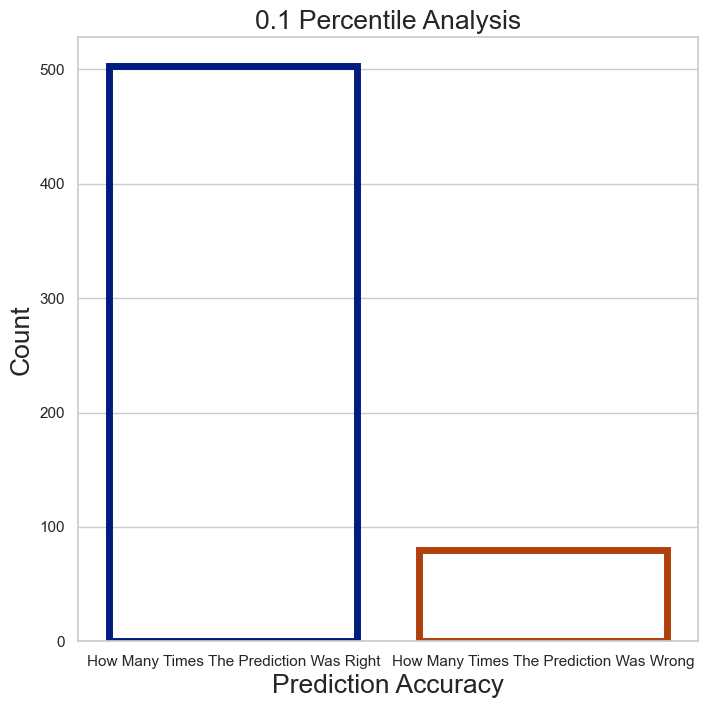

In [588]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

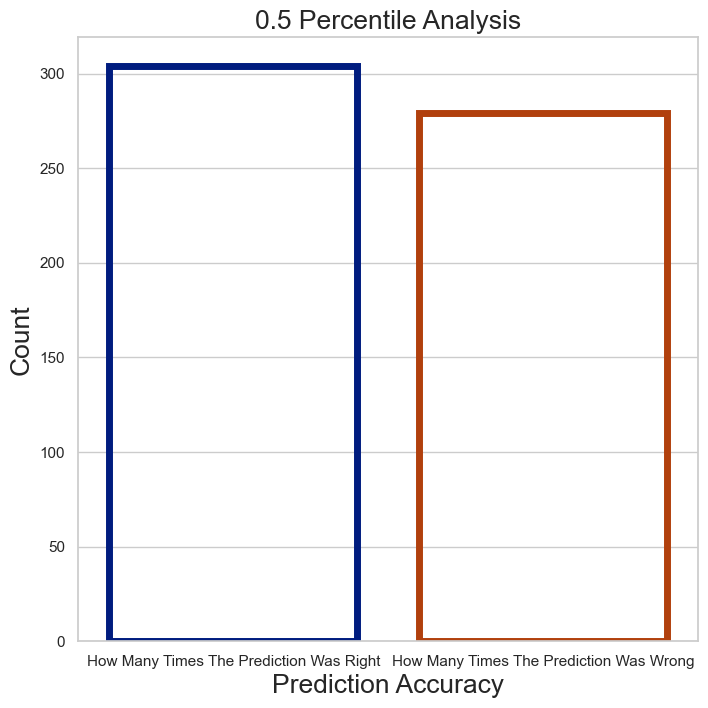

In [589]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

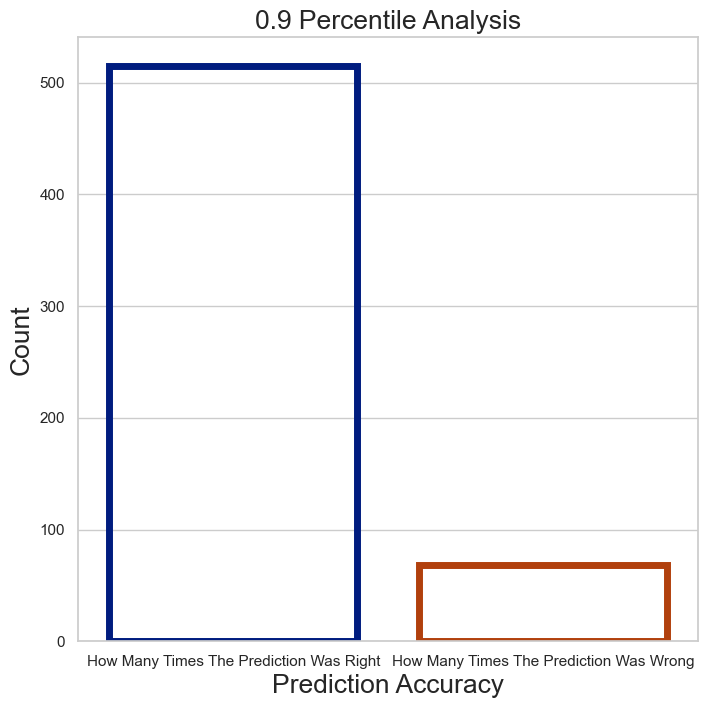

In [590]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [591]:
Predictions5 = []
for i in regressiondata6.Condition_Level:
    if i == 1:Predictions5.append('Between: $244,000 - $915,000') 
    if i == 2:Predictions5.append('Between: $244,000 - $915,000') 
    if i == 3:Predictions5.append('Between: $244,000 - $915,000')
    if i == 4:Predictions5.append('Between: $247,899 - $944,149') 
    if i == 5: Predictions5.append('Between: $247,899 - $944,149')
len(Predictions5)

5816

In [592]:
price = []
for i in regressiondata6.Price:
    price.append("${:,.0f}".format(i))

In [593]:
Prediction5 = pd.DataFrame({'Condition Level':regressiondata6.Condition_Level,
                           'Prediction':Predictions5,'Actual Price':price})
Prediction5

Condition Level                    Prediction Actual Price
0                   3  Between: $244,000 - $915,000     $221,900
1                   3  Between: $244,000 - $915,000     $510,000
2                   3  Between: $244,000 - $915,000     $229,500
3                   3  Between: $244,000 - $915,000     $650,000
4                   3  Between: $244,000 - $915,000     $322,500
...               ...                           ...          ...
5811                1  Between: $244,000 - $915,000     $235,000
5812                1  Between: $244,000 - $915,000      $81,000
5813                1  Between: $244,000 - $915,000     $427,000
5814                1  Between: $244,000 - $915,000     $575,000
5815                1  Between: $244,000 - $915,000   $1,500,000

[5816 rows x 3 columns]

In [594]:
def SQFT_LIVING(SQFT_LIVINGS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_living = house_info['Sqft_living'].tolist()
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
        
    living_index = []
    for i,x in enumerate(sqft_living):
        if x == SQFT_LIVINGS:living_index.append(i)

    living_westking = []
    for i in living_index:
        if locations[i] == zip_loca[0] : living_westking.append(i)
        elif locations[i] == zip_loca[1] : living_westking.append(i)
        elif locations[i] == zip_loca[2] : living_westking.append(i)
        elif locations[i] == zip_loca[3] : living_westking.append(i)
        elif locations[i] == zip_loca[4]: living_westking.append(i)
        elif locations[i] == zip_loca[5] : living_westking.append(i)
        elif locations[i] == zip_loca[6] : living_westking.append(i)
        elif locations[i] == zip_loca[7]: living_westking.append(i)
        elif locations[i] == zip_loca[8] : living_westking.append(i)
        elif locations[i] == zip_loca[9] : living_westking.append(i)
        elif locations[i] == zip_loca[10] : living_westking.append(i)
        elif locations[i] == zip_loca[11] : living_westking.append(i)
        elif locations[i] == zip_loca[12]: living_westking.append(i)
        elif locations[i] == zip_loca[13] : living_westking.append(i)
        elif locations[i] == zip_loca[14] : living_westking.append(i)
        elif locations[i] == zip_loca[15] : living_westking.append(i)
        elif locations[i] == zip_loca[16]: living_westking.append(i)
        elif locations[i] == zip_loca[17] : living_westking.append(i)
        elif locations[i] == zip_loca[18]: living_westking.append(i)
        elif locations[i] == zip_loca[19] : living_westking.append(i)
        elif locations[i] == zip_loca[20]: living_westking.append(i)
        elif locations[i] == zip_loca[21] : living_westking.append(i)
        elif locations[i] == zip_loca[22] : living_westking.append(i)
        elif locations[i] == zip_loca[23] : living_westking.append(i)
        elif locations[i] == zip_loca[24] : living_westking.append(i)
        elif locations[i] == zip_loca[25] : living_westking.append(i)
        elif locations[i] == zip_loca[26] : living_westking.append(i)
        elif locations[i] == zip_loca[27] : living_westking.append(i)
        elif locations[i] == zip_loca[28]: living_westking.append(i)
        elif locations[i] == zip_loca[29] : living_westking.append(i)
        elif locations[i] == zip_loca[30] : living_westking.append(i)
        elif locations[i] == zip_loca[31]: living_westking.append(i)
        elif locations[i] == zip_loca[32] : living_westking.append(i)
        elif locations[i] == zip_loca[33] : living_westking.append(i)
        elif locations[i] == zip_loca[34] : living_westking.append(i)

    price = house_info["Price"].tolist()

    price_westking = []
    for i in living_westking:price_westking.append(price[i])
    return(price_westking)

no_of_sqft_living = house_info["Sqft_living"].value_counts().index.tolist()
price_living_westking = []
for i in no_of_sqft_living:
    price_living_westking.append(SQFT_LIVING(i))
price_living_westking= sum(price_living_westking, [])
len(price_living_westking)

5816

In [788]:
def AMOUNT_LIVING(AMOUNT_LIVINGS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_living = house_info['Sqft_living'].tolist()
    X_value = []
    living_index = []
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
        
    for i,x in enumerate(sqft_living):
        if x == AMOUNT_LIVINGS:living_index.append(i)

    for i in living_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_LIVINGS)
    return X_value
no_of_sqft_living = house_info["Sqft_living"].value_counts().index.tolist()
amount_living_westking = []
for i in no_of_sqft_living:
    amount_living_westking.append(AMOUNT_LIVING(i))
amount_living_westking= sum(amount_living_westking, [])
len(amount_living_westking)

5816

In [596]:
regressiondata7 = pd.DataFrame({'Amount_of_sqft_living':amount_living_westking,
                                'Price':price_living_westking})
regressiondata7

Amount_of_sqft_living      Price
0                      1300   236000.0
1                      1300   435000.0
2                      1300   331000.0
3                      1300   175000.0
4                      1300   312000.0
...                     ...        ...
5811                   5940  1150000.0
5812                   1495   400000.0
5813                   1639   450000.0
5814                   1095   302282.0
5815                   4645  1600000.0

[5816 rows x 2 columns]

<ipython-input-732-a070196c22a3>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million'


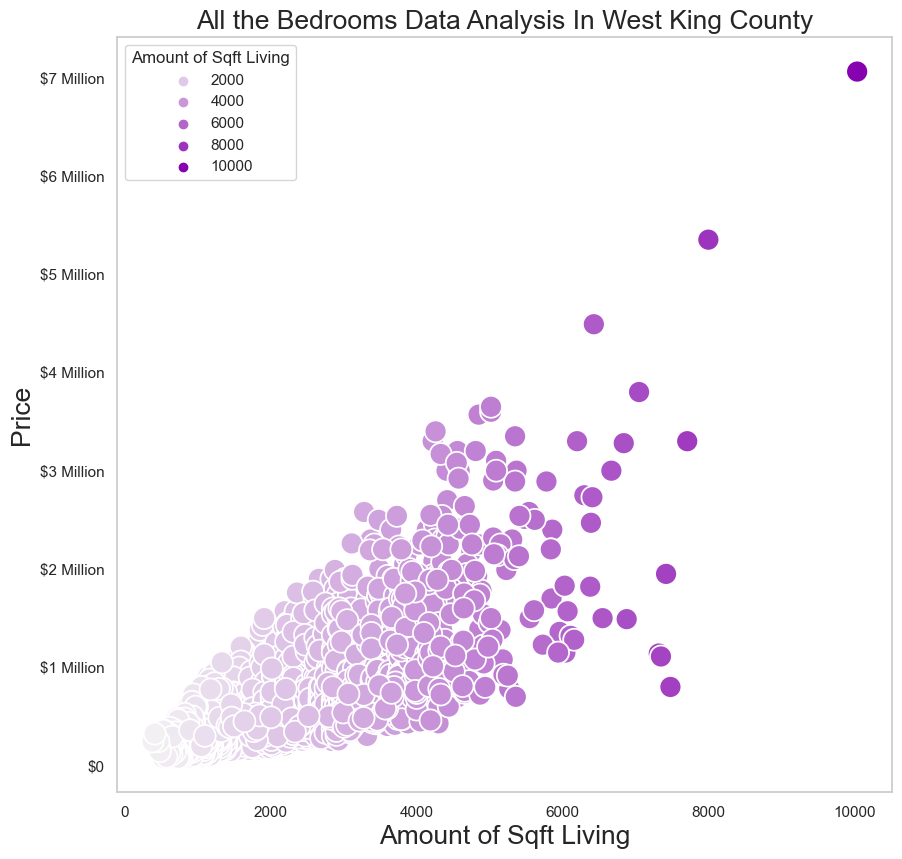

In [732]:
x = regressiondata7['Amount_of_sqft_living']
y = regressiondata7['Price']

sns.set(style='whitegrid')
cmap = sns.light_palette("#8601af", as_cmap=True)

#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})

ax = sns.scatterplot(data=regressiondata7, x=x, y=y,s=250,hue='Amount_of_sqft_living',
                   palette=cmap )
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In West King County',size=19)
plt.xlabel("Amount of Sqft Living", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Sqft Living')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million'
                   ,'$6 Million','$7 Million'])
plt.show()

In [598]:
train_df, test_df = train_test_split(regressiondata7, test_size=0.10, shuffle=False)

In [599]:
X_train, y_train = train_df[['Amount_of_sqft_living']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_sqft_living']], test_df[['Price']]

In [600]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [601]:
Quantile_regression7 = pd.DataFrame({'Amount_of_sqft_living': X_test.reset_index()['Amount_of_sqft_living'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})
Quantile_regression7[100:]

Amount_of_sqft_living            0.1            0.5           0.9  \
100                   3740  536352.690070  946568.097529  1.701128e+06   
101                   3740  536352.690070  946568.097529  1.701128e+06   
102                   3740  536352.690070  946568.097529  1.701128e+06   
103                   3920  536352.690070  946568.097529  1.701128e+06   
104                   3920  536352.690070  946568.097529  1.701128e+06   
..                     ...            ...            ...           ...   
577                   5940  536352.690070  946568.097529  1.701128e+06   
578                   1495  234230.148618  333471.359377  6.950494e+05   
579                   1639  247659.179453  480126.559111  7.797740e+05   
580                   1095  152077.462219  266507.650289  4.140860e+05   
581                   4645  536352.690070  946568.097529  1.701128e+06   

         Price  
100   999950.0  
101   710000.0  
102  1140000.0  
103  1000000.0  
104   827500.0  
..         ...  
577  1150000.0  
578   400000.0  
579   450000.0  
580   302282.0  
581  1600000.0  

[482 rows x 5 columns]

In [602]:
melted_data8 = pd.melt(Quantile_regression7, id_vars=['Amount_of_sqft_living'])
melted_data8 = melted_data8.drop(range(1746,2328))
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

Amount_of_sqft_living Percentile         value
0                       740        0.1  1.441221e+05
1                       740        0.1  1.441221e+05
2                       740        0.1  1.441221e+05
3                       740        0.1  1.441221e+05
4                      3170        0.1  4.424843e+05
...                     ...        ...           ...
1741                   5940        0.9  1.701128e+06
1742                   1495        0.9  6.950494e+05
1743                   1639        0.9  7.797740e+05
1744                   1095        0.9  4.140860e+05
1745                   4645        0.9  1.701128e+06

[1746 rows x 3 columns]

In [603]:
for x,i in enumerate(melted_data8.Amount_of_sqft_living):
    if 3500 <= i <= 4000:
        print(i,melted_data8.Percentile[x],melted_data8.value[x])

3520 0.1 632512.095310141
3520 0.1 632512.095310141
3520 0.1 632512.095310141
3680 0.1 536352.6900698583
3680 0.1 536352.6900698583
3680 0.1 536352.6900698583
3680 0.1 536352.6900698583
3680 0.1 536352.6900698583
3530 0.1 632512.095310141
3510 0.1 632512.095310141
3510 0.1 632512.095310141
3510 0.1 632512.095310141
3510 0.1 632512.095310141
3510 0.1 632512.095310141
3510 0.1 632512.095310141
3510 0.1 632512.095310141
3510 0.1 632512.095310141
3510 0.1 632512.095310141
3830 0.1 536352.6900698583
3830 0.1 536352.6900698583
3830 0.1 536352.6900698583
3830 0.1 536352.6900698583
3550 0.1 536352.6900698583
3550 0.1 536352.6900698583
3550 0.1 536352.6900698583
3550 0.1 536352.6900698583
3650 0.1 536352.6900698583
3650 0.1 536352.6900698583
3650 0.1 536352.6900698583
3650 0.1 536352.6900698583
3650 0.1 536352.6900698583
3610 0.1 536352.6900698583
3610 0.1 536352.6900698583
3610 0.1 536352.6900698583
3610 0.1 536352.6900698583
3700 0.1 536352.6900698583
3700 0.1 536352.6900698583
3700 0.1 53635

<ipython-input-604-68ae37444980>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million','$1.25 Million','$1.5 Million'


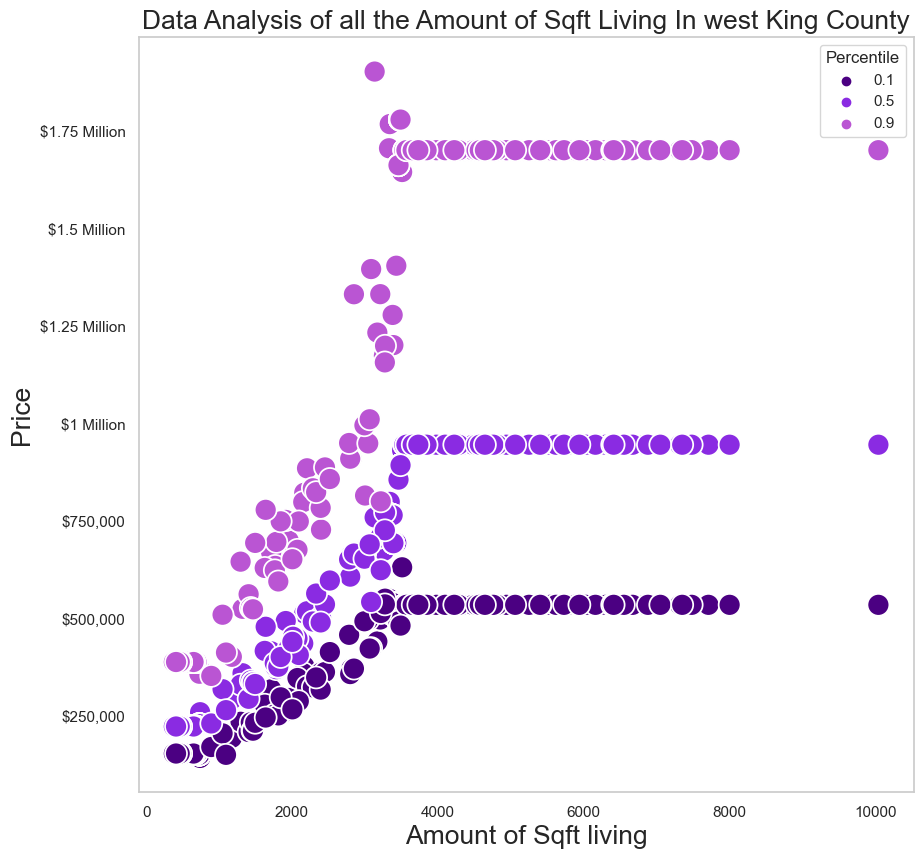

In [604]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data8, x="Amount_of_sqft_living",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Amount of Sqft Living In west King County',size=19)
plt.xlabel("Amount of Sqft living", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million','$1.25 Million','$1.5 Million'
                  ,'$1.75 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Sqft living")
plt.gcf().set_size_inches((10,10))

In [605]:
Quantile_regression7_updated = pd.DataFrame({'Amount_of_sqft_living':[0,700,3500,6000,8000,10000],
    '0.1':[144122.1375820758,144122.1375820758,536352.6900698583,536352.6900698583,536352.6900698583,
          536352.6900698583],
    '0.5':[230739.4812292502,230739.4812292502,946568.0975289994,946568.0975289994,946568.0975289994,
          946568.0975289994],
    '0.9':[414085.9752575684,414085.9752575684,1701127.5755842198,1701127.5755842198,1701127.5755842198,
          1701127.5755842198]})

In [606]:
melted_data8 = pd.melt(Quantile_regression7_updated, id_vars=['Amount_of_sqft_living'])
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

Amount_of_sqft_living Percentile         value
0                       0        0.1  1.441221e+05
1                     700        0.1  1.441221e+05
2                    3500        0.1  5.363527e+05
3                    6000        0.1  5.363527e+05
4                    8000        0.1  5.363527e+05
5                   10000        0.1  5.363527e+05
6                       0        0.5  2.307395e+05
7                     700        0.5  2.307395e+05
8                    3500        0.5  9.465681e+05
9                    6000        0.5  9.465681e+05
10                   8000        0.5  9.465681e+05
11                  10000        0.5  9.465681e+05
12                      0        0.9  4.140860e+05
13                    700        0.9  4.140860e+05
14                   3500        0.9  1.701128e+06
15                   6000        0.9  1.701128e+06
16                   8000        0.9  1.701128e+06
17                  10000        0.9  1.701128e+06

<ipython-input-607-dbea815e101e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million','$1.20 Million'


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.20 Million'),
 Text(0, 1400000.0, '$1.40 Million'),
 Text(0, 1600000.0, '$1.60  Million'),
 Text(0, 1800000.0, '')]

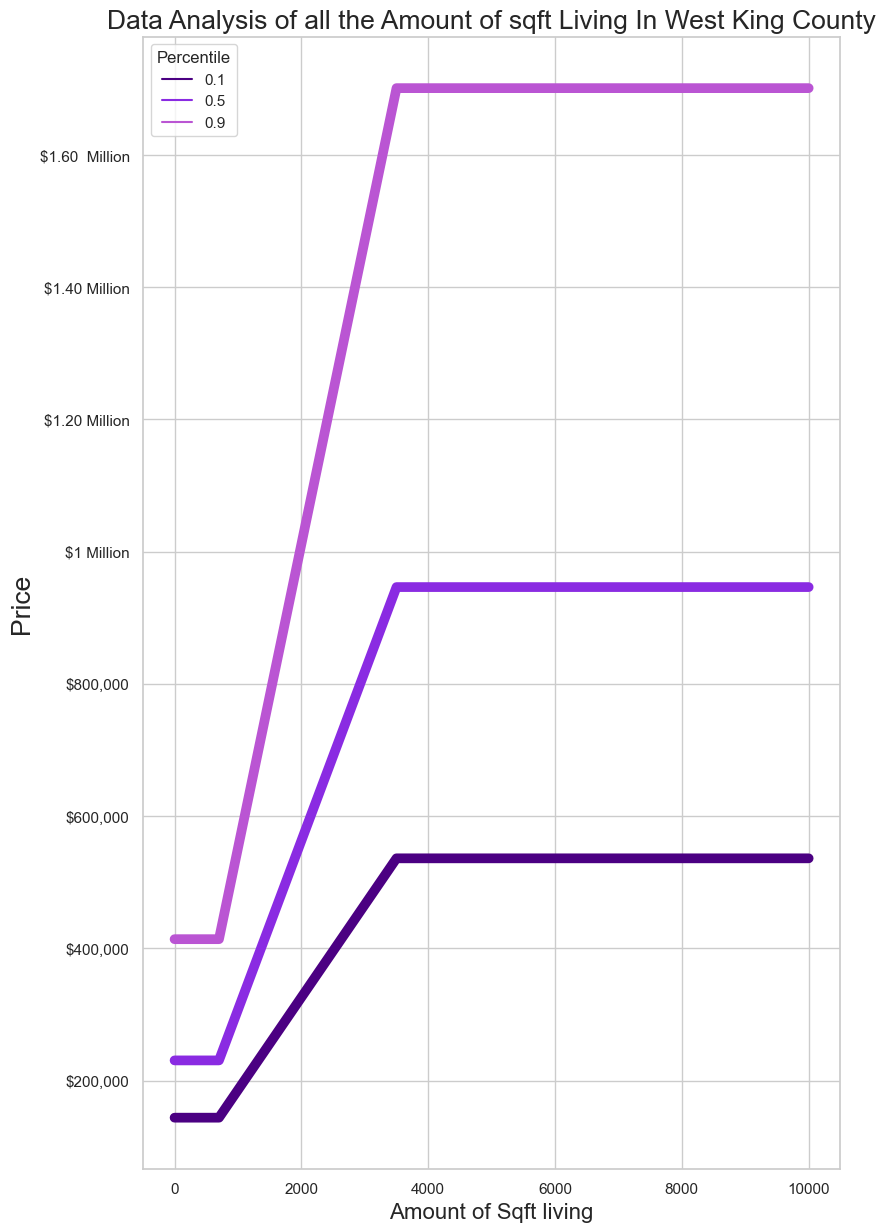

In [607]:
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data8, x="Amount_of_sqft_living",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Data Analysis of all the Amount of sqft Living In West King County',size=19)
plt.xlabel("Amount of Sqft living", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million','$1.20 Million'
                   ,'$1.40 Million','$1.60  Million'])

In [608]:
(Quantile_regression7['Price'] > Quantile_regression7['0.1']).value_counts()

True     536
False     46
dtype: int64

In [609]:
i = 0
y= 0
x = []
while i < 536:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 46:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [610]:
(Quantile_regression7['Price'] > Quantile_regression7['0.5']).value_counts()

True     341
False    241
dtype: int64

In [611]:
i = 0
y= 0
x = []
while i < 341:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 241:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [612]:
(Quantile_regression7['Price'] > Quantile_regression7['0.9']).value_counts()

False    450
True     132
dtype: int64

In [613]:
i = 0
y= 0
x = []
while i < 450:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 132:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

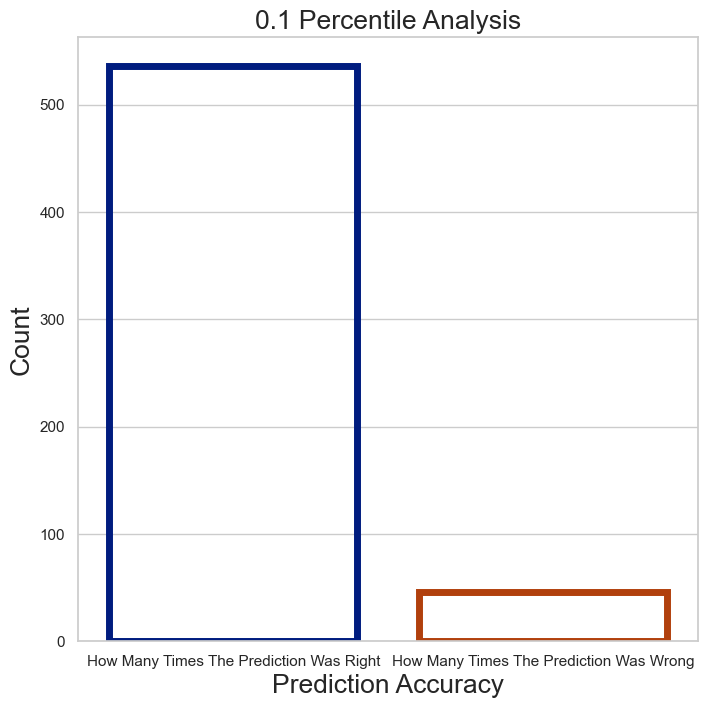

In [614]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

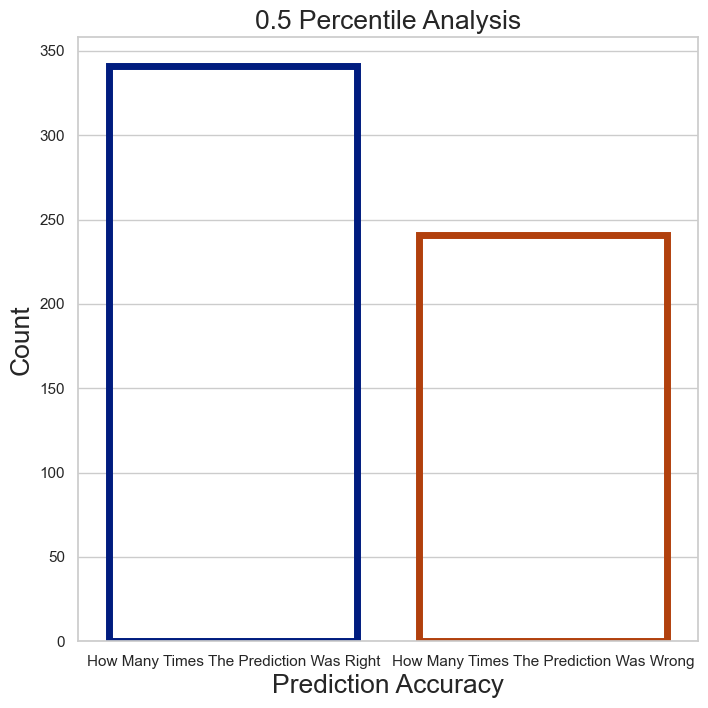

In [615]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

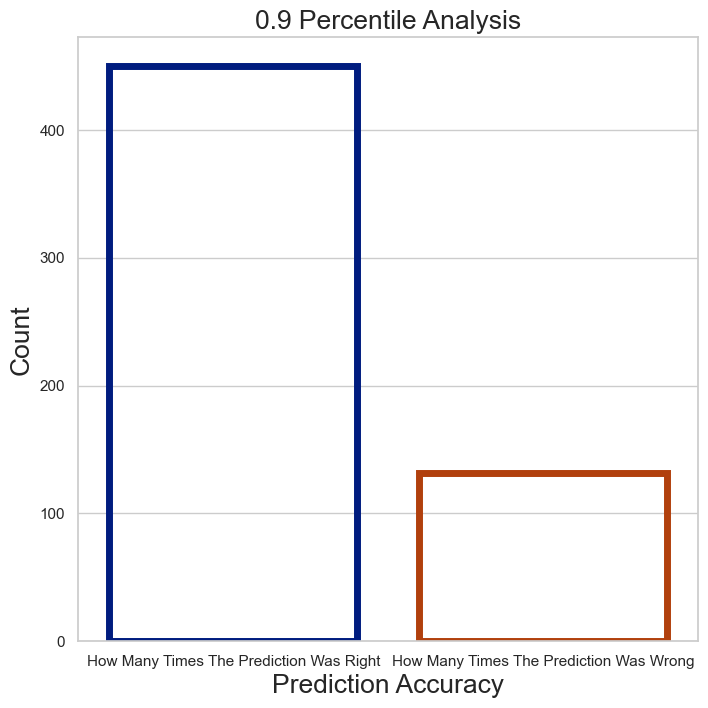

In [616]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [617]:
df_practise = pd.DataFrame({'x':[700,3500], 'y':[344122.1375820758,536352.6900698583]})
df_practise

x              y
0   700  344122.137582
1  3500  536352.690070

In [618]:
X_train, y_train = df_practise[['x']], df_practise[['y']]

In [619]:
classifiers = {}
for tau in [0.1]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [620]:
practise_regression = []
practise_regression = pd.DataFrame({'Amount_of_sqft_living': X_test.reset_index()['Amount_of_sqft_living'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              'Price': y_test.reset_index()['Price']})
practise_regression

Amount_of_sqft_living        0.1      Price
0                      740  382568.25   213800.0
1                      740  382568.25   122000.0
2                      740  382568.25   230500.0
3                      740  382568.25   350000.0
4                     3170  382568.25   505000.0
..                     ...        ...        ...
577                   5940  382568.25  1150000.0
578                   1495  382568.25   400000.0
579                   1639  382568.25   450000.0
580                   1095  382568.25   302282.0
581                   4645  382568.25  1600000.0

[582 rows x 3 columns]

In [621]:
df_practise = pd.DataFrame({'x':[700,3500], 'y':[714085.9752575684,1701127.5755842198]})
df_practise

x             y
0   700  7.140860e+05
1  3500  1.701128e+06

In [622]:
X_train, y_train = df_practise[['x']], df_practise[['y']]

In [623]:
classifiers = {}
for tau in [0.1]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [624]:
practise_regression = pd.DataFrame({'Amount_of_sqft_living': X_test.reset_index()['Amount_of_sqft_living'],
              '0.9': classifiers['0.1']['predictions']['0.1'],
              'Price': y_test.reset_index()['Price']})
practise_regression

Amount_of_sqft_living         0.9      Price
0                      740  911494.375   213800.0
1                      740  911494.375   122000.0
2                      740  911494.375   230500.0
3                      740  911494.375   350000.0
4                     3170  911494.375   505000.0
..                     ...         ...        ...
577                   5940  911494.375  1150000.0
578                   1495  911494.375   400000.0
579                   1639  911494.375   450000.0
580                   1095  911494.375   302282.0
581                   4645  911494.375  1600000.0

[582 rows x 3 columns]

In [625]:
Predictions7 = []
for i in regressiondata7.Amount_of_sqft_living:
    if -1 <= i <= 700:Predictions7.append('Between: $144,122 - $414,085') 
    if 701 <= i <= 3500:Predictions7.append('Between: $382,568 - $911,494') 
    if 3501 <= i <= 10050:Predictions7.append('Between: $536,352- $1,701,127')
len(Predictions7)

5816

In [626]:
price = []
for i in regressiondata7.Price:
    price.append("${:,.0f}".format(i))
len(price)

5816

In [778]:
Prediction8 = pd.DataFrame({'Amount_of_sqft_Living': regressiondata7.Amount_of_sqft_living,
                           'Prediction':Predictions7,'Actual Price':price})
Prediction8

Amount_of_sqft_Living                     Prediction Actual Price
0                      1300   Between: $382,568 - $911,494     $236,000
1                      1300   Between: $382,568 - $911,494     $435,000
2                      1300   Between: $382,568 - $911,494     $331,000
3                      1300   Between: $382,568 - $911,494     $175,000
4                      1300   Between: $382,568 - $911,494     $312,000
...                     ...                            ...          ...
5811                   5940  Between: $536,352- $1,701,127   $1,150,000
5812                   1495   Between: $382,568 - $911,494     $400,000
5813                   1639   Between: $382,568 - $911,494     $450,000
5814                   1095   Between: $382,568 - $911,494     $302,282
5815                   4645  Between: $536,352- $1,701,127   $1,600,000

[5816 rows x 3 columns]

In [640]:
def SQFT_LOT(SQFT_LOTS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_lot = house_info['Sqft_lot'].tolist()

    lot_index = []
    for i,x in enumerate(sqft_lot):
        if x == SQFT_LOTS:lot_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    lot_westking = []
    for i in lot_index:
            if locations[i] == zip_loca[0] : lot_westking.append(i)
            elif locations[i] == zip_loca[1] : lot_westking.append(i)
            elif locations[i] == zip_loca[2] : lot_westking.append(i)
            elif locations[i] == zip_loca[3] : lot_westking.append(i)
            elif locations[i] == zip_loca[4]: lot_westking.append(i)
            elif locations[i] == zip_loca[5] : lot_westking.append(i)
            elif locations[i] == zip_loca[6] : lot_westking.append(i)
            elif locations[i] == zip_loca[7]: lot_westking.append(i)
            elif locations[i] == zip_loca[8] : lot_westking.append(i)
            elif locations[i] == zip_loca[9] : lot_westking.append(i)
            elif locations[i] == zip_loca[10] : lot_westking.append(i)
            elif locations[i] == zip_loca[11] : lot_westking.append(i)
            elif locations[i] == zip_loca[12]: lot_westking.append(i)
            elif locations[i] == zip_loca[13] : lot_westking.append(i)
            elif locations[i] == zip_loca[14] : lot_westking.append(i)
            elif locations[i] == zip_loca[15] : lot_westking.append(i)
            elif locations[i] == zip_loca[16]: lot_westking.append(i)
            elif locations[i] == zip_loca[17] : lot_westking.append(i)
            elif locations[i] == zip_loca[18]: lot_westking.append(i)
            elif locations[i] == zip_loca[19] : lot_westking.append(i)
            elif locations[i] == zip_loca[20]: lot_westking.append(i)
            elif locations[i] == zip_loca[21] : lot_westking.append(i)
            elif locations[i] == zip_loca[22] : lot_westking.append(i)
            elif locations[i] == zip_loca[23] : lot_westking.append(i)
            elif locations[i] == zip_loca[24] : lot_westking.append(i)
            elif locations[i] == zip_loca[25] : lot_westking.append(i)
            elif locations[i] == zip_loca[26] : lot_westking.append(i)
            elif locations[i] == zip_loca[27] : lot_westking.append(i)
            elif locations[i] == zip_loca[28]: lot_westking.append(i)
            elif locations[i] == zip_loca[29] : lot_westking.append(i)
            elif locations[i] == zip_loca[30] : lot_westking.append(i)
            elif locations[i] == zip_loca[31]: lot_westking.append(i)
            elif locations[i] == zip_loca[32] : lot_westking.append(i)
            elif locations[i] == zip_loca[33] : lot_westking.append(i)
            elif locations[i] == zip_loca[34] : lot_westking.append(i)

    price = house_info["Price"].tolist()

    price_westking = []
    for i in lot_westking:price_westking.append(price[i])
    return(price_westking)

no_of_sqft_lot = house_info["Sqft_lot"].value_counts().index.tolist()
price_lot_westking = []
for i in no_of_sqft_lot:
    price_lot_westking.append(SQFT_LOT(i))
price_lot_westking= sum(price_lot_westking, [])
len(price_lot_westking)

5816

In [661]:
def AMOUNT_LOT(AMOUNT_LOTS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_lot = house_info['Sqft_lot'].tolist()
    X_value = []
    
    lot_index = []
    for i,x in enumerate(sqft_lot):
        if x == AMOUNT_LOTS:lot_index.append(i)
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    for i in lot_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_LOTS)
    
    return X_value
no_of_sqft_lot = house_info["Sqft_lot"].value_counts().index.tolist()
amount_lot_westking = []
for i in no_of_sqft_lot:
    amount_lot_westking.append(AMOUNT_LOT(i))
amount_lot_westking= sum(amount_lot_westking, [])
len(amount_lot_westking)

5816

In [712]:
regressiondata8 = pd.DataFrame({'Amount_of_Lot':amount_lot_westking,
                                'Price':price_lot_westking})

In [713]:
#taking away outlyers
numbers = []
lots = []
index = []
for i,x in enumerate(regressiondata8.Amount_of_Lot):
    numbers.append(regressiondata8.Price[i])
    lots.append(x)
    #print(i,x,regressiondata8.Price[i])
    
#for x,i in enumerate(numbers):
    #if 600000 <= i <= 800000:print(i,x,regressiondata8.Amount_of_Lot[x])

for x,i in enumerate(lots):
    if 80000 <= i :
        index.append(x)
        #print(x,i,regressiondata8.Price[x])
        

for i in index:
    regressiondata8= regressiondata8.drop(i)

regressiondata8

Amount_of_Lot     Price
0              5000  650000.0
1              5000  275000.0
2              5000  682000.0
3              5000  550000.0
4              5000  356700.0
...             ...       ...
5811          15695  452500.0
5812          11597  750000.0
5813           9532  711000.0
5814           1833  798500.0
5815          26862  287000.0

[5732 rows x 2 columns]

<ipython-input-730-6dacd809ab67>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',


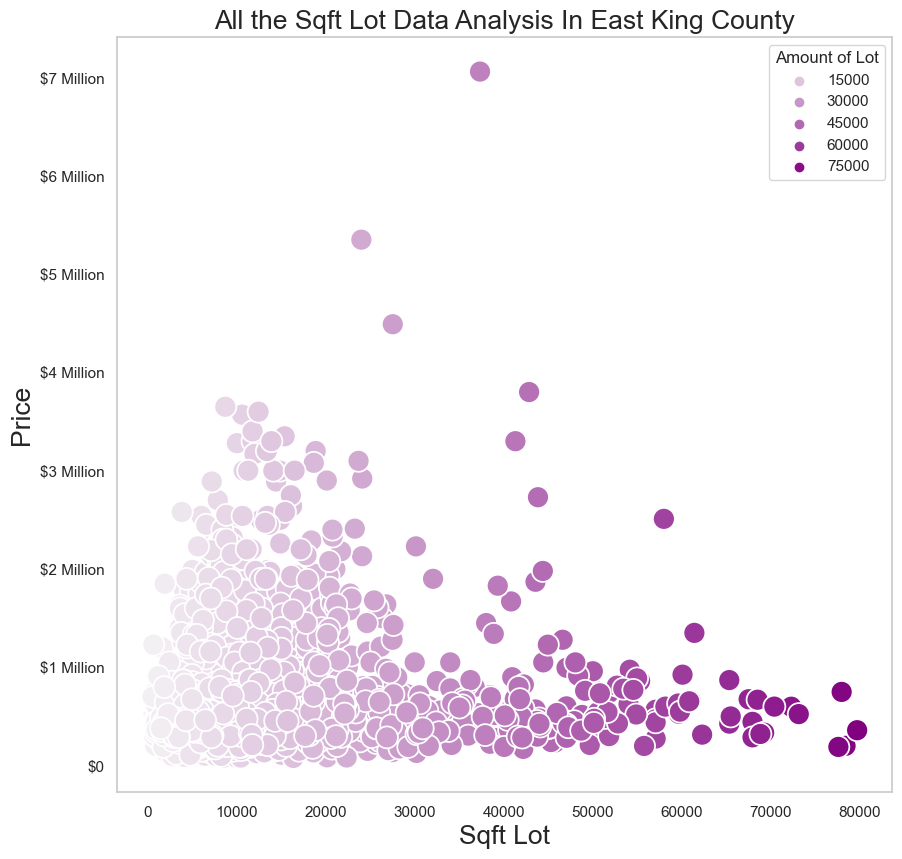

In [730]:
x = regressiondata8['Amount_of_Lot']
y = regressiondata8['Price']
sns.set(style='whitegrid')
cmap = sns.light_palette("#800080", as_cmap=True)

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata8, x=x, y=y,s=250,hue='Amount_of_Lot',
                      palette=cmap)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Sqft Lot Data Analysis In East King County',size=19)
plt.xlabel("Sqft Lot", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Lot')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',
    '$5 Million','$6 Million','$7 Million'])
plt.show()

In [715]:
train_df, test_df = train_test_split(regressiondata8, test_size=0.10, shuffle=False)

In [716]:
X_train, y_train = train_df[['Amount_of_Lot']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Lot']], test_df[['Price']]

In [717]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [718]:
Quantile_regression7 = pd.DataFrame({'Amount_of_Lot': X_test.reset_index()['Amount_of_Lot'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})
Quantile_regression7[100:]

Amount_of_Lot            0.1            0.5           0.9     Price
100          10497  240697.750609  404846.437107  1.224300e+06  445500.0
101           8466  263187.787701  407664.032473  8.226442e+05  360000.0
102           6407  210094.628946  441328.779094  7.896304e+05  261590.0
103          10545  240697.750609  404846.437107  1.224300e+06  273000.0
104           6455  225800.789498  452804.920603  8.345579e+05  675000.0
..             ...            ...            ...           ...       ...
569          15695  284324.200335  566123.731131  1.021543e+06  452500.0
570          11597  222668.809138  444884.784114  1.076739e+06  750000.0
571           9532  235620.027122  398897.179299  1.270579e+06  711000.0
572           1833  259219.130844  405243.052004  6.653259e+05  798500.0
573          26862  250102.022819  604572.707530  1.609617e+06  287000.0

[474 rows x 5 columns]

In [790]:
melted_data8 = pd.melt(Quantile_regression7, id_vars=['Amount_of_Lot'])
melted_data8 = melted_data8.drop(range(1722,2296))
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

Amount_of_Lot Percentile         value
0             70407        0.1  2.830797e+05
1             19405        0.1  2.549989e+05
2             10912        0.1  2.509741e+05
3               980        0.1  3.540618e+05
4              8833        0.1  2.133863e+05
...             ...        ...           ...
1717          15695        0.9  1.021543e+06
1718          11597        0.9  1.076739e+06
1719           9532        0.9  1.270579e+06
1720           1833        0.9  6.653259e+05
1721          26862        0.9  1.609617e+06

[1722 rows x 3 columns]

In [792]:
for x,i in enumerate(melted_data8.Amount_of_Lot):
    if 10000 <= i <= 20000:
        print(i,melted_data8.Percentile[x],melted_data8.value[x])

19405 0.1 254998.90474841942
10912 0.1 250974.11950847614
17388 0.1 294854.3163707062
19180 0.1 267125.113289409
11953 0.1 322083.78045603033
19821 0.1 254998.90474841942
12017 0.1 351511.9369396898
15843 0.1 284324.2003353469
17820 0.1 185915.24930289594
15891 0.1 284324.2003353469
14322 0.1 287439.96191516536
14402 0.1 287439.96191516536
13586 0.1 279868.6026780723
12081 0.1 283137.0148784523
10096 0.1 254625.58672987076
10477 0.1 214308.20585427995
15603 0.1 280014.8158061477
14242 0.1 287439.96191516536
12177 0.1 283137.0148784523
10049 0.1 272535.65600373806
14803 0.1 269383.72604825586
16306 0.1 269831.14959333313
12738 0.1 238294.3296410567
16290 0.1 269831.14959333313
18205 0.1 185915.24930289594
10801 0.1 263530.1873929801
11904 0.1 322083.78045603033
10769 0.1 263530.1873929801
10225 0.1 206648.74711252548
12546 0.1 238294.3296410567
10497 0.1 240697.75060911372
10545 0.1 240697.75060911372
10259 0.1 229246.9337014749
14417 0.1 287439.96191516536
14659 0.1 269383.72604825586


18255 0.9 1495096.200767123
19290 0.9 1684770.266375434
18144 0.9 1495096.200767123
12309 0.9 849422.4275722096
10246 0.9 1282188.3758231716
10012 0.9 723050.365498099
16475 0.9 1930690.796471682
10044 0.9 723050.365498099
10332 0.9 1397358.9404543682
10284 0.9 1282188.3758231716
10396 0.9 1215269.4364517906
12431 0.9 849422.4275722096
16481 0.9 1930690.796471682
10364 0.9 1215269.4364517906
10236 0.9 1282188.3758231716
10108 0.9 687136.5096283836
12215 0.9 1177754.2974062068
14270 0.9 1117172.4492156422
14292 0.9 1117172.4492156422
18810 0.9 1684770.266375434
15535 0.9 1063482.2398830191
11437 0.9 885029.482169019
13470 0.9 1782663.3455214654
13438 0.9 1782663.3455214654
17168 0.9 1226028.9153424455
12757 0.9 1403252.9201635926
11085 0.9 1049544.5757167784
11453 0.9 885029.482169019
11645 0.9 1076738.7275844167
11725 0.9 1500310.59205372
12469 0.9 562016.4678310088
18618 0.9 1816352.7018511246
17664 0.9 927795.8203710095
11533 0.9 692388.2495554739
15695 0.9 1021542.6792095726
11597 0

<ipython-input-734-7ac4a4ba22c3>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])


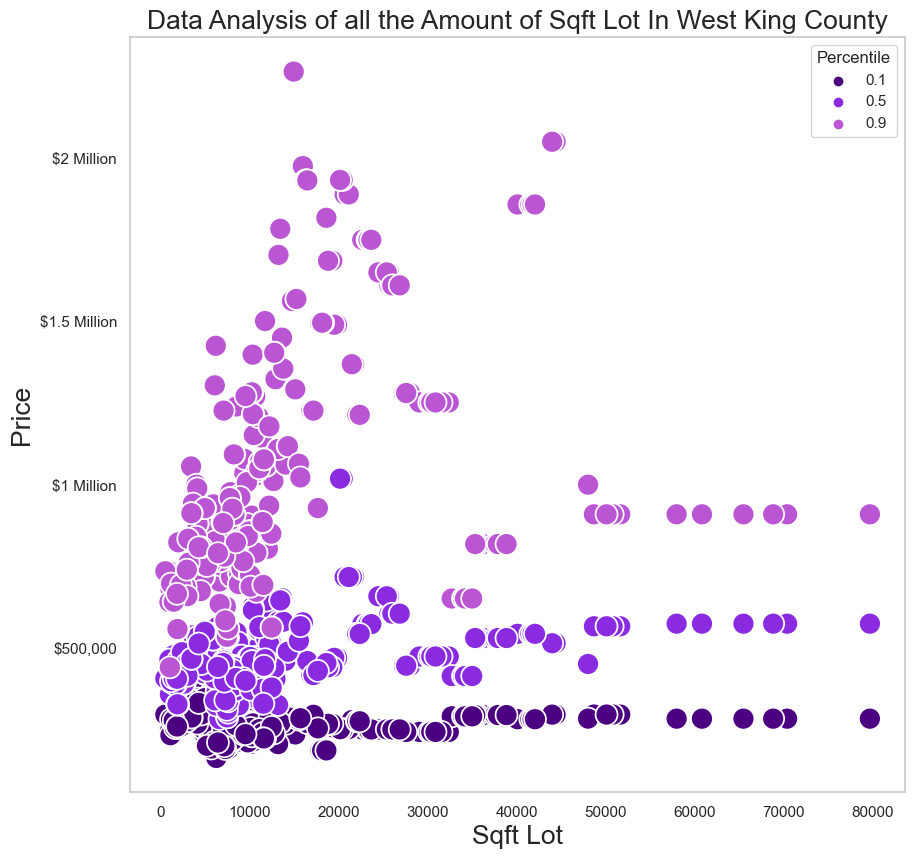

In [734]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax =sns.scatterplot(data=melted_data8, x="Amount_of_Lot",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Amount of Sqft Lot In West King County',size=19)
plt.xlabel("Sqft Lot", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Sqft Lot")
plt.gcf().set_size_inches((10,10))

In [772]:
Quantile_regression7_updated = pd.DataFrame({'Amount_of_sqft_lot':[10000,20000,30000,40000,50000,
                                                                  60000,70000,80000],
    '0.1':[283079.6566995054,283079.6566995054,283079.6566995054,283079.6566995054,
          283079.6566995054,283079.6566995054,283079.6566995054,283079.6566995054],
    '0.5':[573854.5986587504,573854.5986587504,573854.5986587504,573854.5986587504,
          573854.5986587504,573854.5986587504,573854.5986587504,573854.5986587504],
    '0.9':[2049164.5445282408,2049164.5445282408,2049164.5445282408,2049164.5445282408,
          2049164.5445282408,2049164.5445282408,2049164.5445282408,2049164.5445282408]})

In [773]:
melted_data8 = pd.melt(Quantile_regression7_updated, id_vars=['Amount_of_sqft_lot'])
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

Amount_of_sqft_lot Percentile         value
0                10000        0.1  2.830797e+05
1                20000        0.1  2.830797e+05
2                30000        0.1  2.830797e+05
3                40000        0.1  2.830797e+05
4                50000        0.1  2.830797e+05
5                60000        0.1  2.830797e+05
6                70000        0.1  2.830797e+05
7                80000        0.1  2.830797e+05
8                10000        0.5  5.738546e+05
9                20000        0.5  5.738546e+05
10               30000        0.5  5.738546e+05
11               40000        0.5  5.738546e+05
12               50000        0.5  5.738546e+05
13               60000        0.5  5.738546e+05
14               70000        0.5  5.738546e+05
15               80000        0.5  5.738546e+05
16               10000        0.9  2.049165e+06
17               20000        0.9  2.049165e+06
18               30000        0.9  2.049165e+06
19               40000        0.9  2.049165e+06
20               50000        0.9  2.049165e+06
21               60000        0.9  2.049165e+06
22               70000        0.9  2.049165e+06
23               80000        0.9  2.049165e+06

<ipython-input-776-31aef41f2502>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$500,000','$750,000',


[Text(0, 0.0, '0'),
 Text(0, 250000.0, '$250,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 750000.0, '$750,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1250000.0, '$1.25 Million'),
 Text(0, 1500000.0, '$1.5 Million'),
 Text(0, 1750000.0, '$1.75 Million'),
 Text(0, 2000000.0, '$2 Million'),
 Text(0, 2250000.0, '')]

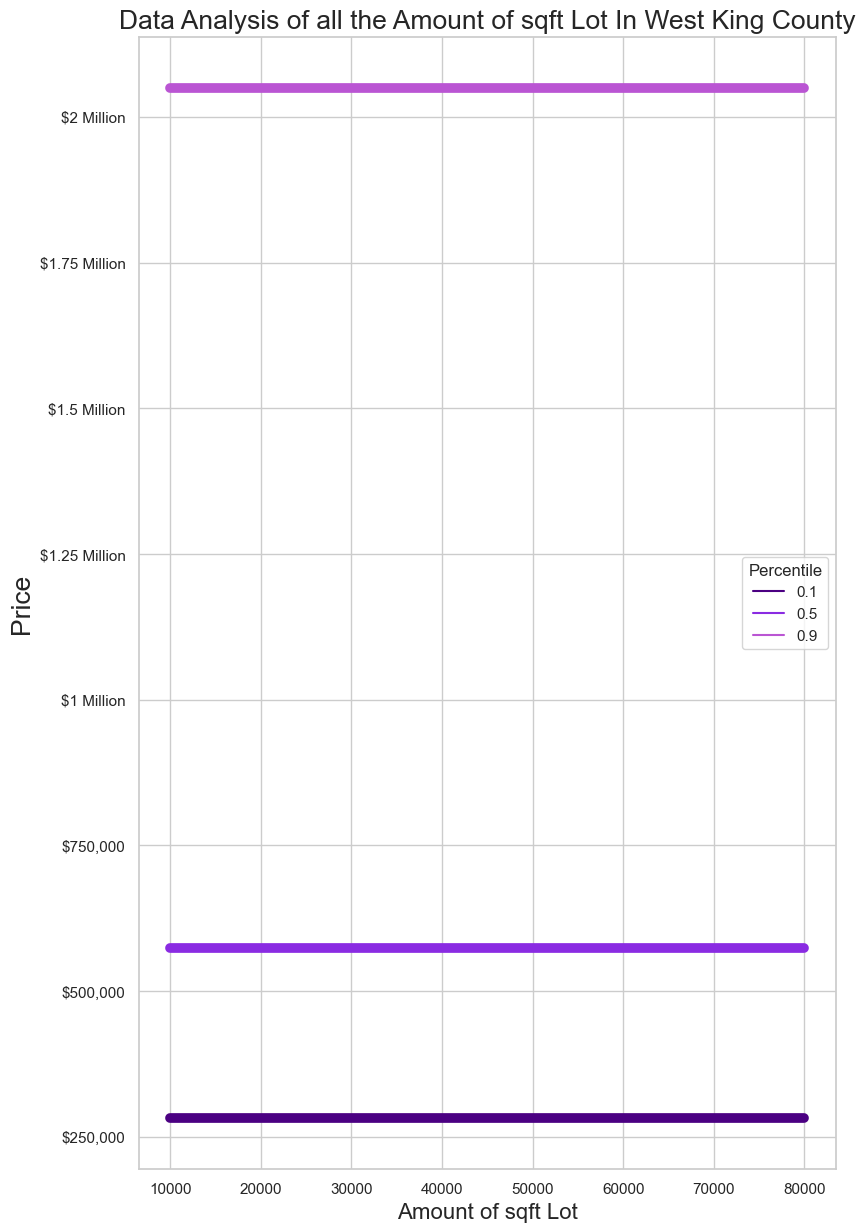

In [776]:
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data8, x="Amount_of_sqft_lot",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Data Analysis of all the Amount of sqft Lot In West King County',size=19)
plt.xlabel("Amount of sqft Lot", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000',
'$1 Million','$1.25 Million','$1.5 Million','$1.75 Million','$2 Million'])

In [779]:
(Quantile_regression7['Price'] > Quantile_regression7['0.1']).value_counts()

True     523
False     51
dtype: int64

In [782]:
i = 0
y= 0
x = []
while i < 523:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 51:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [780]:
(Quantile_regression7['Price'] > Quantile_regression7['0.5']).value_counts()

True     295
False    279
dtype: int64

In [783]:
i = 0
y= 0
x = []
while i < 295:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 279:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [781]:
(Quantile_regression7['Price'] > Quantile_regression7['0.9']).value_counts()

False    504
True      70
dtype: int64

In [784]:
i = 0
y= 0
x = []
while i < 504:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 70:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

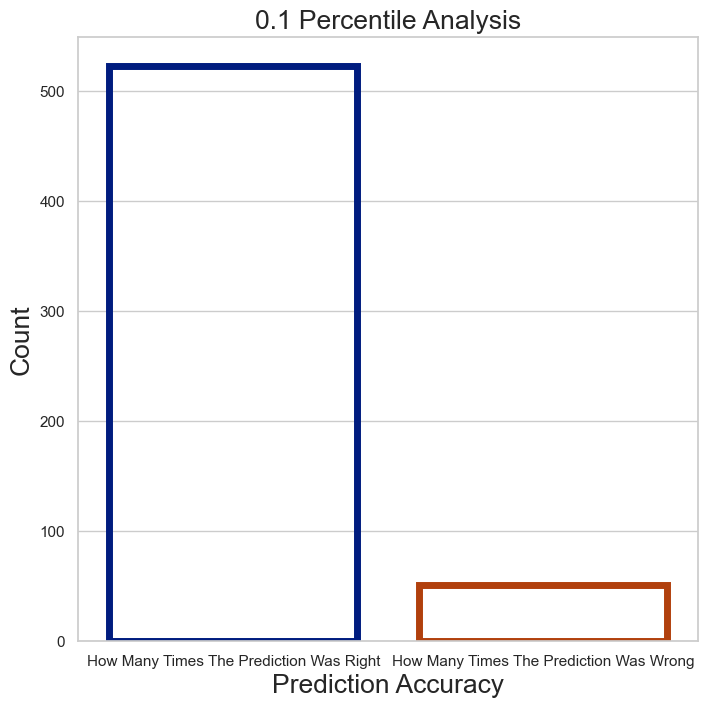

In [785]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

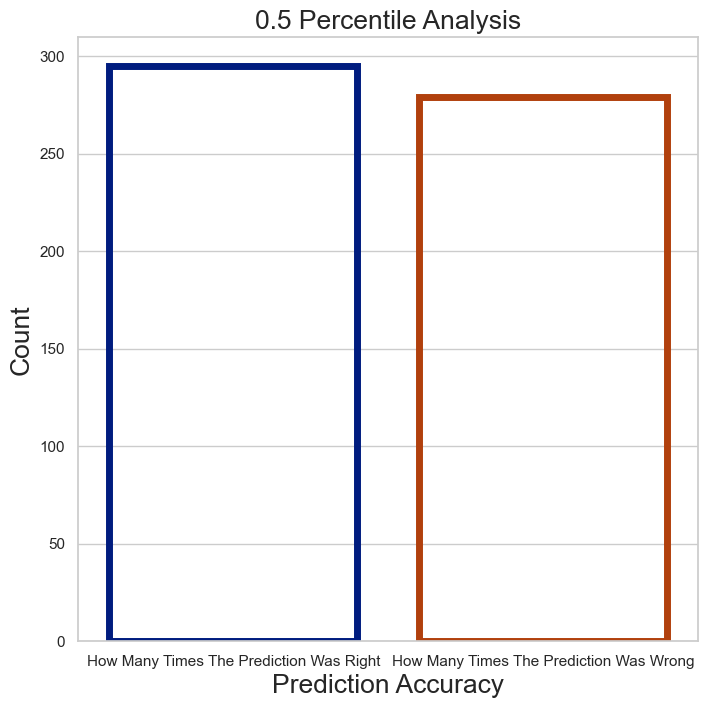

In [786]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

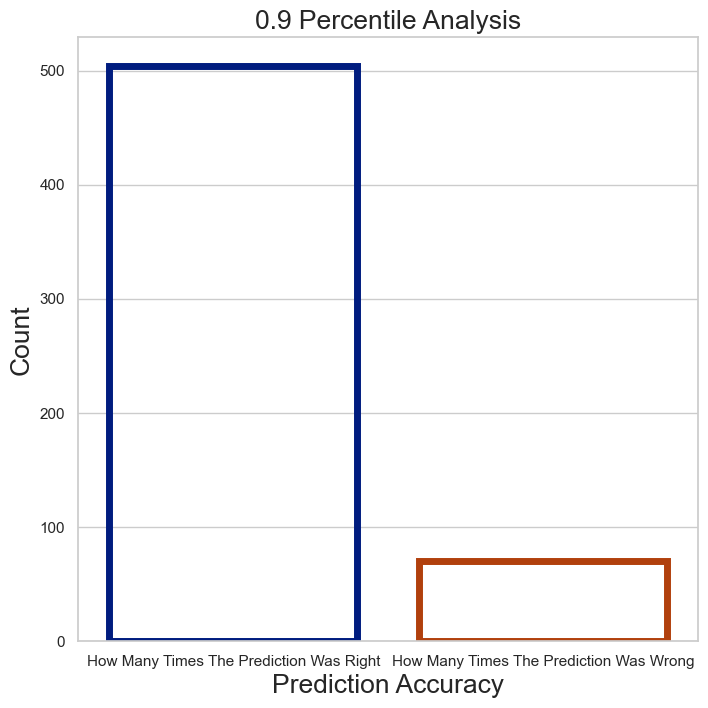

In [787]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [804]:
for x,i in enumerate(melted_data8.Amount_of_Lot):
    if 0 <= i <= 10000:
        print(i,melted_data8.Percentile[x],melted_data8.value[x])

980 0.1 354061.7503106069
8833 0.1 213386.2859676082
2676 0.1 256725.93063768878
6758 0.1 204412.27826921764
2740 0.1 301470.5452054082
4855 0.1 240449.05575271076
725 0.1 295599.95073959575
9904 0.1 269585.37695451634
7847 0.1 298838.7743882091
7831 0.1 303720.3584392447
5814 0.1 253700.72126621543
1796 0.1 259219.13084444538
3813 0.1 329710.7926857853
3573 0.1 283831.44870647765
5526 0.1 246683.00866831426
7591 0.1 200517.20900747416
5558 0.1 246683.00866831426
1588 0.1 277382.3024999712
3621 0.1 401324.8093139164
3861 0.1 329710.7926857853
3237 0.1 305049.7159652563
4069 0.1 365106.4643870706
3301 0.1 305049.7159652563
6166 0.1 235455.85418546316
7335 0.1 281802.971673401
8289 0.1 240848.03259091574
6182 0.1 235455.85418546316
7351 0.1 282574.2924400616
1892 0.1 259219.13084444538
8023 0.1 223788.94711066794
5382 0.1 267947.2642548312
5926 0.1 241536.86500886007
6038 0.1 220004.91789726823
7126 0.1 252637.7554828936
8038 0.1 223788.94711066794
2517 0.1 256725.93063768878
1829 0.1 25

2676 0.9 659217.6488161886
6758 0.9 751784.1928358909
2740 0.9 687060.5603949791
4855 0.9 717302.5045805075
725 0.9 734277.6094373009
9904 0.9 856229.1422617403
7847 0.9 891368.0124861539
7831 0.9 976375.0896646186
5814 0.9 939177.7723737122
1796 0.9 665325.936613013
3813 0.9 941438.124477975
3573 0.9 818856.1619003663
5526 0.9 865759.8753886493
7591 0.9 558789.9634599277
5558 0.9 865759.8753886493
1588 0.9 641280.0045871481
3621 0.9 941438.124477975
3861 0.9 845218.0072412513
3237 0.9 722237.8205075631
4069 0.9 999214.053797414
3301 0.9 722237.8205075631
6166 0.9 870540.7189627191
7335 0.9 626582.2524387077
8289 0.9 907039.29637828
6182 0.9 870540.7189627191
7351 0.9 599340.0002373137
1892 0.9 557427.6663486172
8023 0.9 927300.5179539802
5382 0.9 920715.5903628116
5926 0.9 939177.7723737122
6038 0.9 821903.0995922892
7126 0.9 1226065.1313203217
8038 0.9 927300.5179539802
2517 0.9 659217.6488161886
1829 0.9 665325.936613013
6087 0.9 1303533.8495869404
4036 0.9 999214.053797414
1324 0.9

In [805]:
Predictions8 = []
for i in regressiondata8.Amount_of_Lot:
    
    if 0 <= i <= 10000:Predictions8.append('Between: $213,386 - $765,120') 
    if 10001 <= i <= 20000:Predictions8.append('Between: $254,625 - $927,795') 
    if 20001 <= i <= 30000:Predictions8.append('Between: $275,043 - $1,213,204') 
    if 30001 <= i <= 40000:Predictions8.append('Between: $290,233- $1,251,089')
    if 40001 <= i <= 50000:Predictions8.append('Between: $295,414- $1,857,186')
    if 50001 <= i <= 60000:Predictions8.append('Between: $295,637- $908,646')
    if 60001 <= i <= 70000:Predictions8.append('Between: $283,079- $908,646')
    if 70001 <= i <= 80000:Predictions8.append('Between: $283,079- $908,646')
len(Predictions8)

5732

In [803]:
price = []
for i in regressiondata8.Price:
    price.append("${:,.0f}".format(i))
len(price)

5732

In [807]:
Prediction8 = pd.DataFrame({'Amount_of_sqft_lot': regressiondata8.Amount_of_Lot,
                           'Prediction':Predictions8,'Actual Price':price})
Prediction8

Amount_of_sqft_lot                      Prediction Actual Price
0                   5000    Between: $213,386 - $765,120     $650,000
1                   5000    Between: $213,386 - $765,120     $275,000
2                   5000    Between: $213,386 - $765,120     $682,000
3                   5000    Between: $213,386 - $765,120     $550,000
4                   5000    Between: $213,386 - $765,120     $356,700
...                  ...                             ...          ...
5811               15695    Between: $254,625 - $927,795     $452,500
5812               11597    Between: $254,625 - $927,795     $750,000
5813                9532    Between: $213,386 - $765,120     $711,000
5814                1833    Between: $213,386 - $765,120     $798,500
5815               26862  Between: $275,043 - $1,213,204     $287,000

[5732 rows x 3 columns]